In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import json
from datetime import datetime
pd.set_option("display.max_columns", 200)
plt.style.use(['ggplot', 'seaborn-darkgrid'])
AQ = pd.read_csv("AQ.csv")
with open("weather.json", 'r') as file:
    weather_data = json.load(file)["daily"]
weather = pd.DataFrame(weather_data)
weather.rename(columns = {"time": "DATE"}, inplace=True)

C:\Users\Owner\AppData\Local\Temp\ipykernel_23200\1607604829.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['ggplot', 'seaborn-darkgrid'])


In [445]:
env = pd.merge(weather, AQ)
env

DATE  temperature_2m_max  temperature_2m_min  temperature_2m_mean  \
0     2014-01-06                -3.3               -17.6                -10.5   
1     2014-01-07                 1.1               -11.6                 -4.7   
2     2014-01-08                 0.9                -2.6                 -0.5   
3     2014-01-09                 0.1               -10.3                 -4.4   
4     2014-01-10                 3.1                -4.1                 -0.5   
...          ...                 ...                 ...                  ...   
3506  2023-08-13                30.2                15.7                 23.5   
3507  2023-08-14                32.3                15.1                 24.4   
3508  2023-08-15                32.5                18.7                 25.2   
3509  2023-08-16                30.7                18.8                 25.1   
3510  2023-08-17                31.1                18.7                 24.3   

      rain_sum  snowfall_sum  wind_speed_10m_max     CO   NO2     O3  PM10  \
0          0.0          0.00                 6.8    1.8  47.0  0.022  47.0   
1          0.0          0.21                 5.9    1.9  47.0  0.007  66.0   
2          0.0          2.66                 7.9    0.8  48.0  0.003  53.0   
3          0.0          3.92                 8.9    0.7  42.0  0.021  46.0   
4          0.0          0.91                 7.0    1.0  46.0  0.021  38.0   
...        ...           ...                 ...    ...   ...    ...   ...   
3506       0.0          0.00                13.0   86.0   8.0  113.0  19.0   
3507       0.1          0.00                12.4   85.0   6.0  112.0  19.0   
3508       0.1          0.00                10.2  104.0  10.0  101.0  36.0   
3509       1.3          0.00                 8.0   91.0   8.0  106.0  22.0   
3510       0.6          0.00                12.3  102.0   9.0  110.0  36.0   

      PM25  
0     13.7  
1     21.0  
2     33.9  
3     18.0  
4      7.9  
...    ...  
3506  12.0  
3507  13.0  
3508  18.0  
3509  12.0  
3510  25.0  

[3511 rows x 12 columns]

In [402]:
citations = pd.read_csv("citations.csv")

C:\Users\Owner\AppData\Local\Temp\ipykernel_19088\2999682301.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  citations = pd.read_csv("citations.csv")


In [403]:
citations.dtypes

Citation                object
License.Plate.Vin       object
Fine                     int64
Issued                  object
CitationText            object
Unpaid                    bool
Officer                  int64
Residence               object
IssuedDate              object
IssuedTime              object
temperature_2m_max     float64
temperature_2m_min     float64
temperature_2m_mean    float64
rain_sum               float64
snowfall_sum           float64
wind_speed_10m_max     float64
CO                     float64
NO2                    float64
O3                      object
PM10                   float64
PM25                    object
dtype: object

In [446]:
def parse_num(s):
    if len(str(s)) < 1:
        return None
    else:
        parsed = ''.join(re.findall(r'\d+\.\d+|\d+',str(s)))
        if len(parsed) > 0:
            return float(parsed)
        else:
            return None

citations["O3"] = citations["O3"].apply(lambda o: parse_num(o))
citations["PM25"] = citations["PM25"].apply(lambda p: parse_num(p))

env["O3"] = env["O3"].apply(lambda o: parse_num(o))
env["PM25"] = env["PM25"].apply(lambda p: parse_num(p))

In [405]:
citations["Residence"] = citations["Residence"].astype(str)
citations["IssusedDate"] = pd.to_datetime(citations["IssuedDate"])
citations["IssuedTime"] = pd.to_datetime(citations["IssuedTime"]).dt.time

In [447]:
env["DATE"] = pd.to_datetime(env["DATE"])
env = env[env["DATE"].dt.year < 2023].copy()
env

DATE  temperature_2m_max  temperature_2m_min  temperature_2m_mean  \
0    2014-01-06                -3.3               -17.6                -10.5   
1    2014-01-07                 1.1               -11.6                 -4.7   
2    2014-01-08                 0.9                -2.6                 -0.5   
3    2014-01-09                 0.1               -10.3                 -4.4   
4    2014-01-10                 3.1                -4.1                 -0.5   
...         ...                 ...                 ...                  ...   
3277 2022-12-27                 7.2                 3.4                  4.9   
3278 2022-12-28                 4.6                -4.0                  0.6   
3279 2022-12-29                 1.5                -5.9                 -2.5   
3280 2022-12-30                 3.0                -3.7                  0.6   
3281 2022-12-31                 5.8                 2.9                  3.9   

      rain_sum  snowfall_sum  wind_speed_10m_max     CO   NO2     O3  PM10  \
0          0.0          0.00                 6.8    1.8  47.0  0.022  47.0   
1          0.0          0.21                 5.9    1.9  47.0  0.007  66.0   
2          0.0          2.66                 7.9    0.8  48.0  0.003  53.0   
3          0.0          3.92                 8.9    0.7  42.0  0.021  46.0   
4          0.0          0.91                 7.0    1.0  46.0  0.021  38.0   
...        ...           ...                 ...    ...   ...    ...   ...   
3277       6.6          4.27                13.2    0.6  29.8  0.033   3.0   
3278       0.0          3.50                 9.3  300.0  26.1  0.029   3.0   
3279       0.0          0.49                 5.8    0.3  26.9  0.032   6.0   
3280       0.0          7.56                 6.1    0.4  14.2  0.038   2.0   
3281      10.0         10.99                 5.9  400.0  17.0    NaN   3.0   

      PM25  
0     13.7  
1     21.0  
2     33.9  
3     18.0  
4      7.9  
...    ...  
3277   2.1  
3278   1.1  
3279   1.9  
3280   1.3  
3281   2.1  

[3282 rows x 12 columns]

In [407]:
citations_cleaned = citations[["Fine", "Residence", "IssuedDate", "IssuedTime", "temperature_2m_max", "temperature_2m_min", "temperature_2m_mean",
           "rain_sum", "snowfall_sum", "wind_speed_10m_max", "CO", "NO2", "O3", "PM10", "PM25"]].copy()

In [408]:
citations_cleaned

Fine Residence  IssuedDate IssuedTime  temperature_2m_max  \
0         0        CA  2014-01-06   08:50:00                -3.3   
1        30        UT  2014-01-06   13:00:00                -3.3   
2         8        VA  2014-01-06   12:59:00                -3.3   
3        30        NM  2014-01-06   12:56:00                -3.3   
4        30        MT  2014-01-06   12:55:00                -3.3   
...     ...       ...         ...        ...                 ...   
89309     0        WA  2022-12-29   12:39:00                 1.5   
89310    40        UT  2022-12-29   12:24:00                 1.5   
89311    40        WA  2022-12-29   12:07:00                 1.5   
89312    40        UT  2022-12-29   08:05:00                 1.5   
89313    40        UT  2022-12-29   12:24:00                 1.5   

       temperature_2m_min  temperature_2m_mean  rain_sum  snowfall_sum  \
0                   -17.6                -10.5       0.0          0.00   
1                   -17.6                -10.5       0.0          0.00   
2                   -17.6                -10.5       0.0          0.00   
3                   -17.6                -10.5       0.0          0.00   
4                   -17.6                -10.5       0.0          0.00   
...                   ...                  ...       ...           ...   
89309                -5.9                 -2.5       0.0          0.49   
89310                -5.9                 -2.5       0.0          0.49   
89311                -5.9                 -2.5       0.0          0.49   
89312                -5.9                 -2.5       0.0          0.49   
89313                -5.9                 -2.5       0.0          0.49   

       wind_speed_10m_max   CO   NO2     O3  PM10  PM25  
0                     6.8  1.8  47.0  0.022  51.0  13.7  
1                     6.8  1.8  47.0  0.022  51.0  13.7  
2                     6.8  1.8  47.0  0.022  51.0  13.7  
3                     6.8  1.8  47.0  0.022  51.0  13.7  
4                     6.8  1.8  47.0  0.022  51.0  13.7  
...                   ...  ...   ...    ...   ...   ...  
89309                 5.8  0.3  26.9  0.032   6.0   1.9  
89310                 5.8  0.3  26.9  0.032   6.0   1.9  
89311                 5.8  0.3  26.9  0.032   6.0   1.9  
89312                 5.8  0.3  26.9  0.032   6.0   1.9  
89313                 5.8  0.3  26.9  0.032   6.0   1.9  

[89314 rows x 15 columns]

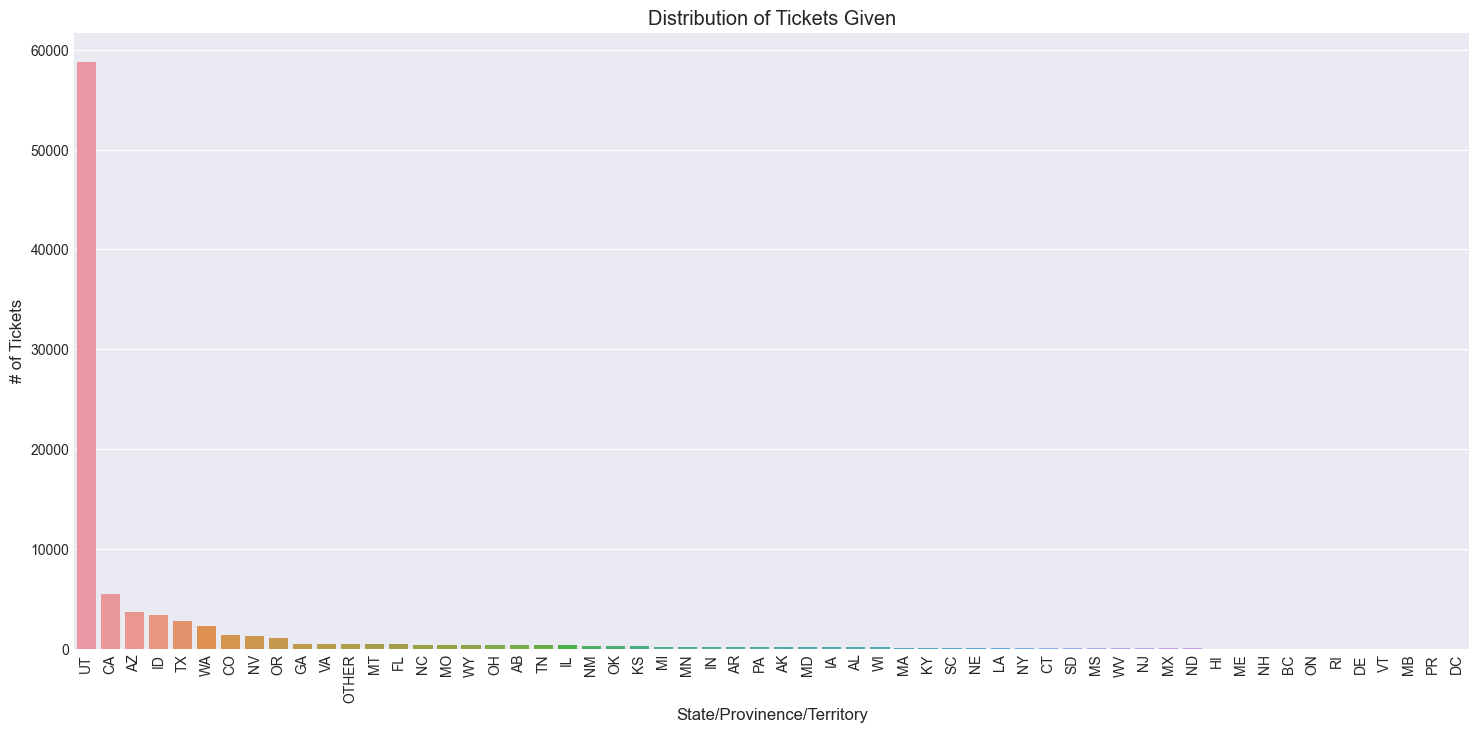

In [409]:
state_acronyms = [
    "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA",
    "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD",
    "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ",
    "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC",
    "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY",
    "DC", "PR", "MX",
    # Provinces of Canada
    "AB", "BC", "MB", "NB", "NL", "NS", "NT", "NU", "ON", "PE", "QC", "SK", "YT"
]

citations_cleaned["Residence"] = citations_cleaned["Residence"].apply(lambda state: state if state in state_acronyms else "OTHER")

sns.color_palette(palette='PuRd')

plt.figure(figsize=(18, 8))

sns.countplot(x="Residence", data=citations_cleaned, order=citations_cleaned['Residence'].value_counts().index)

plt.xlabel('State/Provinence/Territory')
plt.ylabel('# of Tickets')
plt.title('Distribution of Tickets Given')

plt.xticks(rotation=90)

plt.show()

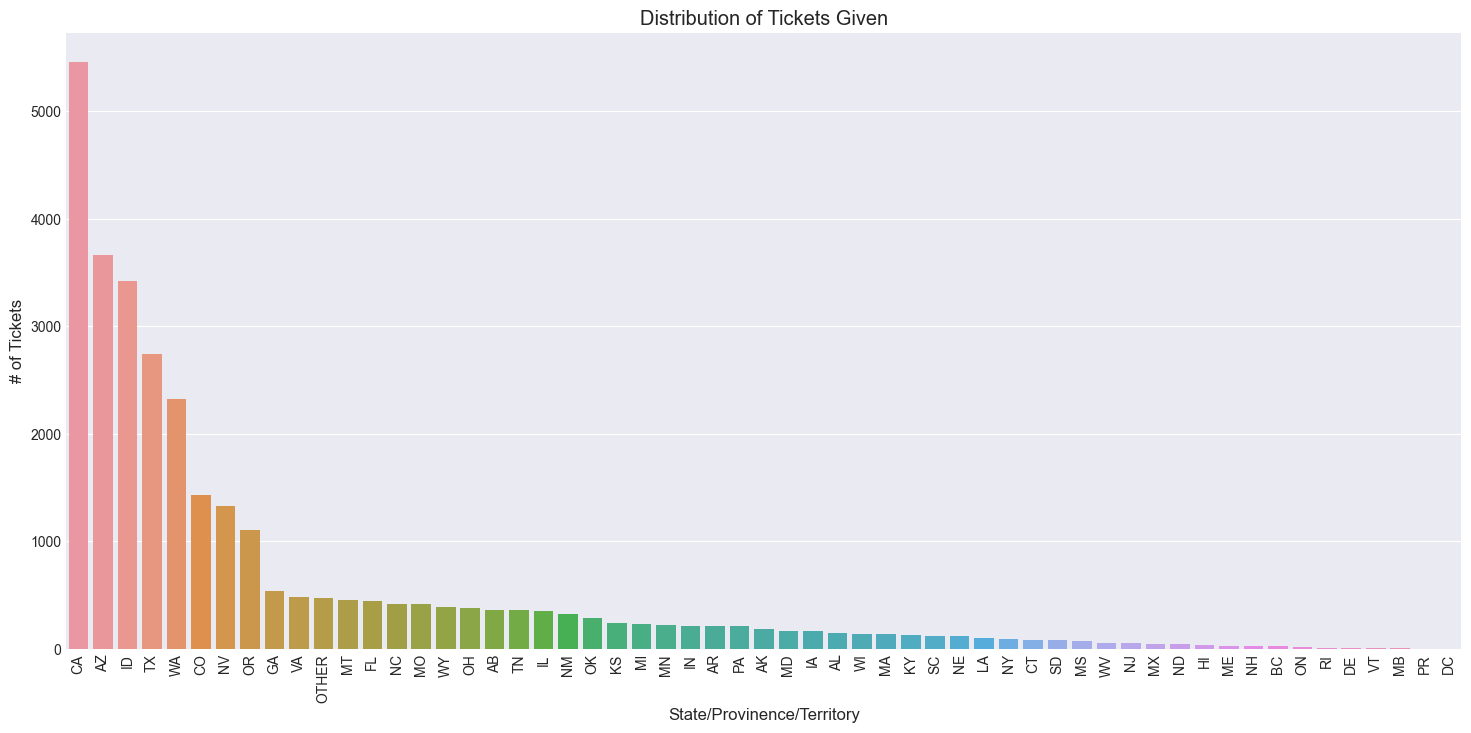

In [410]:
#Without UT included
without_ut = citations_cleaned[citations_cleaned["Residence"] != "UT"].copy()

plt.figure(figsize=(18, 8))

sns.countplot(x="Residence", data=without_ut, order=without_ut["Residence"].value_counts().index)

plt.xlabel('State/Provinence/Territory')
plt.ylabel('# of Tickets')
plt.title('Distribution of Tickets Given')

plt.xticks(rotation=90)

plt.show()

In [411]:
citations_cleaned.describe()

Fine  temperature_2m_max  temperature_2m_min  \
count  89314.000000        89314.000000        89314.000000   
mean      31.504311           14.249084            3.065326   
std       30.833199           11.038358            9.232886   
min        0.000000           -9.100000          -20.800000   
25%        0.000000            4.700000           -4.000000   
50%       25.000000           12.600000            2.300000   
75%       60.000000           22.900000           10.000000   
max      300.000000           38.000000           24.400000   

       temperature_2m_mean      rain_sum  snowfall_sum  wind_speed_10m_max  \
count         89314.000000  89314.000000  89314.000000        89314.000000   
mean              8.736695      0.620767      0.385865           10.664008   
std              10.155197      2.020095      1.270693            4.311086   
min             -15.400000      0.000000      0.000000            3.500000   
25%               0.400000      0.000000      0.000000            7.400000   
50%               7.200000      0.000000      0.000000            9.900000   
75%              16.500000      0.100000      0.000000           12.900000   
max              31.100000     35.700000     17.150000           38.200000   

                 CO           NO2           O3          PM10          PM25  
count  87736.000000  84569.000000  87936.00000  64916.000000  83526.000000  
mean       3.105438     26.488354      6.06119     21.147976      7.002432  
std       39.301936     13.372791     17.78929     13.328885      5.849266  
min        0.000000      3.400000      0.00100      2.000000      0.000000  
25%        0.300000     16.100000      0.03100     12.000000      3.700000  
50%        0.400000     25.500000      0.03900     18.000000      5.400000  
75%        0.500000     34.000000      0.04900     27.000000      8.200000  
max      900.000000    128.000000     87.00000    121.000000     67.200000

In [448]:
#Correct for parsing errors
citations_cleaned["CO"] = citations_cleaned["CO"].apply(lambda co: co/1000 if co > 10 else co)
citations_cleaned["O3"] = citations_cleaned["O3"].apply(lambda o: o/1000 if o > 10 else o)

env["CO"] = env["CO"].apply(lambda co: co/1000 if co > 10 else co)
env["O3"] = env["O3"].apply(lambda o: o/1000 if o > 10 else o)

In [449]:
citations_cleaned.isna().sum()

Fine                   0
Residence              0
IssuedDate             0
IssuedTime             0
temperature_2m_max     0
temperature_2m_min     0
temperature_2m_mean    0
rain_sum               0
snowfall_sum           0
wind_speed_10m_max     0
CO                     0
NO2                    0
O3                     0
PM10                   0
PM25                   0
Month                  0
NA_Correction          0
Day                    0
Year                   0
Week                   0
WeeklyNumFines         0
dtype: int64

In [450]:
env.isna().sum()

DATE                     0
temperature_2m_max       0
temperature_2m_min       0
temperature_2m_mean      0
rain_sum                 0
snowfall_sum             0
wind_speed_10m_max       0
CO                     140
NO2                    211
O3                     137
PM10                   330
PM25                   268
dtype: int64

In [451]:
citations_cleaned["IssuedDate"] = pd.to_datetime(citations_cleaned["IssuedDate"])
citations_cleaned["Month"] = citations_cleaned["IssuedDate"].dt.month
metrics_averages = citations_cleaned.groupby("Month")[["CO", "NO2", "O3", "PM10", "PM25"]].mean().reset_index()
metrics_averages

Month        CO        NO2        O3       PM10       PM25
0       1  0.710097  38.292735  0.026100  24.720786  12.597938
1       2  0.497183  34.108907  0.034237  20.476565   7.674610
2       3  0.427012  27.340666  0.041737  15.191141   4.177100
3       4  0.324960  23.493712  0.049281  26.832451   5.216651
4       5  0.223880  16.649192  0.050313  20.815428   5.532353
5       6  0.226839  13.160973  0.058136  26.895856   7.410221
6       7  0.186496  13.880420  0.057757  29.001796   7.718475
7       8  0.272477  15.405722  0.057251  28.296413   9.360490
8       9  0.290388  18.780865  0.046810  27.179813   6.909976
9      10  0.404382  25.139465  0.036354  21.804586   5.386361
10     11  0.455357  30.344310  0.028463  20.317311   6.367479
11     12  0.831571  35.211489  0.024151  20.513043   7.546722

In [452]:
env["DATE"] = pd.to_datetime(env["DATE"])
env["Month"] = env["DATE"].dt.month
metrics_averages = env.groupby("Month")[["CO", "NO2", "O3", "PM10", "PM25"]].mean().reset_index()
metrics_averages

Month        CO        NO2        O3       PM10       PM25
0       1  0.672016  36.999111  0.025881  28.214876  12.452290
1       2  0.486283  32.079842  0.035235  21.877273   7.145902
2       3  0.394024  26.755957  0.043076  18.140562   3.998889
3       4  0.258148  20.430544  0.048576  30.172000   4.363118
4       5  0.237993  15.716466  0.052080  24.968504   5.093254
5       6  0.226493  13.047200  0.056220  29.327935   7.116667
6       7  0.219630  13.567083  0.058183  34.126016   8.731513
7       8  0.270504  16.546691  0.057326  34.426230  10.247843
8       9  0.275188  19.578764  0.047917  29.176000   7.754365
9      10  0.411913  24.401083  0.036733  25.241935   5.364599
10     11  0.525610  30.153150  0.028890  21.956897   6.554217
11     12  0.698134  33.542029  0.024580  24.985185   9.565611

In [423]:
metrics = ["CO", "NO2", "O3", "PM10", "PM25"]

citations_cleaned["NA_Correction"] = False

def match_average(row):
    for metric in metrics:
        if pd.isna(row[metric]):
            row[metric] = metrics_averages.loc[metrics_averages["Month"] == row["Month"], metric].values[0]
            row["NA_Correction"] = True
    return row

#Fill NA with corresponding monthly averages
citations_cleaned = citations_cleaned.apply(match_average, axis=1).copy()
citations_cleaned

Fine Residence IssuedDate IssuedTime  temperature_2m_max  \
0         0        CA 2014-01-06   08:50:00                -3.3   
1        30        UT 2014-01-06   13:00:00                -3.3   
2         8        VA 2014-01-06   12:59:00                -3.3   
3        30        NM 2014-01-06   12:56:00                -3.3   
4        30        MT 2014-01-06   12:55:00                -3.3   
...     ...       ...        ...        ...                 ...   
89309     0        WA 2022-12-29   12:39:00                 1.5   
89310    40        UT 2022-12-29   12:24:00                 1.5   
89311    40        WA 2022-12-29   12:07:00                 1.5   
89312    40        UT 2022-12-29   08:05:00                 1.5   
89313    40        UT 2022-12-29   12:24:00                 1.5   

       temperature_2m_min  temperature_2m_mean  rain_sum  snowfall_sum  \
0                   -17.6                -10.5       0.0          0.00   
1                   -17.6                -10.5       0.0          0.00   
2                   -17.6                -10.5       0.0          0.00   
3                   -17.6                -10.5       0.0          0.00   
4                   -17.6                -10.5       0.0          0.00   
...                   ...                  ...       ...           ...   
89309                -5.9                 -2.5       0.0          0.49   
89310                -5.9                 -2.5       0.0          0.49   
89311                -5.9                 -2.5       0.0          0.49   
89312                -5.9                 -2.5       0.0          0.49   
89313                -5.9                 -2.5       0.0          0.49   

       wind_speed_10m_max   CO   NO2     O3  PM10  PM25  Month  NA_Correction  
0                     6.8  1.8  47.0  0.022  51.0  13.7      1          False  
1                     6.8  1.8  47.0  0.022  51.0  13.7      1          False  
2                     6.8  1.8  47.0  0.022  51.0  13.7      1          False  
3                     6.8  1.8  47.0  0.022  51.0  13.7      1          False  
4                     6.8  1.8  47.0  0.022  51.0  13.7      1          False  
...                   ...  ...   ...    ...   ...   ...    ...            ...  
89309                 5.8  0.3  26.9  0.032   6.0   1.9     12          False  
89310                 5.8  0.3  26.9  0.032   6.0   1.9     12          False  
89311                 5.8  0.3  26.9  0.032   6.0   1.9     12          False  
89312                 5.8  0.3  26.9  0.032   6.0   1.9     12          False  
89313                 5.8  0.3  26.9  0.032   6.0   1.9     12          False  

[89314 rows x 17 columns]

In [453]:
metrics = ["CO", "NO2", "O3", "PM10", "PM25"]

env["NA_Correction"] = False

#Fill NA with corresponding monthly averages
env = env.apply(match_average, axis=1).copy()
env

DATE  temperature_2m_max  temperature_2m_min  temperature_2m_mean  \
0    2014-01-06                -3.3               -17.6                -10.5   
1    2014-01-07                 1.1               -11.6                 -4.7   
2    2014-01-08                 0.9                -2.6                 -0.5   
3    2014-01-09                 0.1               -10.3                 -4.4   
4    2014-01-10                 3.1                -4.1                 -0.5   
...         ...                 ...                 ...                  ...   
3277 2022-12-27                 7.2                 3.4                  4.9   
3278 2022-12-28                 4.6                -4.0                  0.6   
3279 2022-12-29                 1.5                -5.9                 -2.5   
3280 2022-12-30                 3.0                -3.7                  0.6   
3281 2022-12-31                 5.8                 2.9                  3.9   

      rain_sum  snowfall_sum  wind_speed_10m_max   CO   NO2       O3  PM10  \
0          0.0          0.00                 6.8  1.8  47.0  0.02200  47.0   
1          0.0          0.21                 5.9  1.9  47.0  0.00700  66.0   
2          0.0          2.66                 7.9  0.8  48.0  0.00300  53.0   
3          0.0          3.92                 8.9  0.7  42.0  0.02100  46.0   
4          0.0          0.91                 7.0  1.0  46.0  0.02100  38.0   
...        ...           ...                 ...  ...   ...      ...   ...   
3277       6.6          4.27                13.2  0.6  29.8  0.03300   3.0   
3278       0.0          3.50                 9.3  0.3  26.1  0.02900   3.0   
3279       0.0          0.49                 5.8  0.3  26.9  0.03200   6.0   
3280       0.0          7.56                 6.1  0.4  14.2  0.03800   2.0   
3281      10.0         10.99                 5.9  0.4  17.0  0.02458   3.0   

      PM25  Month  NA_Correction  
0     13.7      1          False  
1     21.0      1          False  
2     33.9      1          False  
3     18.0      1          False  
4      7.9      1          False  
...    ...    ...            ...  
3277   2.1     12          False  
3278   1.1     12          False  
3279   1.9     12          False  
3280   1.3     12          False  
3281   2.1     12           True  

[3282 rows x 14 columns]

In [454]:
citations_cleaned.isna().sum()

Fine                   0
Residence              0
IssuedDate             0
IssuedTime             0
temperature_2m_max     0
temperature_2m_min     0
temperature_2m_mean    0
rain_sum               0
snowfall_sum           0
wind_speed_10m_max     0
CO                     0
NO2                    0
O3                     0
PM10                   0
PM25                   0
Month                  0
NA_Correction          0
Day                    0
Year                   0
Week                   0
WeeklyNumFines         0
dtype: int64

In [455]:
env.isna().sum()

DATE                   0
temperature_2m_max     0
temperature_2m_min     0
temperature_2m_mean    0
rain_sum               0
snowfall_sum           0
wind_speed_10m_max     0
CO                     0
NO2                    0
O3                     0
PM10                   0
PM25                   0
Month                  0
NA_Correction          0
dtype: int64

In [430]:
citations_cleaned["Day"] = citations_cleaned["IssuedDate"].dt.day_name()
citations_cleaned["Year"] = citations_cleaned["IssuedDate"].dt.year

citations_cleaned.groupby(["Year", "Month"])["Fine"].count().reset_index()

Year  Month  Fine
0   2014      1  1046
1   2014      2   913
2   2014      3   808
3   2014      4   625
4   2014      5   747
..   ...    ...   ...
78  2022      8  1300
79  2022      9  2132
80  2022     10  1914
81  2022     11  2094
82  2022     12  1178

[83 rows x 3 columns]

In [456]:
env["Day"] = env["DATE"].dt.day_name()
env["Year"] = env["DATE"].dt.year

In [431]:
citations_cleaned

Fine Residence IssuedDate IssuedTime  temperature_2m_max  \
0         0        CA 2014-01-06   08:50:00                -3.3   
1        30        UT 2014-01-06   13:00:00                -3.3   
2         8        VA 2014-01-06   12:59:00                -3.3   
3        30        NM 2014-01-06   12:56:00                -3.3   
4        30        MT 2014-01-06   12:55:00                -3.3   
...     ...       ...        ...        ...                 ...   
89309     0        WA 2022-12-29   12:39:00                 1.5   
89310    40        UT 2022-12-29   12:24:00                 1.5   
89311    40        WA 2022-12-29   12:07:00                 1.5   
89312    40        UT 2022-12-29   08:05:00                 1.5   
89313    40        UT 2022-12-29   12:24:00                 1.5   

       temperature_2m_min  temperature_2m_mean  rain_sum  snowfall_sum  \
0                   -17.6                -10.5       0.0          0.00   
1                   -17.6                -10.5       0.0          0.00   
2                   -17.6                -10.5       0.0          0.00   
3                   -17.6                -10.5       0.0          0.00   
4                   -17.6                -10.5       0.0          0.00   
...                   ...                  ...       ...           ...   
89309                -5.9                 -2.5       0.0          0.49   
89310                -5.9                 -2.5       0.0          0.49   
89311                -5.9                 -2.5       0.0          0.49   
89312                -5.9                 -2.5       0.0          0.49   
89313                -5.9                 -2.5       0.0          0.49   

       wind_speed_10m_max   CO   NO2     O3  PM10  PM25  Month  NA_Correction  \
0                     6.8  1.8  47.0  0.022  51.0  13.7      1          False   
1                     6.8  1.8  47.0  0.022  51.0  13.7      1          False   
2                     6.8  1.8  47.0  0.022  51.0  13.7      1          False   
3                     6.8  1.8  47.0  0.022  51.0  13.7      1          False   
4                     6.8  1.8  47.0  0.022  51.0  13.7      1          False   
...                   ...  ...   ...    ...   ...   ...    ...            ...   
89309                 5.8  0.3  26.9  0.032   6.0   1.9     12          False   
89310                 5.8  0.3  26.9  0.032   6.0   1.9     12          False   
89311                 5.8  0.3  26.9  0.032   6.0   1.9     12          False   
89312                 5.8  0.3  26.9  0.032   6.0   1.9     12          False   
89313                 5.8  0.3  26.9  0.032   6.0   1.9     12          False   

            Day  Year  
0        Monday  2014  
1        Monday  2014  
2        Monday  2014  
3        Monday  2014  
4        Monday  2014  
...         ...   ...  
89309  Thursday  2022  
89310  Thursday  2022  
89311  Thursday  2022  
89312  Thursday  2022  
89313  Thursday  2022  

[89314 rows x 19 columns]

In [432]:
citations_n = citations_cleaned.groupby("IssuedDate").count().reset_index()
citations_n["Day"] = list(range(1, citations_n.shape[0]+1))
citations_n["Week"] = citations_n["Day"].apply(lambda d: int(np.floor(d/7)+1))
citations_n = citations_n[["IssuedDate", "Week"]].copy()
citations_n

IssuedDate  Week
0    2014-01-06     1
1    2014-01-07     1
2    2014-01-08     1
3    2014-01-09     1
4    2014-01-10     1
...         ...   ...
1777 2022-12-19   255
1778 2022-12-20   255
1779 2022-12-21   255
1780 2022-12-28   255
1781 2022-12-29   255

[1782 rows x 2 columns]

In [433]:
citations_cleaned = pd.merge(citations_cleaned, citations_n, how="left")
citations_cleaned

Fine Residence IssuedDate IssuedTime  temperature_2m_max  \
0         0        CA 2014-01-06   08:50:00                -3.3   
1        30        UT 2014-01-06   13:00:00                -3.3   
2         8        VA 2014-01-06   12:59:00                -3.3   
3        30        NM 2014-01-06   12:56:00                -3.3   
4        30        MT 2014-01-06   12:55:00                -3.3   
...     ...       ...        ...        ...                 ...   
89309     0        WA 2022-12-29   12:39:00                 1.5   
89310    40        UT 2022-12-29   12:24:00                 1.5   
89311    40        WA 2022-12-29   12:07:00                 1.5   
89312    40        UT 2022-12-29   08:05:00                 1.5   
89313    40        UT 2022-12-29   12:24:00                 1.5   

       temperature_2m_min  temperature_2m_mean  rain_sum  snowfall_sum  \
0                   -17.6                -10.5       0.0          0.00   
1                   -17.6                -10.5       0.0          0.00   
2                   -17.6                -10.5       0.0          0.00   
3                   -17.6                -10.5       0.0          0.00   
4                   -17.6                -10.5       0.0          0.00   
...                   ...                  ...       ...           ...   
89309                -5.9                 -2.5       0.0          0.49   
89310                -5.9                 -2.5       0.0          0.49   
89311                -5.9                 -2.5       0.0          0.49   
89312                -5.9                 -2.5       0.0          0.49   
89313                -5.9                 -2.5       0.0          0.49   

       wind_speed_10m_max   CO   NO2     O3  PM10  PM25  Month  NA_Correction  \
0                     6.8  1.8  47.0  0.022  51.0  13.7      1          False   
1                     6.8  1.8  47.0  0.022  51.0  13.7      1          False   
2                     6.8  1.8  47.0  0.022  51.0  13.7      1          False   
3                     6.8  1.8  47.0  0.022  51.0  13.7      1          False   
4                     6.8  1.8  47.0  0.022  51.0  13.7      1          False   
...                   ...  ...   ...    ...   ...   ...    ...            ...   
89309                 5.8  0.3  26.9  0.032   6.0   1.9     12          False   
89310                 5.8  0.3  26.9  0.032   6.0   1.9     12          False   
89311                 5.8  0.3  26.9  0.032   6.0   1.9     12          False   
89312                 5.8  0.3  26.9  0.032   6.0   1.9     12          False   
89313                 5.8  0.3  26.9  0.032   6.0   1.9     12          False   

            Day  Year  Week  
0        Monday  2014     1  
1        Monday  2014     1  
2        Monday  2014     1  
3        Monday  2014     1  
4        Monday  2014     1  
...         ...   ...   ...  
89309  Thursday  2022   255  
89310  Thursday  2022   255  
89311  Thursday  2022   255  
89312  Thursday  2022   255  
89313  Thursday  2022   255  

[89314 rows x 20 columns]

In [434]:
weekly_fines = citations_cleaned.groupby("Week")["Fine"].count().reset_index()
weekly_fines.columns = ["Week", "WeeklyNumFines"]
weekly_fines

Week  WeeklyNumFines
0       1             109
1       2             307
2       3             329
3       4             469
4       5             244
..    ...             ...
250   251             571
251   252             483
252   253             861
253   254             297
254   255              20

[255 rows x 2 columns]

In [435]:
citations_cleaned = pd.merge(citations_cleaned, weekly_fines, how="left")

In [436]:
citations_cleaned

Fine Residence IssuedDate IssuedTime  temperature_2m_max  \
0         0        CA 2014-01-06   08:50:00                -3.3   
1        30        UT 2014-01-06   13:00:00                -3.3   
2         8        VA 2014-01-06   12:59:00                -3.3   
3        30        NM 2014-01-06   12:56:00                -3.3   
4        30        MT 2014-01-06   12:55:00                -3.3   
...     ...       ...        ...        ...                 ...   
89309     0        WA 2022-12-29   12:39:00                 1.5   
89310    40        UT 2022-12-29   12:24:00                 1.5   
89311    40        WA 2022-12-29   12:07:00                 1.5   
89312    40        UT 2022-12-29   08:05:00                 1.5   
89313    40        UT 2022-12-29   12:24:00                 1.5   

       temperature_2m_min  temperature_2m_mean  rain_sum  snowfall_sum  \
0                   -17.6                -10.5       0.0          0.00   
1                   -17.6                -10.5       0.0          0.00   
2                   -17.6                -10.5       0.0          0.00   
3                   -17.6                -10.5       0.0          0.00   
4                   -17.6                -10.5       0.0          0.00   
...                   ...                  ...       ...           ...   
89309                -5.9                 -2.5       0.0          0.49   
89310                -5.9                 -2.5       0.0          0.49   
89311                -5.9                 -2.5       0.0          0.49   
89312                -5.9                 -2.5       0.0          0.49   
89313                -5.9                 -2.5       0.0          0.49   

       wind_speed_10m_max   CO   NO2     O3  PM10  PM25  Month  NA_Correction  \
0                     6.8  1.8  47.0  0.022  51.0  13.7      1          False   
1                     6.8  1.8  47.0  0.022  51.0  13.7      1          False   
2                     6.8  1.8  47.0  0.022  51.0  13.7      1          False   
3                     6.8  1.8  47.0  0.022  51.0  13.7      1          False   
4                     6.8  1.8  47.0  0.022  51.0  13.7      1          False   
...                   ...  ...   ...    ...   ...   ...    ...            ...   
89309                 5.8  0.3  26.9  0.032   6.0   1.9     12          False   
89310                 5.8  0.3  26.9  0.032   6.0   1.9     12          False   
89311                 5.8  0.3  26.9  0.032   6.0   1.9     12          False   
89312                 5.8  0.3  26.9  0.032   6.0   1.9     12          False   
89313                 5.8  0.3  26.9  0.032   6.0   1.9     12          False   

            Day  Year  Week  WeeklyNumFines  
0        Monday  2014     1             109  
1        Monday  2014     1             109  
2        Monday  2014     1             109  
3        Monday  2014     1             109  
4        Monday  2014     1             109  
...         ...   ...   ...             ...  
89309  Thursday  2022   255              20  
89310  Thursday  2022   255              20  
89311  Thursday  2022   255              20  
89312  Thursday  2022   255              20  
89313  Thursday  2022   255              20  

[89314 rows x 21 columns]

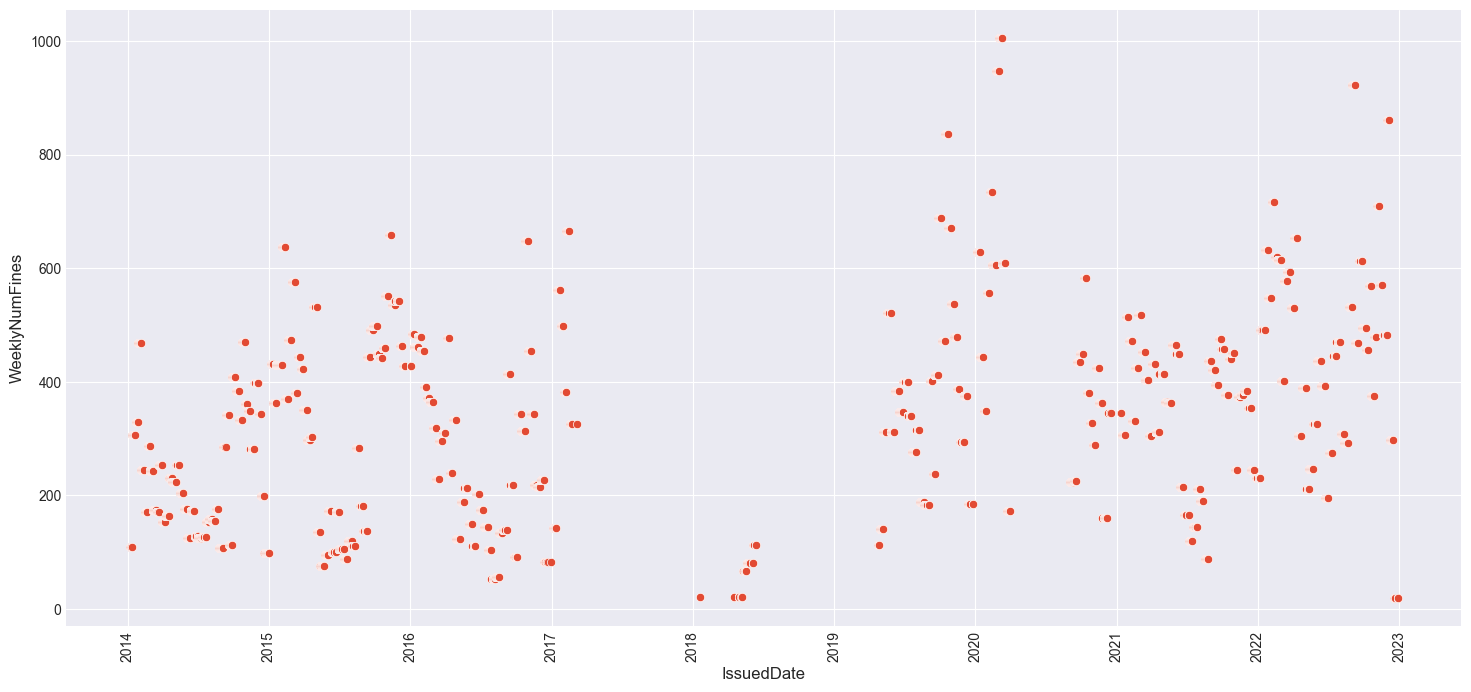

In [437]:
plt.figure(figsize=(18, 8))

sns.scatterplot(x='IssuedDate', y='WeeklyNumFines', data=citations_cleaned) 
plt.xticks(rotation=90)

plt.show()

In [438]:
citations_cleaned[~(citations_cleaned["IssuedDate"].dt.year.isin([2018, 2019]))]

Fine Residence IssuedDate IssuedTime  temperature_2m_max  \
0         0        CA 2014-01-06   08:50:00                -3.3   
1        30        UT 2014-01-06   13:00:00                -3.3   
2         8        VA 2014-01-06   12:59:00                -3.3   
3        30        NM 2014-01-06   12:56:00                -3.3   
4        30        MT 2014-01-06   12:55:00                -3.3   
...     ...       ...        ...        ...                 ...   
89309     0        WA 2022-12-29   12:39:00                 1.5   
89310    40        UT 2022-12-29   12:24:00                 1.5   
89311    40        WA 2022-12-29   12:07:00                 1.5   
89312    40        UT 2022-12-29   08:05:00                 1.5   
89313    40        UT 2022-12-29   12:24:00                 1.5   

       temperature_2m_min  temperature_2m_mean  rain_sum  snowfall_sum  \
0                   -17.6                -10.5       0.0          0.00   
1                   -17.6                -10.5       0.0          0.00   
2                   -17.6                -10.5       0.0          0.00   
3                   -17.6                -10.5       0.0          0.00   
4                   -17.6                -10.5       0.0          0.00   
...                   ...                  ...       ...           ...   
89309                -5.9                 -2.5       0.0          0.49   
89310                -5.9                 -2.5       0.0          0.49   
89311                -5.9                 -2.5       0.0          0.49   
89312                -5.9                 -2.5       0.0          0.49   
89313                -5.9                 -2.5       0.0          0.49   

       wind_speed_10m_max   CO   NO2     O3  PM10  PM25  Month  NA_Correction  \
0                     6.8  1.8  47.0  0.022  51.0  13.7      1          False   
1                     6.8  1.8  47.0  0.022  51.0  13.7      1          False   
2                     6.8  1.8  47.0  0.022  51.0  13.7      1          False   
3                     6.8  1.8  47.0  0.022  51.0  13.7      1          False   
4                     6.8  1.8  47.0  0.022  51.0  13.7      1          False   
...                   ...  ...   ...    ...   ...   ...    ...            ...   
89309                 5.8  0.3  26.9  0.032   6.0   1.9     12          False   
89310                 5.8  0.3  26.9  0.032   6.0   1.9     12          False   
89311                 5.8  0.3  26.9  0.032   6.0   1.9     12          False   
89312                 5.8  0.3  26.9  0.032   6.0   1.9     12          False   
89313                 5.8  0.3  26.9  0.032   6.0   1.9     12          False   

            Day  Year  Week  WeeklyNumFines  
0        Monday  2014     1             109  
1        Monday  2014     1             109  
2        Monday  2014     1             109  
3        Monday  2014     1             109  
4        Monday  2014     1             109  
...         ...   ...   ...             ...  
89309  Thursday  2022   255              20  
89310  Thursday  2022   255              20  
89311  Thursday  2022   255              20  
89312  Thursday  2022   255              20  
89313  Thursday  2022   255              20  

[79345 rows x 21 columns]

In [439]:
citations_cleaned.describe()

Fine  temperature_2m_max  temperature_2m_min  \
count  89314.000000        89314.000000        89314.000000   
mean      31.504311           14.249084            3.065326   
std       30.833199           11.038358            9.232886   
min        0.000000           -9.100000          -20.800000   
25%        0.000000            4.700000           -4.000000   
50%       25.000000           12.600000            2.300000   
75%       60.000000           22.900000           10.000000   
max      300.000000           38.000000           24.400000   

       temperature_2m_mean      rain_sum  snowfall_sum  wind_speed_10m_max  \
count         89314.000000  89314.000000  89314.000000        89314.000000   
mean              8.736695      0.620767      0.385865           10.664008   
std              10.155197      2.020095      1.270693            4.311086   
min             -15.400000      0.000000      0.000000            3.500000   
25%               0.400000      0.000000      0.000000            7.400000   
50%               7.200000      0.000000      0.000000            9.900000   
75%              16.500000      0.100000      0.000000           12.900000   
max              31.100000     35.700000     17.150000           38.200000   

                 CO           NO2            O3          PM10          PM25  \
count  89314.000000  89314.000000  89314.000000  89314.000000  89314.000000   
mean       0.432530     26.409685      0.039456     22.662619      7.091146   
std        0.318981     13.144254      0.012955     11.882429      5.691740   
min        0.000000      3.400000      0.001000      2.000000      0.000000   
25%        0.300000     16.300000      0.031000     15.000000      3.800000   
50%        0.400000     25.300000      0.039000     22.000000      5.700000   
75%        0.500000     34.000000      0.048000     28.000000      8.505871   
max        2.200000    128.000000      0.087000    121.000000     67.200000   

              Month          Year          Week  WeeklyNumFines  
count  89314.000000  89314.000000  89314.000000    89314.000000  
mean       6.347325   2018.434445    141.268222      441.426585  
std        3.753475      2.963822     72.444735      182.933990  
min        1.000000   2014.000000      1.000000       20.000000  
25%        3.000000   2015.000000     79.000000      328.000000  
50%        6.000000   2019.000000    150.000000      436.000000  
75%       10.000000   2021.000000    206.000000      537.000000  
max       12.000000   2022.000000    255.000000     1006.000000

In [457]:
env.describe()

temperature_2m_max  temperature_2m_min  temperature_2m_mean  \
count         3282.000000         3282.000000          3282.000000   
mean            16.577148            5.072730            11.018342   
std             11.721620            9.865071            10.855555   
min            -11.500000          -22.400000           -16.900000   
25%              6.425000           -2.300000             2.000000   
50%             15.750000            4.300000            10.100000   
75%             27.800000           14.100000            21.500000   
max             38.000000           24.400000            31.100000   

          rain_sum  snowfall_sum  wind_speed_10m_max           CO  \
count  3282.000000   3282.000000         3282.000000  3282.000000   
mean      0.709537      0.447492           11.015356     0.389244   
std       2.367340      1.501996            4.352814     0.302021   
min       0.000000      0.000000            3.100000     0.000000   
25%       0.000000      0.000000            7.800000     0.200000   
50%       0.000000      0.000000           10.300000     0.300000   
75%       0.100000      0.000000           13.500000     0.500000   
max      35.700000     17.150000           38.200000     2.200000   

               NO2           O3         PM10         PM25        Month  \
count  3282.000000  3282.000000  3282.000000  3282.000000  3282.000000   
mean     23.513200     0.042948    26.912078     7.369690     6.531688   
std      12.466786     0.014042    29.379540     6.008423     3.445009   
min       2.300000     0.001000     2.000000     0.000000     1.000000   
25%      13.200000     0.033000    14.000000     3.900000     4.000000   
50%      21.750000     0.043000    22.000000     5.900000     7.000000   
75%      32.000000     0.053000    33.000000     8.731513    10.000000   
max     128.000000     0.088000   892.000000    67.200000    12.000000   

              Year  
count  3282.000000  
mean   2018.006094  
std       2.579305  
min    2014.000000  
25%    2016.000000  
50%    2018.000000  
75%    2020.000000  
max    2022.000000

In [131]:
daily_fines = citations_cleaned.groupby("IssuedDate")["Fine"].count().reset_index()
daily_fines.columns = ["IssuedDate", "DailyNumFines"]
daily_fines

IssuedDate  DailyNumFines
0    2014-01-06             23
1    2014-01-07             52
2    2014-01-08             13
3    2014-01-09              3
4    2014-01-10             16
...         ...            ...
1777 2022-12-19              4
1778 2022-12-20              1
1779 2022-12-21              4
1780 2022-12-28              1
1781 2022-12-29             10

[1782 rows x 2 columns]

In [132]:
citations_cleaned = pd.merge(citations_cleaned, daily_fines, how="left")

In [133]:
daily_citations = pd.merge(citations_cleaned.groupby("IssuedDate").sum("Fine").reset_index().rename(
                                columns={"Fine": "TotalFineAmount"}),
                           citations_cleaned[citations_cleaned['Fine'] > 0].groupby('IssuedDate')["Fine"].count().reset_index().rename(
                                columns={"Fine": "NumPaidFines"}),
                           how = "left").fillna(0)
daily_citations["AvgPaidFine"] = daily_citations["TotalFineAmount"]/daily_citations["NumPaidFines"]
daily_citations = daily_citations[["IssuedDate", "TotalFineAmount", "NumPaidFines", "AvgPaidFine"]].fillna(0)
daily_citations

IssuedDate  TotalFineAmount  NumPaidFines  AvgPaidFine
0    2014-01-06              386          17.0    22.705882
1    2014-01-07             1238          46.0    26.913043
2    2014-01-08              216           8.0    27.000000
3    2014-01-09              350           3.0   116.666667
4    2014-01-10              221          11.0    20.090909
...         ...              ...           ...          ...
1777 2022-12-19              300           4.0    75.000000
1778 2022-12-20               75           1.0    75.000000
1779 2022-12-21                0           0.0     0.000000
1780 2022-12-28               35           1.0    35.000000
1781 2022-12-29              220           7.0    31.428571

[1782 rows x 4 columns]

In [134]:
citations_cleaned = pd.merge(citations_cleaned, daily_citations, how="left")
citations_cleaned

Fine Residence IssuedDate IssuedTime  temperature_2m_max  \
0         0        CA 2014-01-06   08:50:00                -3.3   
1        30        UT 2014-01-06   13:00:00                -3.3   
2         8        VA 2014-01-06   12:59:00                -3.3   
3        30        NM 2014-01-06   12:56:00                -3.3   
4        30        MT 2014-01-06   12:55:00                -3.3   
...     ...       ...        ...        ...                 ...   
89309     0        WA 2022-12-29   12:39:00                 1.5   
89310    40        UT 2022-12-29   12:24:00                 1.5   
89311    40        WA 2022-12-29   12:07:00                 1.5   
89312    40        UT 2022-12-29   08:05:00                 1.5   
89313    40        UT 2022-12-29   12:24:00                 1.5   

       temperature_2m_min  temperature_2m_mean  rain_sum  snowfall_sum  \
0                   -17.6                -10.5       0.0          0.00   
1                   -17.6                -10.5       0.0          0.00   
2                   -17.6                -10.5       0.0          0.00   
3                   -17.6                -10.5       0.0          0.00   
4                   -17.6                -10.5       0.0          0.00   
...                   ...                  ...       ...           ...   
89309                -5.9                 -2.5       0.0          0.49   
89310                -5.9                 -2.5       0.0          0.49   
89311                -5.9                 -2.5       0.0          0.49   
89312                -5.9                 -2.5       0.0          0.49   
89313                -5.9                 -2.5       0.0          0.49   

       wind_speed_10m_max   CO   NO2     O3  PM10  PM25  Month  NA_Correction  \
0                     6.8  1.8  47.0  0.022  51.0  13.7      1          False   
1                     6.8  1.8  47.0  0.022  51.0  13.7      1          False   
2                     6.8  1.8  47.0  0.022  51.0  13.7      1          False   
3                     6.8  1.8  47.0  0.022  51.0  13.7      1          False   
4                     6.8  1.8  47.0  0.022  51.0  13.7      1          False   
...                   ...  ...   ...    ...   ...   ...    ...            ...   
89309                 5.8  0.3  26.9  0.032   6.0   1.9     12          False   
89310                 5.8  0.3  26.9  0.032   6.0   1.9     12          False   
89311                 5.8  0.3  26.9  0.032   6.0   1.9     12          False   
89312                 5.8  0.3  26.9  0.032   6.0   1.9     12          False   
89313                 5.8  0.3  26.9  0.032   6.0   1.9     12          False   

            Day  Year  Week  WeeklyNumFines  DailyNumFines  TotalFineAmount  \
0        Monday  2014     1             109             23              386   
1        Monday  2014     1             109             23              386   
2        Monday  2014     1             109             23              386   
3        Monday  2014     1             109             23              386   
4        Monday  2014     1             109             23              386   
...         ...   ...   ...             ...            ...              ...   
89309  Thursday  2022   255              20             10              220   
89310  Thursday  2022   255              20             10              220   
89311  Thursday  2022   255              20             10              220   
89312  Thursday  2022   255              20             10              220   
89313  Thursday  2022   255              20             10              220   

       NumPaidFines  AvgPaidFine  
0              17.0    22.705882  
1              17.0    22.705882  
2              17.0    22.705882  
3              17.0    22.705882  
4              17.0    22.705882  
...             ...          ...  
89309           7.0    31.428571  
89310           7.0    31.428571  
89311           7.0    31.428571  
89312           7.0    31.428571  
89313 

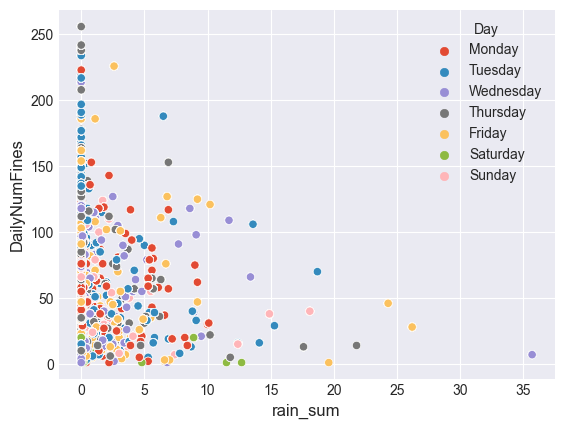

In [135]:
sns.scatterplot(x="rain_sum",
                y="DailyNumFines",
                hue="Day",
                data=citations_cleaned)

plt.show()

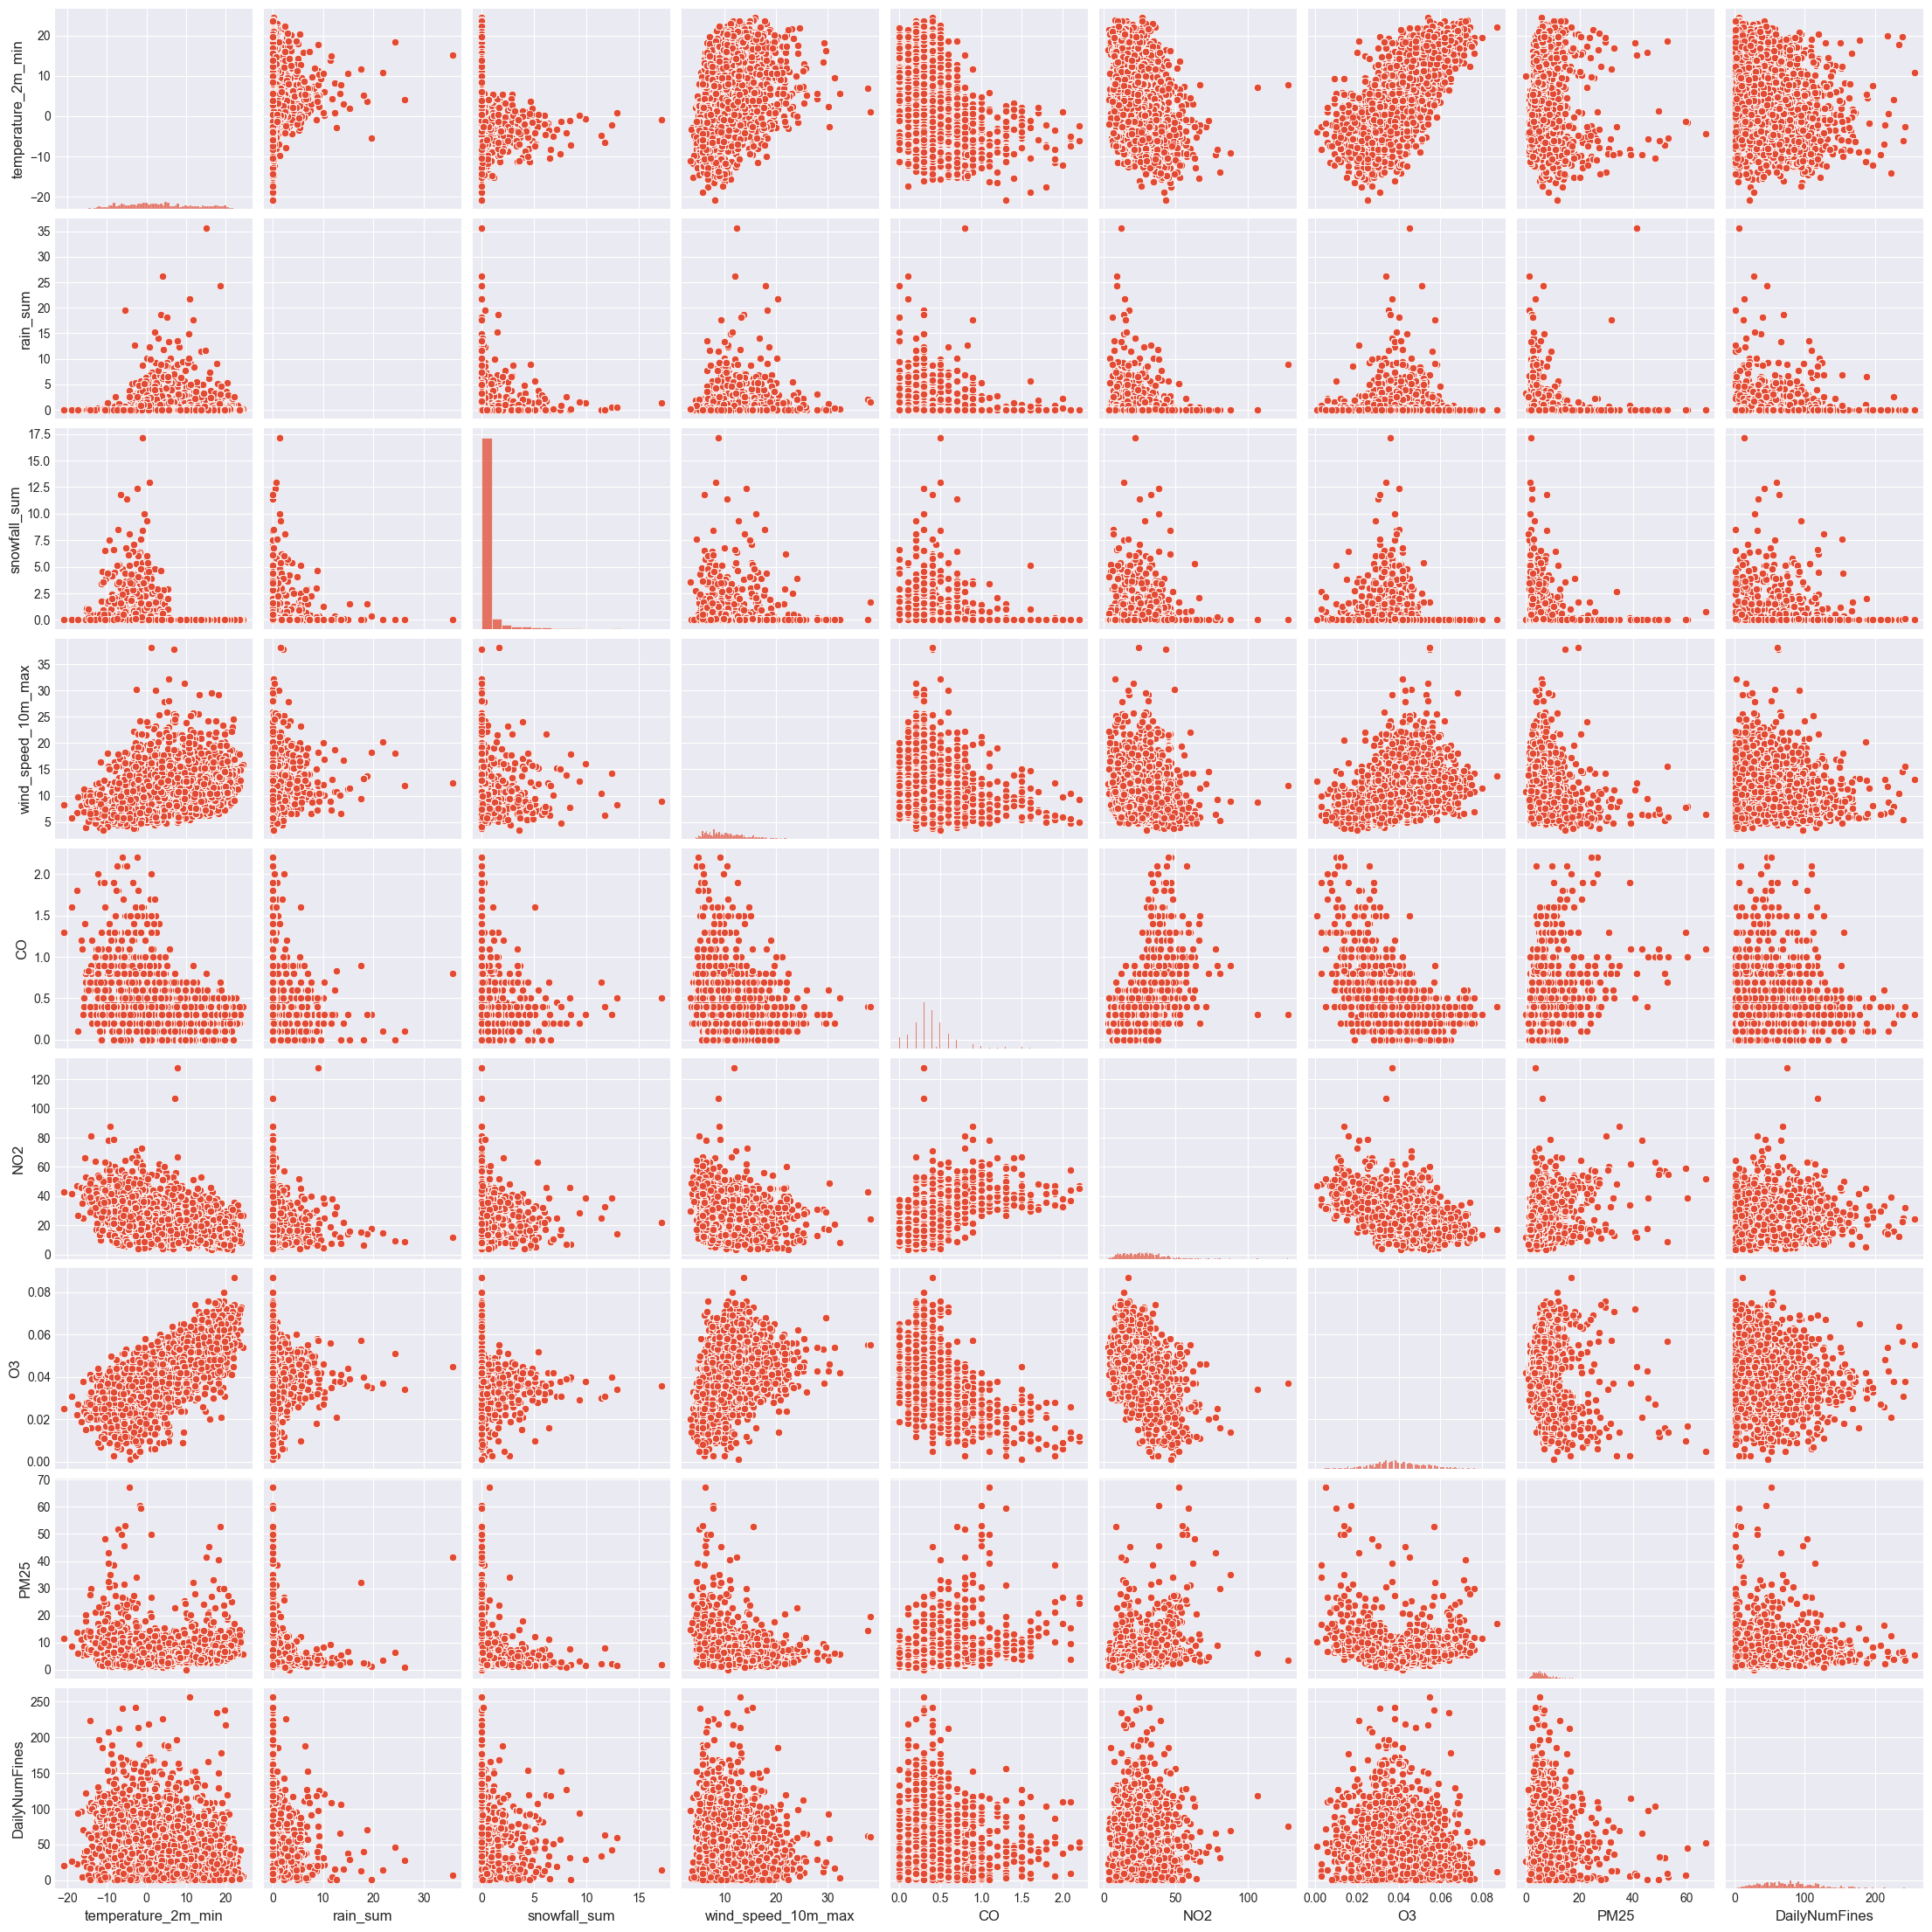

In [140]:
sns.pairplot(data=citations_cleaned, vars=["temperature_2m_min", "rain_sum", "snowfall_sum", "wind_speed_10m_max",
                                           "CO", "NO2", "O3", "PM25", "DailyNumFines"])

plt.show()

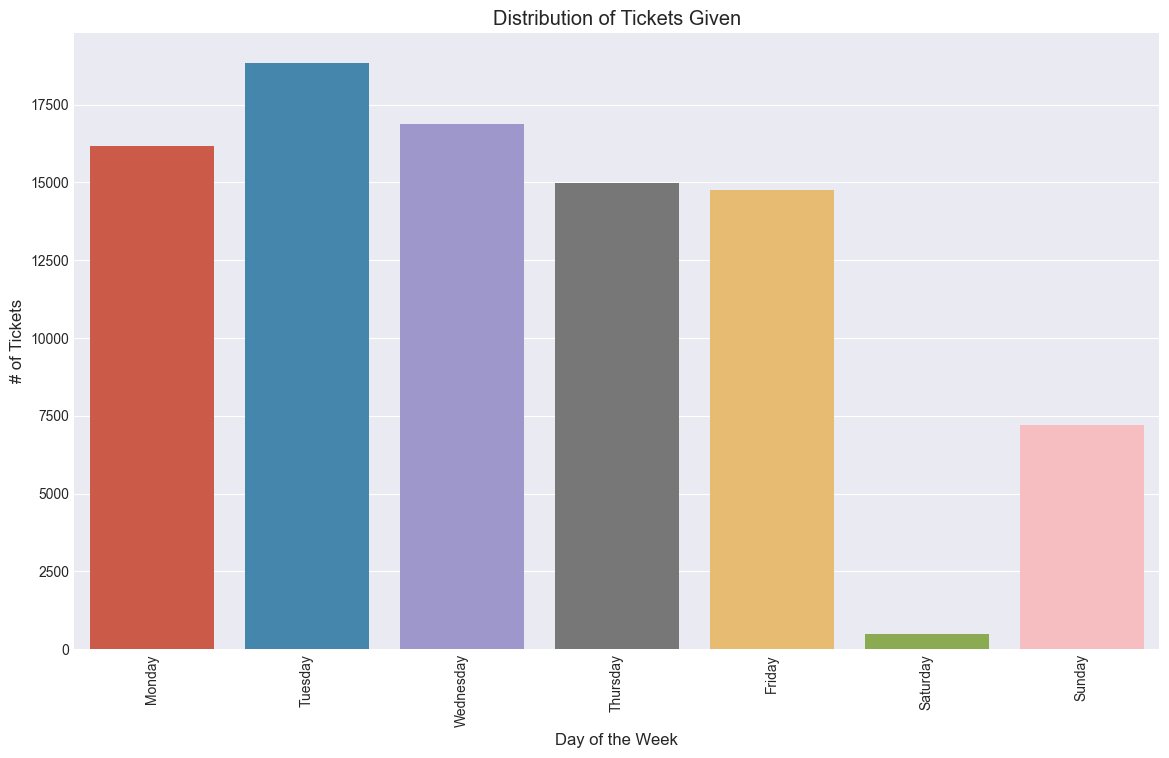

In [141]:
plt.figure(figsize=(14, 8))

sns.countplot(x="Day", data=citations_cleaned)

plt.xlabel('Day of the Week')
plt.ylabel('# of Tickets')
plt.title('Distribution of Tickets Given')

plt.xticks(rotation=90)

plt.show()

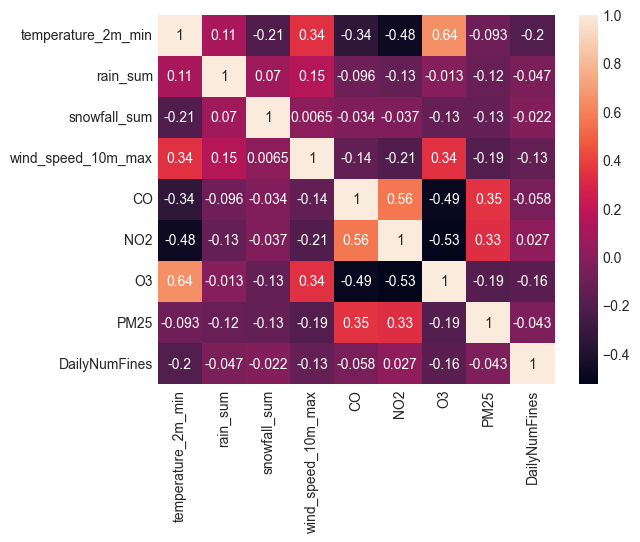

In [142]:
sns.heatmap(citations_cleaned[["temperature_2m_min", "rain_sum", "snowfall_sum", "wind_speed_10m_max",
                                           "CO", "NO2", "O3", "PM25", "DailyNumFines"]].corr(), annot=True)

plt.show()

In [143]:
citations_cleaned.to_csv("citations_cleaned.csv", index=False)

In [460]:
#Adopted from https://airnowtomed.app.cloud.gov/sites/default/files/2020-05/aqi-technical-assistance-document-sept2018.pdf


levels = {
    "LEVEL": ["Good", "Moderate", "Unhealthy for Sensitive Groups", "Unhealthy", "Very Unhealthy"],
    "O3": [0.054, 0.070, 0.085, 0.105, 0.2],
    "PM25": [12, 35.4, 55.4, 150.4, 250.4],
    "PM10": [54, 154, 254, 354, 424],
    "CO": [4.4, 9.4, 12.4, 15.4, 30.4],
    "NO2": [53, 100, 360, 649, 1249],
    "AQI.MIN": [0, 51, 101, 151, 201],
    "AQI.MAX": [50, 100, 150, 200, 300]
}

max_levels = pd.DataFrame(levels)
max_levels.to_csv("AQI-Criteria.csv", index=False)

max_levels

LEVEL     O3   PM25  PM10    CO   NO2  AQI.MIN  \
0                            Good  0.054   12.0    54   4.4    53        0   
1                        Moderate  0.070   35.4   154   9.4   100       51   
2  Unhealthy for Sensitive Groups  0.085   55.4   254  12.4   360      101   
3                       Unhealthy  0.105  150.4   354  15.4   649      151   
4                  Very Unhealthy  0.200  250.4   424  30.4  1249      201   

   AQI.MAX  
0       50  
1      100  
2      150  
3      200  
4      300

In [145]:
metrics = ["CO", "NO2", "O3", "PM10", "PM25"]

In [146]:
citations_cleaned = pd.read_csv("citations_cleaned.csv")
citations_cleaned

Fine Residence  IssuedDate IssuedTime  temperature_2m_max  \
0         0        CA  2014-01-06   08:50:00                -3.3   
1        30        UT  2014-01-06   13:00:00                -3.3   
2         8        VA  2014-01-06   12:59:00                -3.3   
3        30        NM  2014-01-06   12:56:00                -3.3   
4        30        MT  2014-01-06   12:55:00                -3.3   
...     ...       ...         ...        ...                 ...   
89309     0        WA  2022-12-29   12:39:00                 1.5   
89310    40        UT  2022-12-29   12:24:00                 1.5   
89311    40        WA  2022-12-29   12:07:00                 1.5   
89312    40        UT  2022-12-29   08:05:00                 1.5   
89313    40        UT  2022-12-29   12:24:00                 1.5   

       temperature_2m_min  temperature_2m_mean  rain_sum  snowfall_sum  \
0                   -17.6                -10.5       0.0          0.00   
1                   -17.6                -10.5       0.0          0.00   
2                   -17.6                -10.5       0.0          0.00   
3                   -17.6                -10.5       0.0          0.00   
4                   -17.6                -10.5       0.0          0.00   
...                   ...                  ...       ...           ...   
89309                -5.9                 -2.5       0.0          0.49   
89310                -5.9                 -2.5       0.0          0.49   
89311                -5.9                 -2.5       0.0          0.49   
89312                -5.9                 -2.5       0.0          0.49   
89313                -5.9                 -2.5       0.0          0.49   

       wind_speed_10m_max   CO   NO2     O3  PM10  PM25  Month  NA_Correction  \
0                     6.8  1.8  47.0  0.022  51.0  13.7      1          False   
1                     6.8  1.8  47.0  0.022  51.0  13.7      1          False   
2                     6.8  1.8  47.0  0.022  51.0  13.7      1          False   
3                     6.8  1.8  47.0  0.022  51.0  13.7      1          False   
4                     6.8  1.8  47.0  0.022  51.0  13.7      1          False   
...                   ...  ...   ...    ...   ...   ...    ...            ...   
89309                 5.8  0.3  26.9  0.032   6.0   1.9     12          False   
89310                 5.8  0.3  26.9  0.032   6.0   1.9     12          False   
89311                 5.8  0.3  26.9  0.032   6.0   1.9     12          False   
89312                 5.8  0.3  26.9  0.032   6.0   1.9     12          False   
89313                 5.8  0.3  26.9  0.032   6.0   1.9     12          False   

            Day  Year  Week  WeeklyNumFines  DailyNumFines  TotalFineAmount  \
0        Monday  2014     1             109             23              386   
1        Monday  2014     1             109             23              386   
2        Monday  2014     1             109             23              386   
3        Monday  2014     1             109             23              386   
4        Monday  2014     1             109             23              386   
...         ...   ...   ...             ...            ...              ...   
89309  Thursday  2022   255              20             10              220   
89310  Thursday  2022   255              20             10              220   
89311  Thursday  2022   255              20             10              220   
89312  Thursday  2022   255              20             10              220   
89313  Thursday  2022   255              20             10              220   

       NumPaidFines  AvgPaidFine  
0              17.0    22.705882  
1              17.0    22.705882  
2              17.0    22.705882  
3              17.0    22.705882  
4              17.0    22.705882  
...             ...          ...  
89309           7.0    31.428571  
89310           7.0    31.428571  
89311           7.0    31.428571  
89312           7.0    31.428

In [458]:
citations_sample = citations_cleaned.sample(n=100)
citations_sample

Fine Residence IssuedDate IssuedTime  temperature_2m_max  \
13662    30        UT 2015-03-09   10:27:00                10.8   
1220     10        UT 2014-02-05   09:50:00                -1.7   
41524     0        UT 2019-09-10   14:10:00                25.2   
72289     0        UT 2022-02-02   08:17:00                -4.0   
23078    30        CA 2015-12-03   08:30:00                 4.0   
...     ...       ...        ...        ...                 ...   
71579    60        WY 2022-01-24   08:13:00                 2.9   
67076    60        UT 2021-09-30   11:12:00                16.5   
32513    30        NV 2016-10-24   18:36:00                15.1   
47456     0        UT 2020-01-08   09:32:00                 0.4   
83225    75        WA 2022-09-14   12:08:00                19.5   

       temperature_2m_min  temperature_2m_mean  rain_sum  snowfall_sum  \
13662                -4.6                  3.5       0.0          0.00   
1220                -15.7                 -8.4       0.0          0.00   
41524                14.4                 19.5       0.4          0.00   
72289               -12.4                 -8.8       0.0          0.49   
23078               -11.3                 -3.6       0.0          0.00   
...                   ...                  ...       ...           ...   
71579                -7.0                 -2.6       0.0          0.00   
67076                 5.4                 11.2       0.0          0.00   
32513                 9.4                 12.7       1.7          0.00   
47456                -4.0                 -1.8       0.0          2.03   
83225                14.9                 16.8      11.7          0.00   

       wind_speed_10m_max   CO   NO2     O3       PM10       PM25  Month  \
13662                 8.1  0.8  41.0  0.043  19.022500   6.200000      3   
1220                 11.2  0.5  45.0  0.026  10.000000   8.700000      2   
41524                17.6  0.0  18.8  0.047  26.000000   7.700000      9   
72289                10.5  0.2  21.4  0.036  11.000000   4.500000      2   
23078                11.4  1.3  51.0  0.012  24.985185  13.800000     12   
...                   ...  ...   ...    ...        ...        ...    ...   
71579                 6.6  0.6  33.4  0.026  30.000000  16.300000      1   
67076                12.2  0.4  16.6  0.041  19.000000   4.500000      9   
32513                20.5  0.5  32.0  0.014  15.000000   5.800000     10   
47456                12.6  0.0  37.5  0.028  16.000000  12.535836      1   
83225                 7.2  0.2   7.5  0.035   7.000000   2.600000      9   

       NA_Correction        Day  Year  Week  WeeklyNumFines  
13662           True     Monday  2015    51             380  
1220           False  Wednesday  2014     5             244  
41524          False    Tuesday  2019   144             401  
72289          False  Wednesday  2022   219             548  
23078           True   Thursday  2015    80             543  
...              ...        ...   ...   ...             ...  
71579          False     Monday  2022   218             632  
67076          False   Thursday  2021   206             458  
32513          False     Monday  2016   115             647  
47456           True  Wednesday  2020   157             628  
83225          False  Wednesday  2022   243             469  

[100 rows x 21 columns]

In [464]:
metrics = ["CO", "NO2", "O3", "PM10", "PM25"]

def get_level(row, metric):
    levels_row = max_levels.set_index('LEVEL')
    for level in levels_row.index:
        if row[metric] <= levels_row.loc[level, "AQI.MAX" if metric == "AQI" else metric]:
            return level
    return "Hazardous"
        
for metric in metrics:
    citations_sample[f'{metric}_LEVEL'] = citations_sample.apply(get_level, metric=metric, axis=1)
    
citations_sample

IssuedDate  Year  Month      Day  DailyNumFines  NumPaidFines  \
403 2015-05-12  2015      5  Tuesday             14          10.0   
384 2015-04-17  2015      4   Friday             83          75.0   
692 2016-05-31  2016      5  Tuesday             20          20.0   
849 2017-01-10  2017      1  Tuesday             23          19.0   
64  2014-03-18  2014      3  Tuesday             20          18.0   

     TotalFineAmount  AvgPaidFine  MinTemp  RainPrecip  SnowPrecip  Wind   CO  \
403              255    25.500000      6.7         0.1        0.00  24.3  0.3   
384             2141    28.546667      1.7         0.5        0.00  18.0  0.4   
692              678    33.900000     13.3         0.0        0.00  13.9  0.2   
849              528    27.789474     -0.1         0.2        2.66   9.5  0.3   
64               363    20.166667     -3.3         0.0        0.00  13.7  0.3   

    CO_LEVEL        NO2 NO2_LEVEL     O3  O3_LEVEL       PM10 PM10_LEVEL  \
403     Good  16.713076      Good  0.062  Moderate  15.000000       Good   
384     Good  24.452805      Good  0.046      Good  21.885251       Good   
692     Good  21.000000      Good  0.067  Moderate  18.901296       Good   
849     Good  38.640930      Good  0.038      Good   5.000000       Good   
64      Good  32.000000      Good  0.036      Good  13.483866       Good   

         PM25 PM25_LEVEL  NA_Correction  Tues  Wed  Thurs  Fri  Sat  Sun  AQI  \
403  4.900000       Good           True     1    0      0    0    0    0   74   
384  3.800000       Good           True     0    0      0    1    0    0   43   
692  5.390598       Good           True     1    0      0    0    0    0   90   
849  2.000000       Good           True     1    0      0    0    0    0   36   
64   3.200000       Good           True     1    0      0    0    0    0   33   

    AQI_LEVEL  
403  Moderate  
384      Good  
692  Moderate  
849      Good  
64       Good

In [246]:
citations_cleaned_compact = citations_cleaned[["IssuedDate", "temperature_2m_min", "rain_sum", "snowfall_sum", "wind_speed_10m_max",
                   "CO", "NO2", "O3", "PM10", "PM25", "Month", "NA_Correction", "Day", "Year", "Week",
                   "DailyNumFines", "TotalFineAmount", "NumPaidFines", "AvgPaidFine"]].copy().drop_duplicates().reset_index(drop=True)
citations_cleaned_compact

IssuedDate  temperature_2m_min  rain_sum  snowfall_sum  \
0     2014-01-06               -17.6       0.0          0.00   
1     2014-01-07               -11.6       0.0          0.21   
2     2014-01-08                -2.6       0.0          2.66   
3     2014-01-09               -10.3       0.0          3.92   
4     2014-01-10                -4.1       0.0          0.91   
...          ...                 ...       ...           ...   
1777  2022-12-19               -10.4       0.0          0.00   
1778  2022-12-20                -7.3       0.0          0.07   
1779  2022-12-21                -3.7       0.0          3.43   
1780  2022-12-28                -4.0       0.0          3.50   
1781  2022-12-29                -5.9       0.0          0.49   

      wind_speed_10m_max   CO   NO2     O3  PM10  PM25  Month  NA_Correction  \
0                    6.8  1.8  47.0  0.022  51.0  13.7      1          False   
1                    5.9  1.9  47.0  0.007  47.0  21.0      1          False   
2                    7.9  0.8  48.0  0.003  73.0  33.9      1          False   
3                    8.9  0.7  42.0  0.021  30.0  18.0      1          False   
4                    7.0  1.0  46.0  0.021  30.0   7.9      1          False   
...                  ...  ...   ...    ...   ...   ...    ...            ...   
1777                 7.4  0.6  44.2  0.021  39.0  17.8     12          False   
1778                 5.9  0.8  47.3  0.008  48.0  17.1     12          False   
1779                 8.7  0.7  39.9  0.036  12.0   4.9     12          False   
1780                 9.3  0.3  26.1  0.029   3.0   1.1     12          False   
1781                 5.8  0.3  26.9  0.032   6.0   1.9     12          False   

            Day  Year  Week  DailyNumFines  TotalFineAmount  NumPaidFines  \
0        Monday  2014     1             23              386          17.0   
1       Tuesday  2014     1             52             1238          46.0   
2     Wednesday  2014     1             13              216           8.0   
3      Thursday  2014     1              3              350           3.0   
4        Friday  2014     1             16              221          11.0   
...         ...   ...   ...            ...              ...           ...   
1777     Monday  2022   255              4              300           4.0   
1778    Tuesday  2022   255              1               75           1.0   
1779  Wednesday  2022   255              4                0           0.0   
1780  Wednesday  2022   255              1               35           1.0   
1781   Thursday  2022   255             10              220           7.0   

      AvgPaidFine  
0       22.705882  
1       26.913043  
2       27.000000  
3      116.666667  
4       20.090909  
...           ...  
1777    75.000000  
1778    75.000000  
1779     0.000000  
1780    35.000000  
1781    31.428571  

[1782 rows x 19 columns]

In [475]:
def get_level(row, metric):
    levels_row = max_levels.set_index('LEVEL')
    for level in levels_row.index:
        if row[metric] <= levels_row.loc[level, "AQI.MAX" if metric == "AQI" else metric]:
            return level
    if metric == "O3":
        #8-hour O3 values do not define higher AQI values
        return "Very unhealthy"
    else:
        return "Hazardous"
        
for metric in metrics:
    citations_cleaned_compact[f'{metric}_LEVEL'] = citations_cleaned_compact.apply(get_level, metric=metric, axis=1)
    
citations_cleaned_compact

IssuedDate  Year  Month        Day  DailyNumFines  NumPaidFines  \
0    2014-01-06  2014      1     Monday             23          17.0   
1    2014-01-07  2014      1    Tuesday             52          46.0   
2    2014-01-08  2014      1  Wednesday             13           8.0   
3    2014-01-09  2014      1   Thursday              3           3.0   
4    2014-01-10  2014      1     Friday             16          11.0   
...         ...   ...    ...        ...            ...           ...   
1777 2022-12-19  2022     12     Monday              4           4.0   
1778 2022-12-20  2022     12    Tuesday              1           1.0   
1779 2022-12-21  2022     12  Wednesday              4           0.0   
1780 2022-12-28  2022     12  Wednesday              1           1.0   
1781 2022-12-29  2022     12   Thursday             10           7.0   

      TotalFineAmount  AvgPaidFine  MinTemp  RainPrecip  SnowPrecip  Wind  \
0                 386    22.705882    -17.6         0.0        0.00   6.8   
1                1238    26.913043    -11.6         0.0        0.21   5.9   
2                 216    27.000000     -2.6         0.0        2.66   7.9   
3                 350   116.666667    -10.3         0.0        3.92   8.9   
4                 221    20.090909     -4.1         0.0        0.91   7.0   
...               ...          ...      ...         ...         ...   ...   
1777              300    75.000000    -10.4         0.0        0.00   7.4   
1778               75    75.000000     -7.3         0.0        0.07   5.9   
1779                0     0.000000     -3.7         0.0        3.43   8.7   
1780               35    35.000000     -4.0         0.0        3.50   9.3   
1781              220    31.428571     -5.9         0.0        0.49   5.8   

       CO CO_LEVEL   NO2 NO2_LEVEL     O3 O3_LEVEL  PM10 PM10_LEVEL  PM25  \
0     1.8     Good  47.0      Good  0.022     Good  51.0       Good  13.7   
1     1.9     Good  47.0      Good  0.007     Good  47.0       Good  21.0   
2     0.8     Good  48.0      Good  0.003     Good  73.0   Moderate  33.9   
3     0.7     Good  42.0      Good  0.021     Good  30.0       Good  18.0   
4     1.0     Good  46.0      Good  0.021     Good  30.0       Good   7.9   
...   ...      ...   ...       ...    ...      ...   ...        ...   ...   
1777  0.6     Good  44.2      Good  0.021     Good  39.0       Good  17.8   
1778  0.8     Good  47.3      Good  0.008     Good  48.0       Good  17.1   
1779  0.7     Good  39.9      Good  0.036     Good  12.0       Good   4.9   
1780  0.3     Good  26.1      Good  0.029     Good   3.0       Good   1.1   
1781  0.3     Good  26.9      Good  0.032     Good   6.0       Good   1.9   

     PM25_LEVEL  NA_Correction  Tues  Wed  Thurs  Fri  Sat  Sun  AQI AQI_LEVEL  
0      Moderate          False     0    0      0    0    0    0   54  Moderate  
1      Moderate          False     1    0      0    0    0    0   70  Moderate  
2      Moderate          False     0    1      0    0    0    0   97  Moderate  
3      Moderate          False     0    0      1    0    0    0   63  Moderate  
4          Good          False     0    0      0    1    0    0   43      Good  
...         ...            ...   ...  ...    ...  ...  ...  ...  ...       ...  
1777   Moderate          False     0    0      0    0    0    0   63  Moderate  
1778   Moderate          False     1    0      0    0    0    0   62  Moderate  
1779       Good          False     0    1      0    0    0    0   37      Good  
1780       Good          False     0    1      0    0    0    0   27      Good  
1781       Good          False     0    0      1    0    0    0   30      Good  

[1782 rows x 31 columns]

In [476]:
for metric in metrics:
    env[f'{metric}_LEVEL'] = env.apply(get_level, metric=metric, axis=1)
env

DATE  temperature_2m_max  temperature_2m_min  temperature_2m_mean  \
0    2014-01-06                -3.3               -17.6                -10.5   
1    2014-01-07                 1.1               -11.6                 -4.7   
2    2014-01-08                 0.9                -2.6                 -0.5   
3    2014-01-09                 0.1               -10.3                 -4.4   
4    2014-01-10                 3.1                -4.1                 -0.5   
...         ...                 ...                 ...                  ...   
3277 2022-12-27                 7.2                 3.4                  4.9   
3278 2022-12-28                 4.6                -4.0                  0.6   
3279 2022-12-29                 1.5                -5.9                 -2.5   
3280 2022-12-30                 3.0                -3.7                  0.6   
3281 2022-12-31                 5.8                 2.9                  3.9   

      rain_sum  snowfall_sum  wind_speed_10m_max   CO   NO2       O3  PM10  \
0          0.0          0.00                 6.8  1.8  47.0  0.02200  47.0   
1          0.0          0.21                 5.9  1.9  47.0  0.00700  66.0   
2          0.0          2.66                 7.9  0.8  48.0  0.00300  53.0   
3          0.0          3.92                 8.9  0.7  42.0  0.02100  46.0   
4          0.0          0.91                 7.0  1.0  46.0  0.02100  38.0   
...        ...           ...                 ...  ...   ...      ...   ...   
3277       6.6          4.27                13.2  0.6  29.8  0.03300   3.0   
3278       0.0          3.50                 9.3  0.3  26.1  0.02900   3.0   
3279       0.0          0.49                 5.8  0.3  26.9  0.03200   6.0   
3280       0.0          7.56                 6.1  0.4  14.2  0.03800   2.0   
3281      10.0         10.99                 5.9  0.4  17.0  0.02458   3.0   

      PM25  Month  NA_Correction        Day  Year CO_LEVEL NO2_LEVEL O3_LEVEL  \
0     13.7      1          False     Monday  2014     Good      Good     Good   
1     21.0      1          False    Tuesday  2014     Good      Good     Good   
2     33.9      1          False  Wednesday  2014     Good      Good     Good   
3     18.0      1          False   Thursday  2014     Good      Good     Good   
4      7.9      1          False     Friday  2014     Good      Good     Good   
...    ...    ...            ...        ...   ...      ...       ...      ...   
3277   2.1     12          False    Tuesday  2022     Good      Good     Good   
3278   1.1     12          False  Wednesday  2022     Good      Good     Good   
3279   1.9     12          False   Thursday  2022     Good      Good     Good   
3280   1.3     12          False     Friday  2022     Good      Good     Good   
3281   2.1     12           True   Saturday  2022     Good      Good     Good   

     PM10_LEVEL PM25_LEVEL  
0          Good   Moderate  
1      Moderate   Moderate  
2          Good   Moderate  
3          Good   Moderate  
4          Good       Good  
...         ...        ...  
3277       Good       Good  
3278       Good       Good  
3279       Good       Good  
3280       Good       Good  
3281       Good       Good  

[3282 rows x 21 columns]

In [248]:
citations_cleaned_compact = citations_cleaned_compact.rename(columns={
    "temperature_2m_min": "MinTemp",
    "rain_sum": "RainPrecip",
    "snowfall_sum": "SnowPrecip",
    "wind_speed_10m_max": "Wind"
})

citations_cleaned_compact = pd.concat([citations_cleaned_compact, pd.get_dummies(citations_cleaned_compact['Day'], prefix='Day')], axis=1)

citations_cleaned_compact = citations_cleaned_compact[["IssuedDate", "Year", "Month", "Day",
                          "DailyNumFines", "NumPaidFines", "TotalFineAmount", "AvgPaidFine",
                          "MinTemp", "RainPrecip", "SnowPrecip", "Wind",
                          "CO", "CO_LEVEL", "NO2", "NO2_LEVEL", "O3", "O3_LEVEL", "PM10", "PM10_LEVEL", "PM25", "PM25_LEVEL", "NA_Correction",
                          "Day_Tuesday", "Day_Wednesday", "Day_Thursday", "Day_Friday", "Day_Saturday", "Day_Sunday"]].copy()

citations_cleaned_compact = citations_cleaned_compact.rename(columns={
    "Day_Tuesday": "Tues",
    "Day_Wednesday": "Wed",
    "Day_Thursday": "Thurs",
    "Day_Friday": "Fri",
    "Day_Saturday": "Sat",
    "Day_Sunday": "Sun"
})

citations_cleaned_compact

IssuedDate  Year  Month        Day  DailyNumFines  NumPaidFines  \
0     2014-01-06  2014      1     Monday             23          17.0   
1     2014-01-07  2014      1    Tuesday             52          46.0   
2     2014-01-08  2014      1  Wednesday             13           8.0   
3     2014-01-09  2014      1   Thursday              3           3.0   
4     2014-01-10  2014      1     Friday             16          11.0   
...          ...   ...    ...        ...            ...           ...   
1777  2022-12-19  2022     12     Monday              4           4.0   
1778  2022-12-20  2022     12    Tuesday              1           1.0   
1779  2022-12-21  2022     12  Wednesday              4           0.0   
1780  2022-12-28  2022     12  Wednesday              1           1.0   
1781  2022-12-29  2022     12   Thursday             10           7.0   

      TotalFineAmount  AvgPaidFine  MinTemp  RainPrecip  SnowPrecip  Wind  \
0                 386    22.705882    -17.6         0.0        0.00   6.8   
1                1238    26.913043    -11.6         0.0        0.21   5.9   
2                 216    27.000000     -2.6         0.0        2.66   7.9   
3                 350   116.666667    -10.3         0.0        3.92   8.9   
4                 221    20.090909     -4.1         0.0        0.91   7.0   
...               ...          ...      ...         ...         ...   ...   
1777              300    75.000000    -10.4         0.0        0.00   7.4   
1778               75    75.000000     -7.3         0.0        0.07   5.9   
1779                0     0.000000     -3.7         0.0        3.43   8.7   
1780               35    35.000000     -4.0         0.0        3.50   9.3   
1781              220    31.428571     -5.9         0.0        0.49   5.8   

       CO CO_LEVEL   NO2 NO2_LEVEL     O3 O3_LEVEL  PM10 PM10_LEVEL  PM25  \
0     1.8     Good  47.0      Good  0.022     Good  51.0       Good  13.7   
1     1.9     Good  47.0      Good  0.007     Good  47.0       Good  21.0   
2     0.8     Good  48.0      Good  0.003     Good  73.0   Moderate  33.9   
3     0.7     Good  42.0      Good  0.021     Good  30.0       Good  18.0   
4     1.0     Good  46.0      Good  0.021     Good  30.0       Good   7.9   
...   ...      ...   ...       ...    ...      ...   ...        ...   ...   
1777  0.6     Good  44.2      Good  0.021     Good  39.0       Good  17.8   
1778  0.8     Good  47.3      Good  0.008     Good  48.0       Good  17.1   
1779  0.7     Good  39.9      Good  0.036     Good  12.0       Good   4.9   
1780  0.3     Good  26.1      Good  0.029     Good   3.0       Good   1.1   
1781  0.3     Good  26.9      Good  0.032     Good   6.0       Good   1.9   

     PM25_LEVEL  NA_Correction  Tues  Wed  Thurs  Fri  Sat  Sun  
0      Moderate          False     0    0      0    0    0    0  
1      Moderate          False     1    0      0    0    0    0  
2      Moderate          False     0    1      0    0    0    0  
3      Moderate          False     0    0      1    0    0    0  
4          Good          False     0    0      0    1    0    0  
...         ...            ...   ...  ...    ...  ...  ...  ...  
1777   Moderate          False     0    0      0    0    0    0  
1778   Moderate          False     1    0      0    0    0    0  
1779       Good          False     0    1      0    0    0    0  
1780       Good          False     0    1      0    0    0    0  
1781       Good          False     0    0      1    0    0    0  

[1782 rows x 29 columns]

In [249]:
citations_cleaned_compact[citations_cleaned_compact[[metric + '_LEVEL' for metric in metrics]].eq('Unhealthy').any(axis=1)]

IssuedDate  Year  Month        Day  DailyNumFines  NumPaidFines  \
609  2016-02-14  2016      2     Sunday             52          51.0   
738  2016-08-04  2016      8   Thursday             12           9.0   
866  2017-01-31  2017      1    Tuesday             45          37.0   
867  2017-02-01  2017      2  Wednesday              7           5.0   

     TotalFineAmount  AvgPaidFine  MinTemp  RainPrecip  SnowPrecip  Wind   CO  \
609             2385    46.764706     -4.3         0.0        0.77   6.4  1.1   
738              315    35.000000     22.1         0.0        0.00  13.7  0.4   
866             1372    37.081081     -1.6         0.0        0.00   7.9  1.0   
867              175    35.000000     -1.4         0.0        0.00   7.8  1.3   

    CO_LEVEL       NO2 NO2_LEVEL     O3   O3_LEVEL        PM10 PM10_LEVEL  \
609     Good  52.00000      Good  0.005       Good   18.814205       Good   
738     Good  17.00000      Good  0.087  Unhealthy   42.000000       Good   
866     Good  38.64093      Good  0.017       Good   88.000000   Moderate   
867     Good  59.00000  Moderate  0.010       Good  109.000000   Moderate   

     PM25 PM25_LEVEL  NA_Correction  Tues  Wed  Thurs  Fri  Sat  Sun  
609  67.2  Unhealthy           True     0    0      0    0    0    1  
738  16.9   Moderate          False     0    0      1    0    0    0  
866  60.4  Unhealthy           True     1    0      0    0    0    0  
867  59.6  Unhealthy          False     0    1      0    0    0    0

In [478]:
import math

citations_sample = citations_cleaned_compact.sample(n=5)

def convert_aqi(row):
    aqis = []
    
    for metric in metrics:
        
        benchmark = 1
        if metric == "O3":
            benchmark = 0.001
        elif metric in ["PM25", "CO"]:
            benchmark = 0.1
        
        level = row[metric + "_LEVEL"]
        matched_index = (max_levels["LEVEL"] == level).idxmax()
        BP_lo = 0
        if matched_index != 0:
            aqi_row_previous = max_levels[max_levels["LEVEL"] == max_levels["LEVEL"][matched_index-1]]
            BP_lo = aqi_row_previous[metric].values[0] + benchmark
            
        aqi_row = max_levels[max_levels["LEVEL"] == level]
        if level == "Hazardous":
            aqi_row = pd.DataFrame({
                "O3": [0.2],
                "PM25": [350.4],
                "PM10": [504],
                "CO": [40.4],
                "NO2": [1649],
                "AQI.MAX": [400],
                "AQI.MIN": [301]
            })
        
        truncated = row[metric]
        if metric == "O3":
            truncated = math.floor(truncated * 1000) / 1000
        elif metric == "PM25":
            truncated = math.floor(truncated * 10) / 10
        elif metric == "PM10":
            truncated = math.floor(truncated)
        elif metric == "CO":
            truncated = math.floor(truncated * 10) / 10
        else: #metric is NO2
            truncated = math.floor(truncated)
            
        
        aqi = (aqi_row["AQI.MAX"].values[0] - aqi_row["AQI.MIN"].values[0])*(truncated-BP_lo)/(aqi_row[metric].values[0]-BP_lo)+aqi_row["AQI.MIN"].values[0]
        #print(aqi)
        
        aqis.append(aqi)
    
    return(round(np.max(aqis)))

citations_sample["AQI"] = citations_sample.apply(convert_aqi, axis=1)
citations_sample

IssuedDate  Year  Month        Day  DailyNumFines  NumPaidFines  \
236 2014-10-22  2014     10  Wednesday             64          56.0   
878 2017-02-13  2017      2     Monday            104          94.0   
136 2014-06-18  2014      6  Wednesday             14          10.0   
794 2016-10-20  2016     10   Thursday             88          78.0   
47  2014-02-27  2014      2   Thursday             22          17.0   

     TotalFineAmount  AvgPaidFine  MinTemp  RainPrecip  SnowPrecip  Wind   CO  \
236             1569    28.017857      3.9         0.0         0.0   8.2  0.6   
878             5235    55.691489     -4.3         0.0         0.0   5.2  0.6   
136              230    23.000000      6.6         0.9         0.0  10.4  0.3   
794             2063    26.448718      3.4         0.0         0.0   8.9  0.6   
47               528    31.058824      0.1        10.2         0.0  16.9  0.7   

    CO_LEVEL   NO2 NO2_LEVEL     O3 O3_LEVEL       PM10 PM10_LEVEL  PM25  \
236     Good  38.0      Good  0.038     Good  20.851753       Good   3.7   
878     Good  52.0      Good  0.034     Good  30.000000       Good  13.0   
136     Good  22.0      Good  0.047     Good  25.219722       Good   3.9   
794     Good  39.0      Good  0.030     Good   4.000000       Good   5.6   
47      Good  35.0      Good  0.030     Good  18.814205       Good   3.3   

    PM25_LEVEL  NA_Correction  Tues  Wed  Thurs  Fri  Sat  Sun  AQI AQI_LEVEL  
236       Good           True     0    1      0    0    0    0   36      Good  
878   Moderate          False     0    0      0    0    0    0   53  Moderate  
136       Good           True     0    1      0    0    0    0   44      Good  
794       Good          False     0    0      1    0    0    0   37      Good  
47        Good           True     0    0      1    0    0    0   33      Good

In [479]:
env["AQI"] = env.apply(convert_aqi, axis=1)
env

DATE  temperature_2m_max  temperature_2m_min  temperature_2m_mean  \
0    2014-01-06                -3.3               -17.6                -10.5   
1    2014-01-07                 1.1               -11.6                 -4.7   
2    2014-01-08                 0.9                -2.6                 -0.5   
3    2014-01-09                 0.1               -10.3                 -4.4   
4    2014-01-10                 3.1                -4.1                 -0.5   
...         ...                 ...                 ...                  ...   
3277 2022-12-27                 7.2                 3.4                  4.9   
3278 2022-12-28                 4.6                -4.0                  0.6   
3279 2022-12-29                 1.5                -5.9                 -2.5   
3280 2022-12-30                 3.0                -3.7                  0.6   
3281 2022-12-31                 5.8                 2.9                  3.9   

      rain_sum  snowfall_sum  wind_speed_10m_max   CO   NO2       O3  PM10  \
0          0.0          0.00                 6.8  1.8  47.0  0.02200  47.0   
1          0.0          0.21                 5.9  1.9  47.0  0.00700  66.0   
2          0.0          2.66                 7.9  0.8  48.0  0.00300  53.0   
3          0.0          3.92                 8.9  0.7  42.0  0.02100  46.0   
4          0.0          0.91                 7.0  1.0  46.0  0.02100  38.0   
...        ...           ...                 ...  ...   ...      ...   ...   
3277       6.6          4.27                13.2  0.6  29.8  0.03300   3.0   
3278       0.0          3.50                 9.3  0.3  26.1  0.02900   3.0   
3279       0.0          0.49                 5.8  0.3  26.9  0.03200   6.0   
3280       0.0          7.56                 6.1  0.4  14.2  0.03800   2.0   
3281      10.0         10.99                 5.9  0.4  17.0  0.02458   3.0   

      PM25  Month  NA_Correction        Day  Year CO_LEVEL NO2_LEVEL O3_LEVEL  \
0     13.7      1          False     Monday  2014     Good      Good     Good   
1     21.0      1          False    Tuesday  2014     Good      Good     Good   
2     33.9      1          False  Wednesday  2014     Good      Good     Good   
3     18.0      1          False   Thursday  2014     Good      Good     Good   
4      7.9      1          False     Friday  2014     Good      Good     Good   
...    ...    ...            ...        ...   ...      ...       ...      ...   
3277   2.1     12          False    Tuesday  2022     Good      Good     Good   
3278   1.1     12          False  Wednesday  2022     Good      Good     Good   
3279   1.9     12          False   Thursday  2022     Good      Good     Good   
3280   1.3     12          False     Friday  2022     Good      Good     Good   
3281   2.1     12           True   Saturday  2022     Good      Good     Good   

     PM10_LEVEL PM25_LEVEL  AQI  
0          Good   Moderate   54  
1      Moderate   Moderate   70  
2          Good   Moderate   97  
3          Good   Moderate   63  
4          Good       Good   43  
...         ...        ...  ...  
3277       Good       Good   31  
3278       Good       Good   27  
3279       Good       Good   30  
3280       Good       Good   35  
3281       Good       Good   22  

[3282 rows x 22 columns]

In [323]:
citations_cleaned_compact["AQI"] = citations_cleaned_compact.apply(convert_aqi, axis=1)
citations_cleaned_compact["IssuedDate"] = pd.to_datetime(citations_cleaned_compact["IssuedDate"])

In [324]:
citations_cleaned_compact.to_csv("citations_cleaned_compact.csv", index=False)

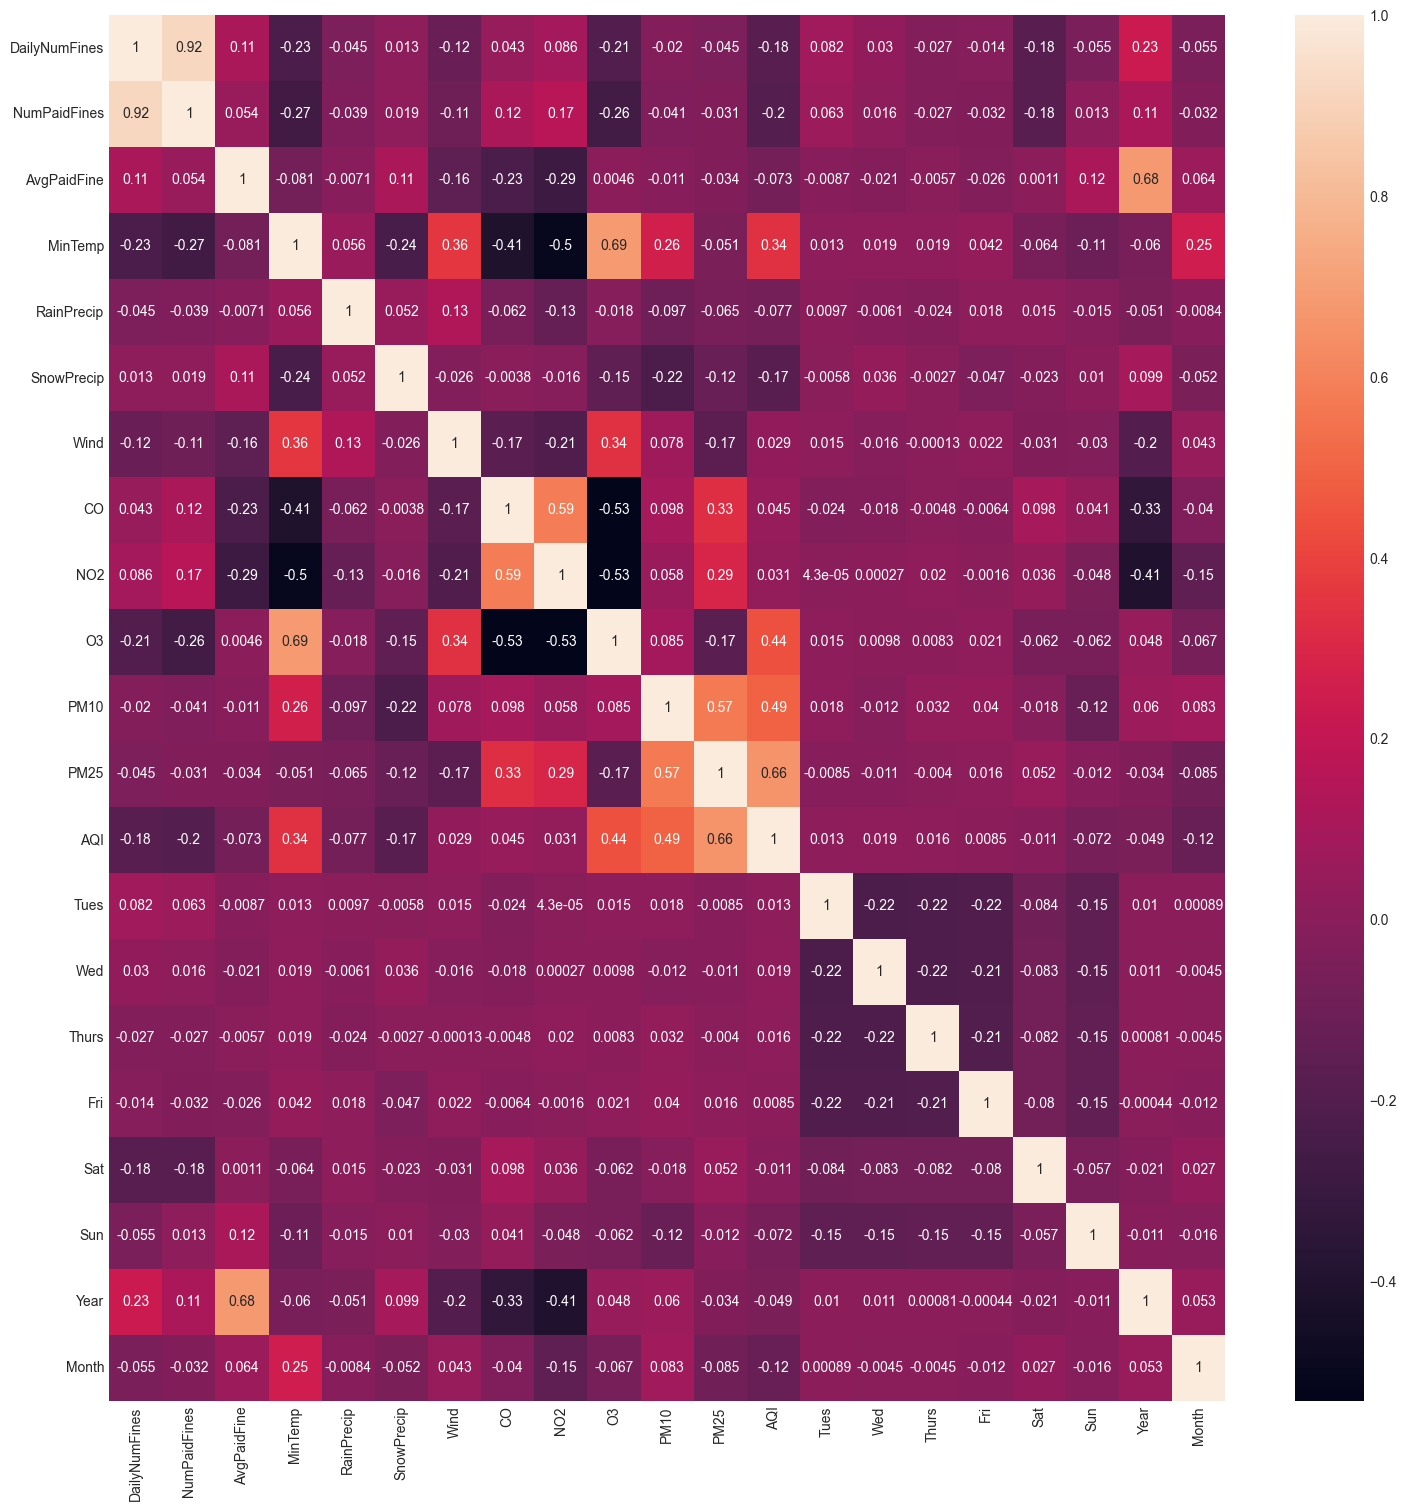

In [253]:
plt.figure(figsize=(18, 18))

sns.heatmap(citations_cleaned_compact[["DailyNumFines", "NumPaidFines", "AvgPaidFine", 
                                       "MinTemp", "RainPrecip", "SnowPrecip", "Wind",
                                       "CO", "NO2", "O3", "PM10", "PM25", "AQI",
                                       "Tues", "Wed", "Thurs", "Fri", "Sat", "Sun", "Year", "Month"]].corr(), annot=True)

plt.show()

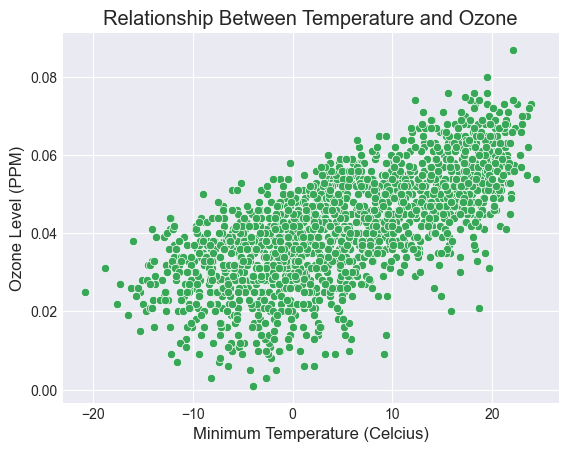

In [157]:
sns.set_palette(sns.color_palette("RdYlGn")[::-1])

sns.scatterplot(x="MinTemp",
                y="O3",
                data=citations_cleaned_compact)

plt.xlabel("Minimum Temperature (Celcius)")
plt.ylabel("Ozone Level (PPM)")

plt.title("Relationship Between Temperature and Ozone")

plt.show()

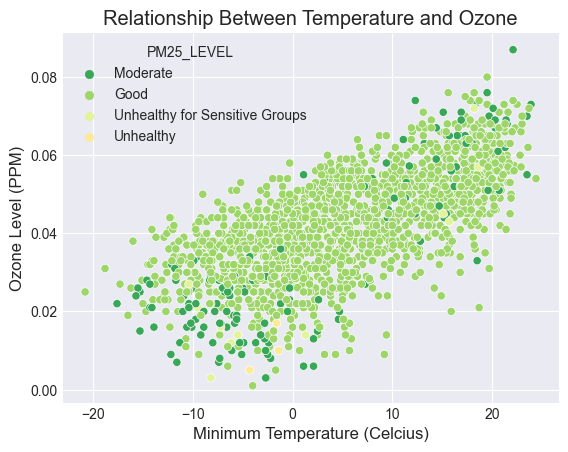

In [158]:
sns.scatterplot(x="MinTemp",
                y="O3",
                hue="PM25_LEVEL",
                data=citations_cleaned_compact)

plt.xlabel("Minimum Temperature (Celcius)")
plt.ylabel("Ozone Level (PPM)")

plt.title("Relationship Between Temperature and Ozone")

plt.show()

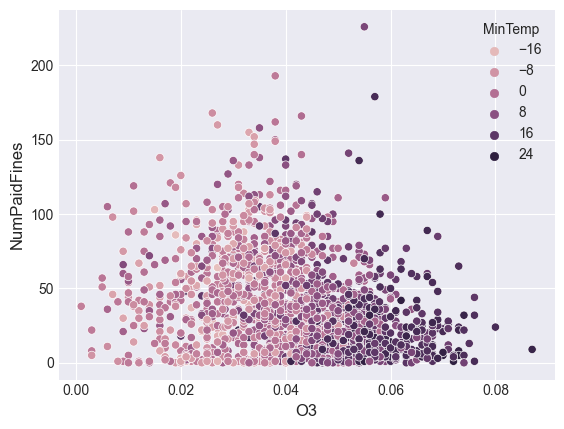

In [159]:
sns.set_palette(palette='BuPu')

sns.scatterplot(x="O3",
                y="NumPaidFines",
                hue="MinTemp",
                data=citations_cleaned_compact)


plt.show()

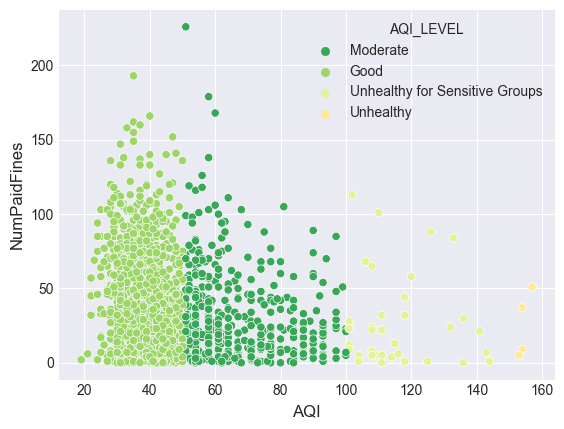

In [266]:
sns.set_palette(sns.color_palette("RdYlGn")[::-1])

sns.scatterplot(x="AQI",
                y="NumPaidFines",
                data=citations_cleaned_compact,
                hue="AQI_LEVEL")

plt.show()

In [325]:
Provo = citations_cleaned_compact[citations_cleaned_compact["NA_Correction"] == False].copy().reset_index(drop=True)
Provo

IssuedDate  Year  Month        Day  DailyNumFines  NumPaidFines  \
0    2014-01-06  2014      1     Monday             23          17.0   
1    2014-01-07  2014      1    Tuesday             52          46.0   
2    2014-01-08  2014      1  Wednesday             13           8.0   
3    2014-01-09  2014      1   Thursday              3           3.0   
4    2014-01-10  2014      1     Friday             16          11.0   
...         ...   ...    ...        ...            ...           ...   
1070 2022-12-19  2022     12     Monday              4           4.0   
1071 2022-12-20  2022     12    Tuesday              1           1.0   
1072 2022-12-21  2022     12  Wednesday              4           0.0   
1073 2022-12-28  2022     12  Wednesday              1           1.0   
1074 2022-12-29  2022     12   Thursday             10           7.0   

      TotalFineAmount  AvgPaidFine  MinTemp  RainPrecip  SnowPrecip  Wind  \
0                 386    22.705882    -17.6         0.0        0.00   6.8   
1                1238    26.913043    -11.6         0.0        0.21   5.9   
2                 216    27.000000     -2.6         0.0        2.66   7.9   
3                 350   116.666667    -10.3         0.0        3.92   8.9   
4                 221    20.090909     -4.1         0.0        0.91   7.0   
...               ...          ...      ...         ...         ...   ...   
1070              300    75.000000    -10.4         0.0        0.00   7.4   
1071               75    75.000000     -7.3         0.0        0.07   5.9   
1072                0     0.000000     -3.7         0.0        3.43   8.7   
1073               35    35.000000     -4.0         0.0        3.50   9.3   
1074              220    31.428571     -5.9         0.0        0.49   5.8   

       CO CO_LEVEL   NO2 NO2_LEVEL     O3 O3_LEVEL  PM10 PM10_LEVEL  PM25  \
0     1.8     Good  47.0      Good  0.022     Good  51.0       Good  13.7   
1     1.9     Good  47.0      Good  0.007     Good  47.0       Good  21.0   
2     0.8     Good  48.0      Good  0.003     Good  73.0   Moderate  33.9   
3     0.7     Good  42.0      Good  0.021     Good  30.0       Good  18.0   
4     1.0     Good  46.0      Good  0.021     Good  30.0       Good   7.9   
...   ...      ...   ...       ...    ...      ...   ...        ...   ...   
1070  0.6     Good  44.2      Good  0.021     Good  39.0       Good  17.8   
1071  0.8     Good  47.3      Good  0.008     Good  48.0       Good  17.1   
1072  0.7     Good  39.9      Good  0.036     Good  12.0       Good   4.9   
1073  0.3     Good  26.1      Good  0.029     Good   3.0       Good   1.1   
1074  0.3     Good  26.9      Good  0.032     Good   6.0       Good   1.9   

     PM25_LEVEL  NA_Correction  Tues  Wed  Thurs  Fri  Sat  Sun  AQI AQI_LEVEL  
0      Moderate          False     0    0      0    0    0    0   54  Moderate  
1      Moderate          False     1    0      0    0    0    0   70  Moderate  
2      Moderate          False     0    1      0    0    0    0   97  Moderate  
3      Moderate          False     0    0      1    0    0    0   63  Moderate  
4          Good          False     0    0      0    1    0    0   43      Good  
...         ...            ...   ...  ...    ...  ...  ...  ...  ...       ...  
1070   Moderate          False     0    0      0    0    0    0   63  Moderate  
1071   Moderate          False     1    0      0    0    0    0   62  Moderate  
1072       Good          False     0    1      0    0    0    0   37      Good  
1073       Good          False     0    1      0    0    0    0   27      Good  
1074       Good          False     0    0      1    0    0    0   30      Good  

[1075 rows x 31 columns]

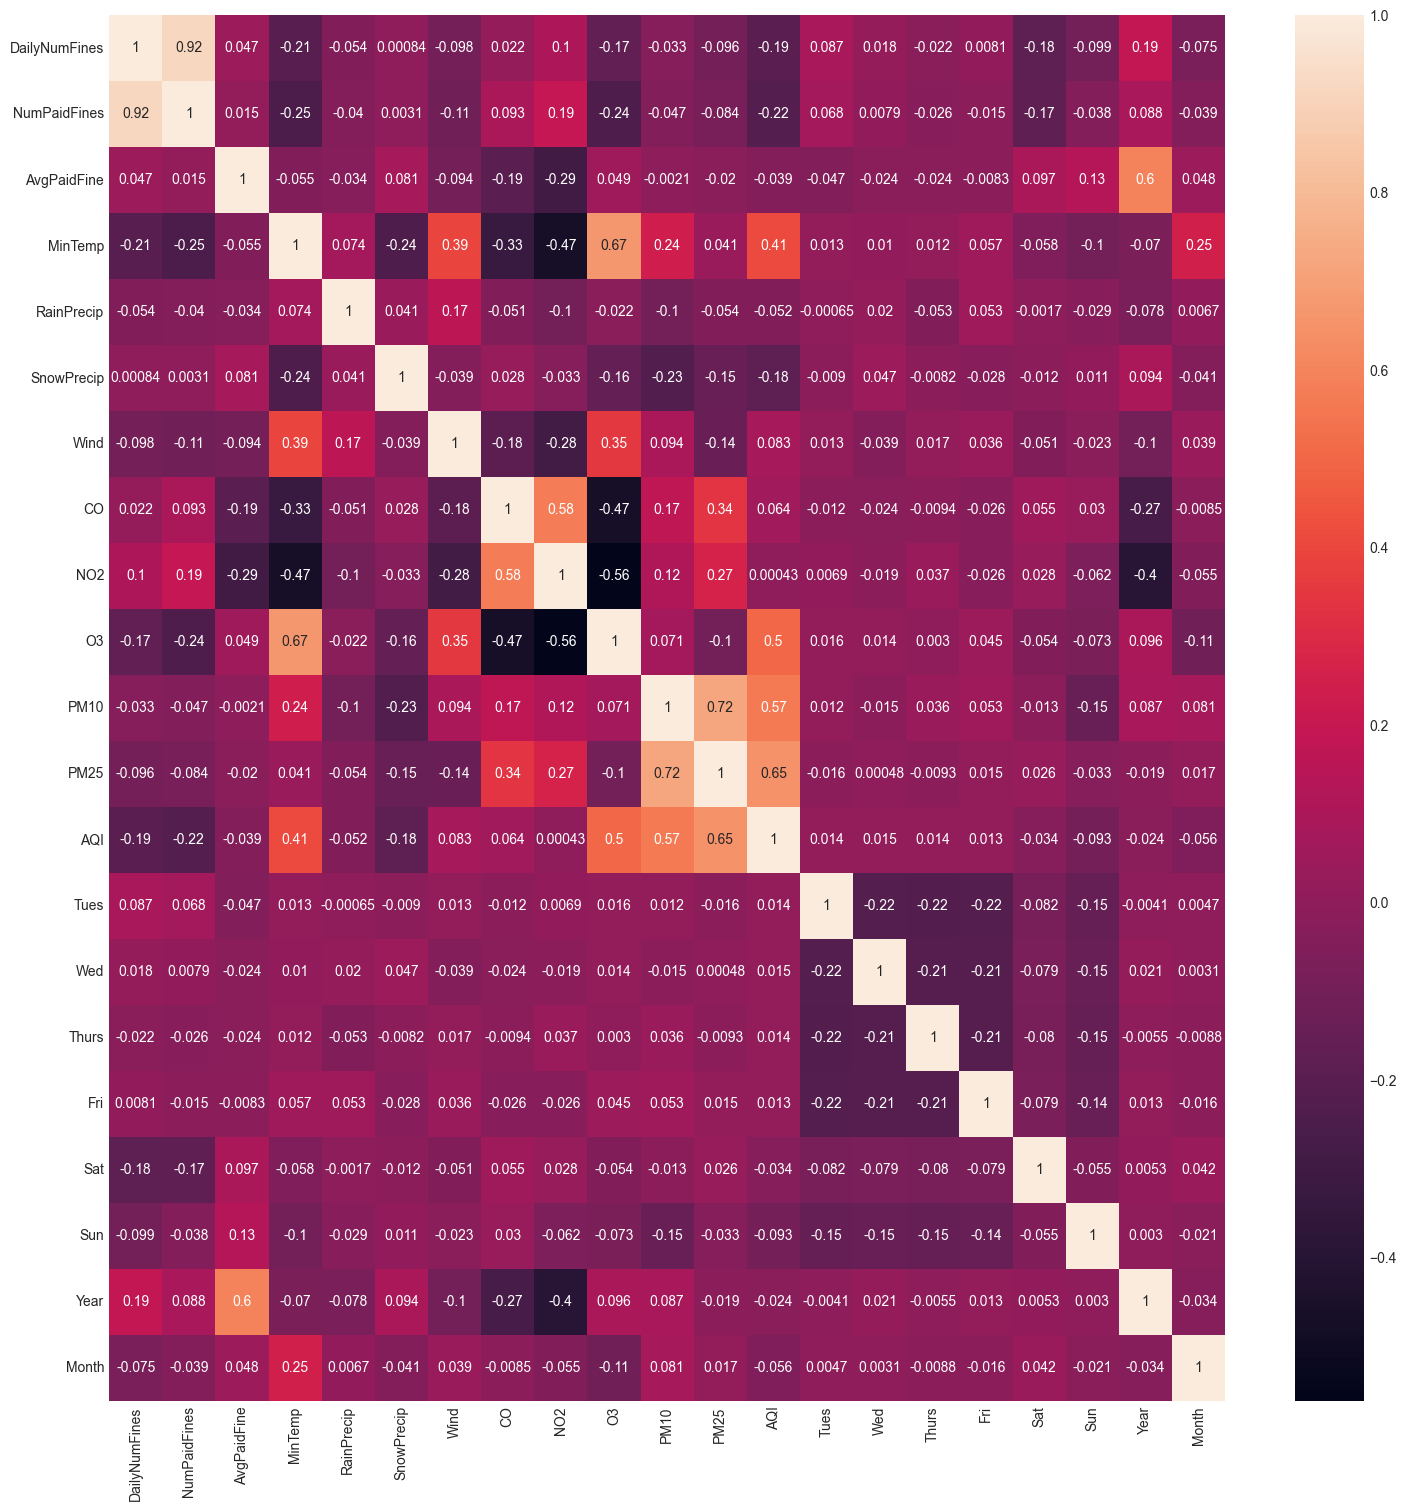

In [271]:
plt.figure(figsize=(18, 18))

sns.heatmap(Provo[["DailyNumFines", "NumPaidFines", "AvgPaidFine", 
                                       "MinTemp", "RainPrecip", "SnowPrecip", "Wind",
                                       "CO", "NO2", "O3", "PM10", "PM25", "AQI",
                                       "Tues", "Wed", "Thurs", "Fri", "Sat", "Sun", "Year", "Month"]].corr(), annot=True)

plt.show()

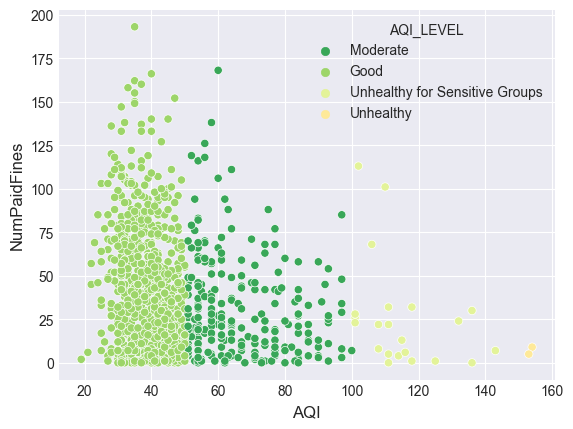

In [278]:
sns.set_palette(sns.color_palette("RdYlGn")[::-1])

sns.scatterplot(x="AQI",
                y="NumPaidFines",
                data=Provo,
                hue="AQI_LEVEL")

plt.show()

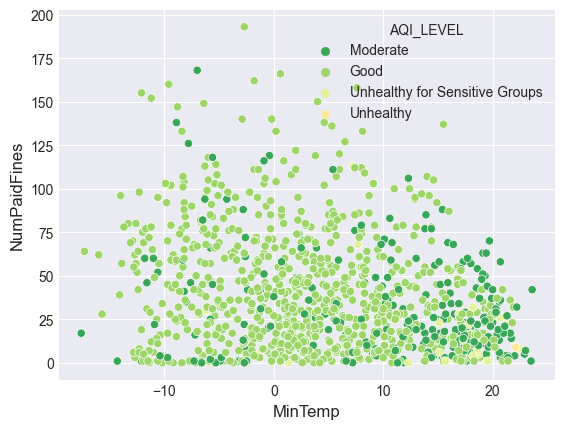

In [279]:
sns.scatterplot(x="MinTemp",
                y="NumPaidFines",
                data=Provo,
                hue="AQI_LEVEL")

plt.show()

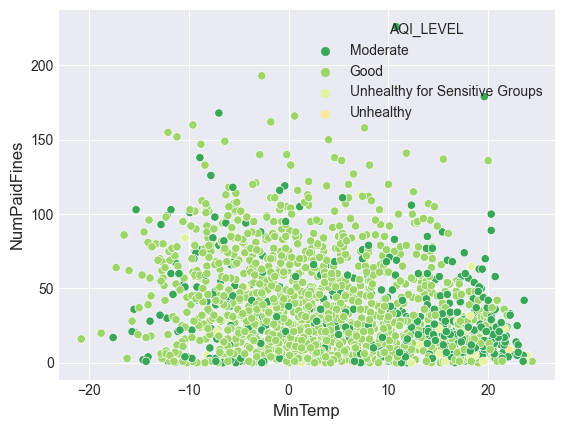

In [281]:
sns.scatterplot(x="MinTemp",
                y="NumPaidFines",
                data=citations_cleaned_compact,
                hue="AQI_LEVEL")

plt.show()

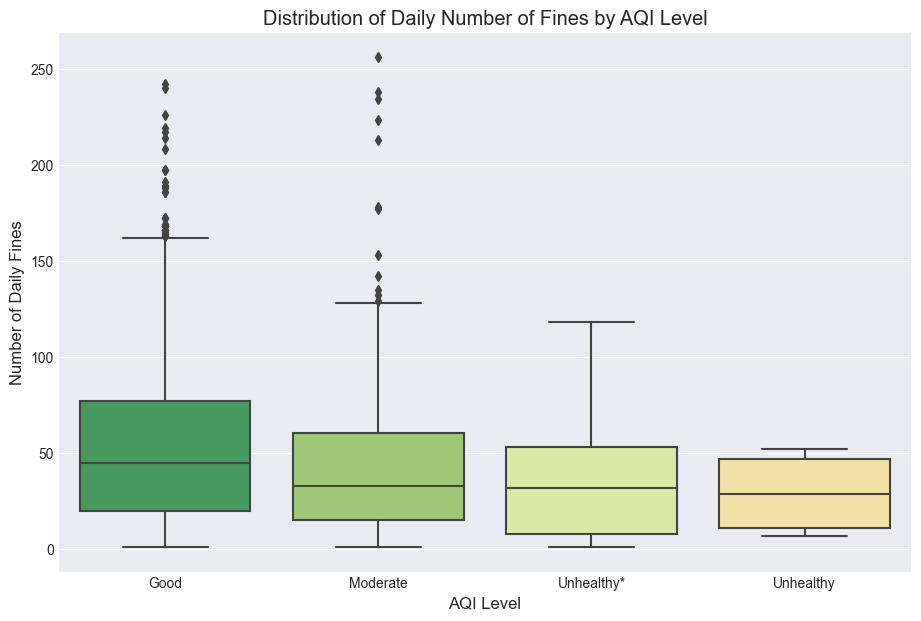

In [302]:
plt.figure(figsize=(11, 7))

aqi_levels = ["Good", "Moderate", "Unhealthy for Sensitive Groups", "Unhealthy"]

sns.boxplot(x='AQI_LEVEL', y='DailyNumFines', data=citations_cleaned_compact, order=aqi_levels)

plt.title("Distribution of Daily Number of Fines by AQI Level")

plt.xlabel("AQI Level")
plt.ylabel("Number of Daily Fines")

aqi_levels[2] = "Unhealthy*"
plt.xticks(ticks=range(len(aqi_levels)), labels=aqi_levels, rotation=0)

plt.show()

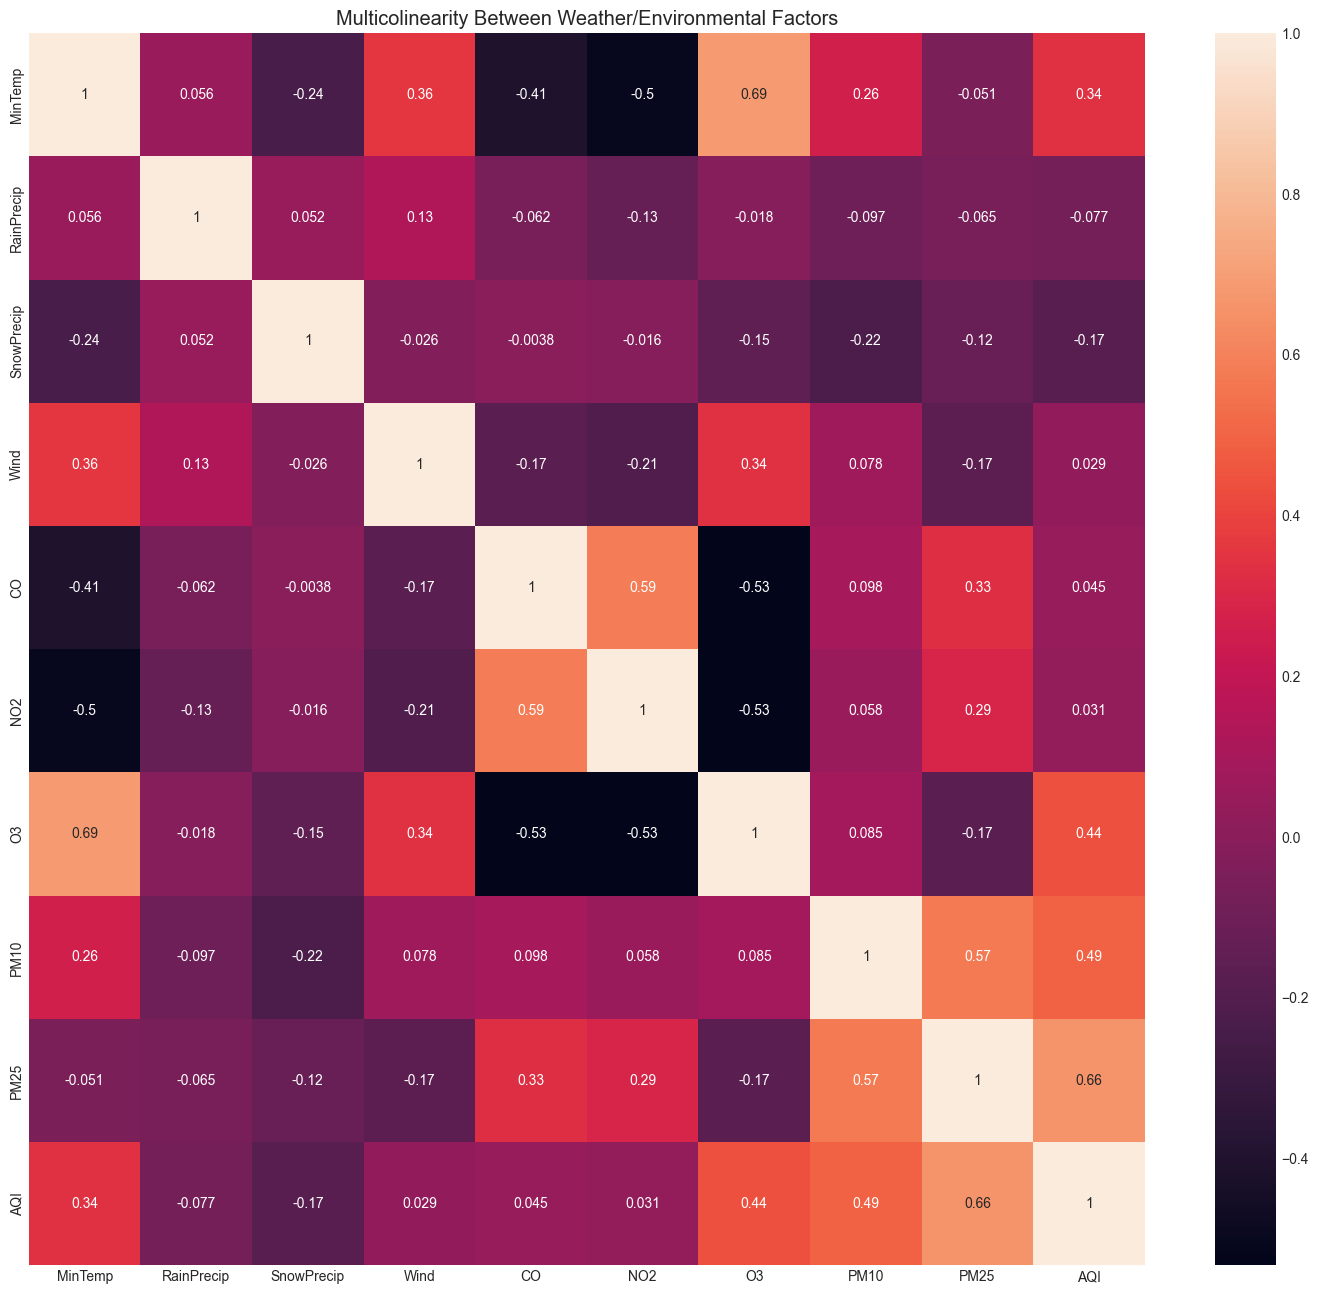

In [306]:
plt.figure(figsize=(18, 16))

sns.heatmap(citations_cleaned_compact[["MinTemp", "RainPrecip", "SnowPrecip", "Wind",
                                       "CO", "NO2", "O3", "PM10", "PM25", "AQI"]].corr(), annot=True)

plt.title("Multicolinearity Between Weather/Environmental Factors")

plt.show()

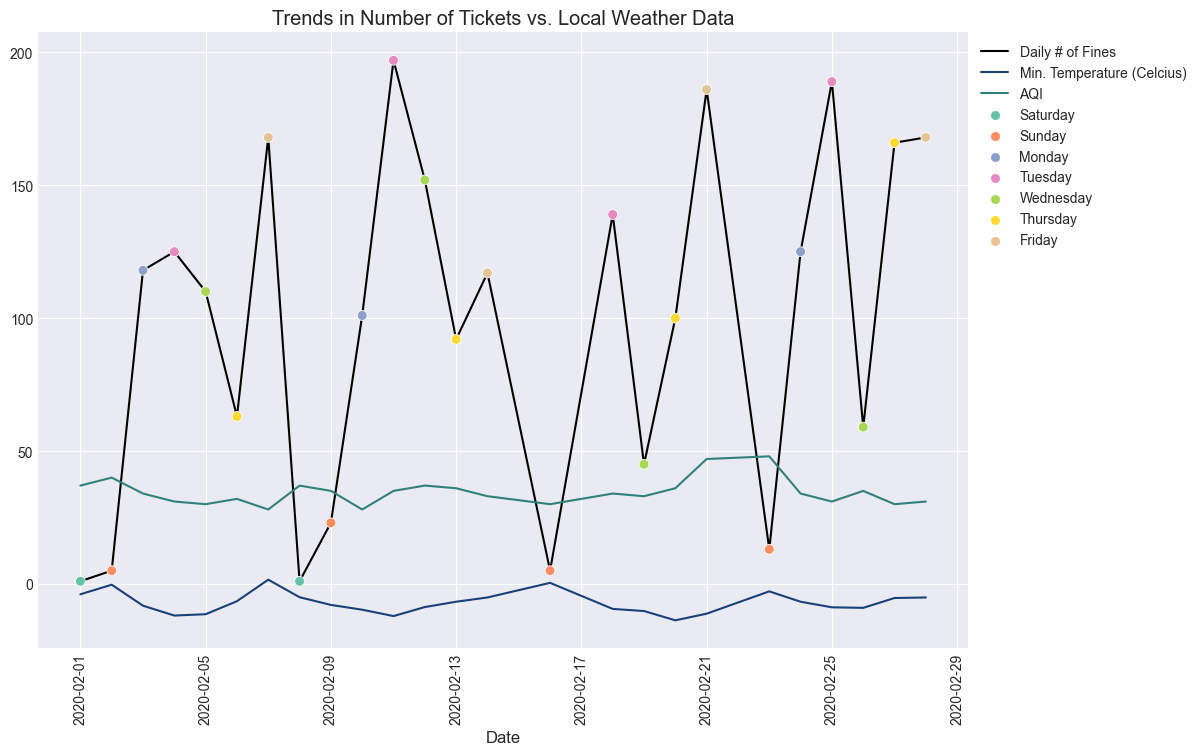

In [375]:
c = citations_cleaned_compact.sample(n=1)
group = citations_cleaned_compact[(citations_cleaned_compact["Month"] == c["Month"].values[0]) & (citations_cleaned_compact["Year"] == c["Year"].values[0])]

sns.set_palette(palette='gist_earth')

plt.figure(figsize=(12, 8))

plt.plot(group["IssuedDate"], group["DailyNumFines"], color="black", label="Daily # of Fines")
plt.plot(group["IssuedDate"], group["MinTemp"], label="Min. Temperature (Celcius)")
plt.plot(group["IssuedDate"], group["AQI"], label="AQI")

sns.set_palette(palette='Set2')
sns.scatterplot(x="IssuedDate", y="DailyNumFines", hue="Day", data=group, s=50, zorder=5)
# sns.scatterplot(x="IssuedDate", y="MinTemp", hue="Day", data=group, s=50, zorder=5, legend=False)
# sns.scatterplot(x="IssuedDate", y="AQI", hue="Day", data=group, s=50, zorder=5, legend=False)

plt.ylabel("")
plt.xlabel("Date")
plt.title("Trends in Number of Tickets vs. Local Weather Data")

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.xticks(rotation=90)

plt.show()

In [481]:
env.rename(columns = {
    "temperature_2m_max": "MaxTemp",
    "temperature_2m_min": "MinTemp",
    "temperature_2m_mean": "MeanTemp",
    "rain_sum": "RainPrecip",
    "snowfall_sum": "SnowPrecip",
    "wind_speed_10m_max": "Wind"
}, inplace=True)

env = env[["DATE", "Month", "Day", "NA_Correction",
     "MaxTemp", "MinTemp", "MeanTemp", "RainPrecip", "SnowPrecip", "Wind"] + 
          metrics + [metric + "_LEVEL" for metric in metrics] + ["AQI"]].copy()

env

DATE  Month        Day  NA_Correction  MaxTemp  MinTemp  MeanTemp  \
0    2014-01-06      1     Monday          False     -3.3    -17.6     -10.5   
1    2014-01-07      1    Tuesday          False      1.1    -11.6      -4.7   
2    2014-01-08      1  Wednesday          False      0.9     -2.6      -0.5   
3    2014-01-09      1   Thursday          False      0.1    -10.3      -4.4   
4    2014-01-10      1     Friday          False      3.1     -4.1      -0.5   
...         ...    ...        ...            ...      ...      ...       ...   
3277 2022-12-27     12    Tuesday          False      7.2      3.4       4.9   
3278 2022-12-28     12  Wednesday          False      4.6     -4.0       0.6   
3279 2022-12-29     12   Thursday          False      1.5     -5.9      -2.5   
3280 2022-12-30     12     Friday          False      3.0     -3.7       0.6   
3281 2022-12-31     12   Saturday           True      5.8      2.9       3.9   

      RainPrecip  SnowPrecip  Wind   CO   NO2       O3  PM10  PM25 CO_LEVEL  \
0            0.0        0.00   6.8  1.8  47.0  0.02200  47.0  13.7     Good   
1            0.0        0.21   5.9  1.9  47.0  0.00700  66.0  21.0     Good   
2            0.0        2.66   7.9  0.8  48.0  0.00300  53.0  33.9     Good   
3            0.0        3.92   8.9  0.7  42.0  0.02100  46.0  18.0     Good   
4            0.0        0.91   7.0  1.0  46.0  0.02100  38.0   7.9     Good   
...          ...         ...   ...  ...   ...      ...   ...   ...      ...   
3277         6.6        4.27  13.2  0.6  29.8  0.03300   3.0   2.1     Good   
3278         0.0        3.50   9.3  0.3  26.1  0.02900   3.0   1.1     Good   
3279         0.0        0.49   5.8  0.3  26.9  0.03200   6.0   1.9     Good   
3280         0.0        7.56   6.1  0.4  14.2  0.03800   2.0   1.3     Good   
3281        10.0       10.99   5.9  0.4  17.0  0.02458   3.0   2.1     Good   

     NO2_LEVEL O3_LEVEL PM10_LEVEL PM25_LEVEL  AQI  
0         Good     Good       Good   Moderate   54  
1         Good     Good   Moderate   Moderate   70  
2         Good     Good       Good   Moderate   97  
3         Good     Good       Good   Moderate   63  
4         Good     Good       Good       Good   43  
...        ...      ...        ...        ...  ...  
3277      Good     Good       Good       Good   31  
3278      Good     Good       Good       Good   27  
3279      Good     Good       Good       Good   30  
3280      Good     Good       Good       Good   35  
3281      Good     Good       Good       Good   22  

[3282 rows x 21 columns]

In [483]:
env.to_csv("environment.csv", index=False)

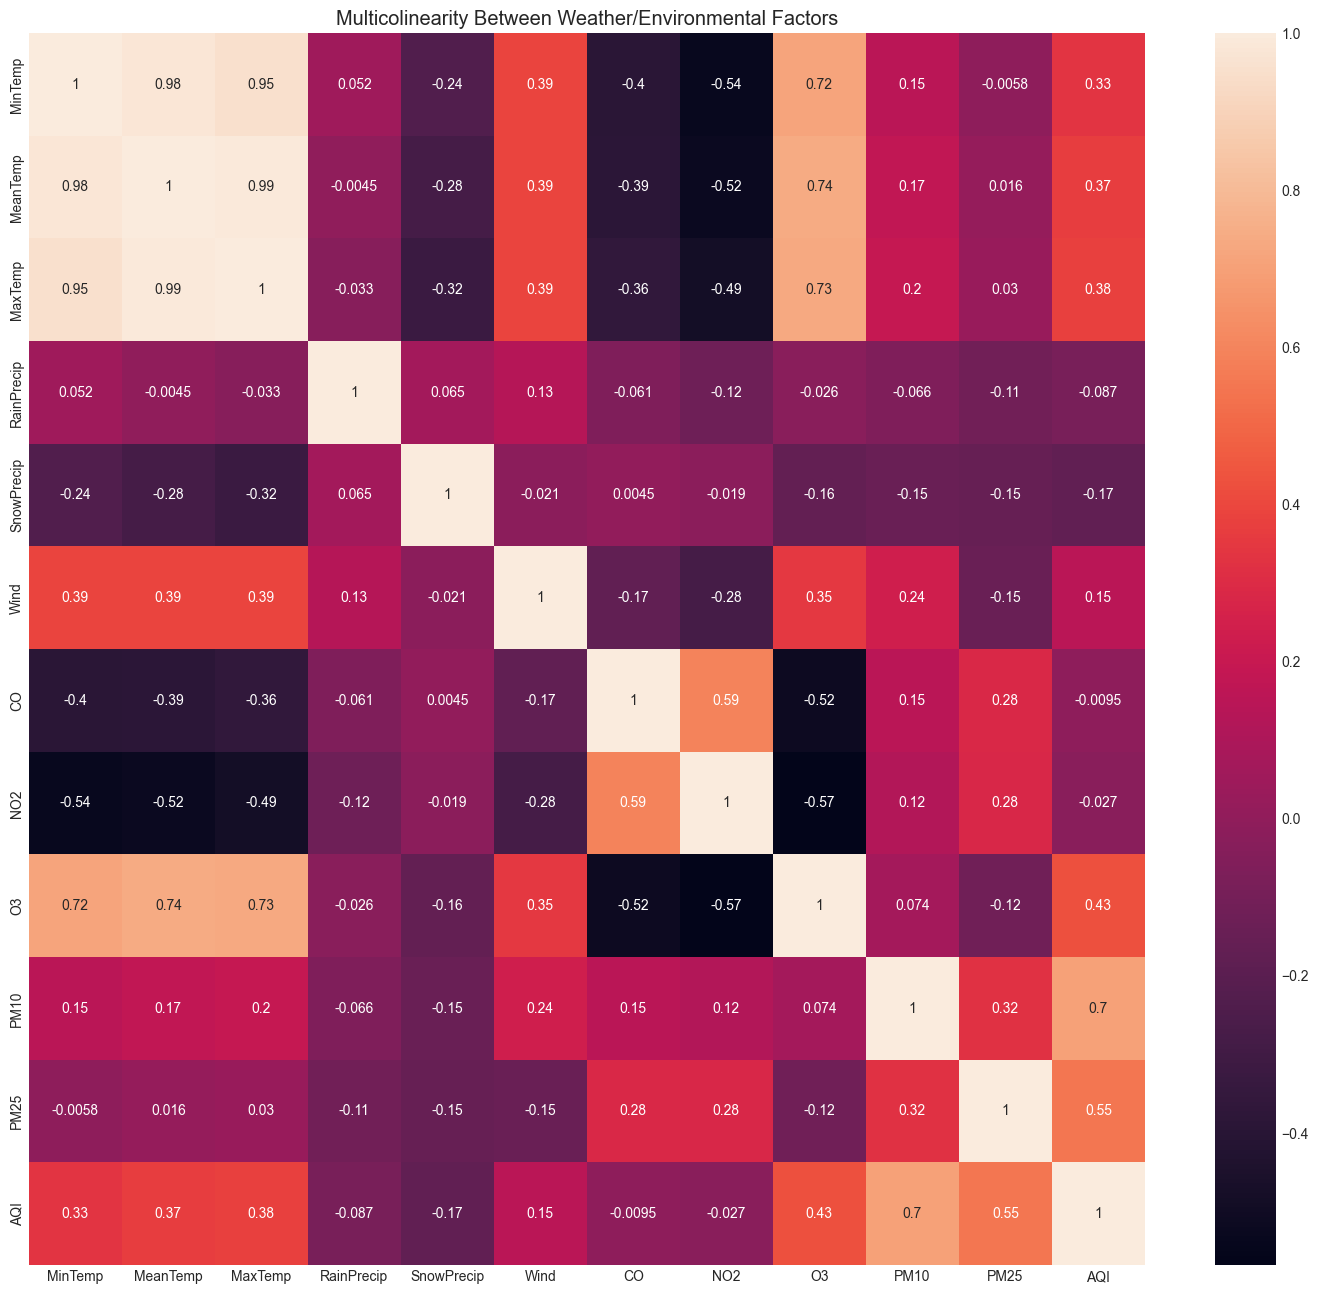

In [485]:
plt.figure(figsize=(18, 16))

sns.heatmap(env[["MinTemp", "MeanTemp", "MaxTemp", "RainPrecip", "SnowPrecip", "Wind",
                                       "CO", "NO2", "O3", "PM10", "PM25", "AQI"]].corr(), annot=True)

plt.title("Multicolinearity Between Weather/Environmental Factors")

plt.show()

In [497]:
env['AQI_LEVEL'] = env.apply(get_level, metric="AQI", axis=1)
env.to_csv("environment.csv", index="False")
env

DATE  Month        Day  NA_Correction  MaxTemp  MinTemp  MeanTemp  \
0    2014-01-06      1     Monday          False     -3.3    -17.6     -10.5   
1    2014-01-07      1    Tuesday          False      1.1    -11.6      -4.7   
2    2014-01-08      1  Wednesday          False      0.9     -2.6      -0.5   
3    2014-01-09      1   Thursday          False      0.1    -10.3      -4.4   
4    2014-01-10      1     Friday          False      3.1     -4.1      -0.5   
...         ...    ...        ...            ...      ...      ...       ...   
3277 2022-12-27     12    Tuesday          False      7.2      3.4       4.9   
3278 2022-12-28     12  Wednesday          False      4.6     -4.0       0.6   
3279 2022-12-29     12   Thursday          False      1.5     -5.9      -2.5   
3280 2022-12-30     12     Friday          False      3.0     -3.7       0.6   
3281 2022-12-31     12   Saturday           True      5.8      2.9       3.9   

      RainPrecip  SnowPrecip  Wind   CO   NO2       O3  PM10  PM25 CO_LEVEL  \
0            0.0        0.00   6.8  1.8  47.0  0.02200  47.0  13.7     Good   
1            0.0        0.21   5.9  1.9  47.0  0.00700  66.0  21.0     Good   
2            0.0        2.66   7.9  0.8  48.0  0.00300  53.0  33.9     Good   
3            0.0        3.92   8.9  0.7  42.0  0.02100  46.0  18.0     Good   
4            0.0        0.91   7.0  1.0  46.0  0.02100  38.0   7.9     Good   
...          ...         ...   ...  ...   ...      ...   ...   ...      ...   
3277         6.6        4.27  13.2  0.6  29.8  0.03300   3.0   2.1     Good   
3278         0.0        3.50   9.3  0.3  26.1  0.02900   3.0   1.1     Good   
3279         0.0        0.49   5.8  0.3  26.9  0.03200   6.0   1.9     Good   
3280         0.0        7.56   6.1  0.4  14.2  0.03800   2.0   1.3     Good   
3281        10.0       10.99   5.9  0.4  17.0  0.02458   3.0   2.1     Good   

     NO2_LEVEL O3_LEVEL PM10_LEVEL PM25_LEVEL  AQI AQI_LEVEL  
0         Good     Good       Good   Moderate   54  Moderate  
1         Good     Good   Moderate   Moderate   70  Moderate  
2         Good     Good       Good   Moderate   97  Moderate  
3         Good     Good       Good   Moderate   63  Moderate  
4         Good     Good       Good       Good   43      Good  
...        ...      ...        ...        ...  ...       ...  
3277      Good     Good       Good       Good   31      Good  
3278      Good     Good       Good       Good   27      Good  
3279      Good     Good       Good       Good   30      Good  
3280      Good     Good       Good       Good   35      Good  
3281      Good     Good       Good       Good   22      Good  

[3282 rows x 22 columns]

In [517]:
Provo = pd.merge(
    env,
    citations_cleaned_compact[["IssuedDate","Year", "DailyNumFines", "NumPaidFines", "TotalFineAmount", "AvgPaidFine"]],
    left_on = "DATE", right_on = "IssuedDate",
    how="left")

Provo

DATE  Month        Day  NA_Correction  MaxTemp  MinTemp  MeanTemp  \
0    2014-01-06      1     Monday          False     -3.3    -17.6     -10.5   
1    2014-01-07      1    Tuesday          False      1.1    -11.6      -4.7   
2    2014-01-08      1  Wednesday          False      0.9     -2.6      -0.5   
3    2014-01-09      1   Thursday          False      0.1    -10.3      -4.4   
4    2014-01-10      1     Friday          False      3.1     -4.1      -0.5   
...         ...    ...        ...            ...      ...      ...       ...   
3277 2022-12-27     12    Tuesday          False      7.2      3.4       4.9   
3278 2022-12-28     12  Wednesday          False      4.6     -4.0       0.6   
3279 2022-12-29     12   Thursday          False      1.5     -5.9      -2.5   
3280 2022-12-30     12     Friday          False      3.0     -3.7       0.6   
3281 2022-12-31     12   Saturday           True      5.8      2.9       3.9   

      RainPrecip  SnowPrecip  Wind   CO   NO2       O3  PM10  PM25 CO_LEVEL  \
0            0.0        0.00   6.8  1.8  47.0  0.02200  47.0  13.7     Good   
1            0.0        0.21   5.9  1.9  47.0  0.00700  66.0  21.0     Good   
2            0.0        2.66   7.9  0.8  48.0  0.00300  53.0  33.9     Good   
3            0.0        3.92   8.9  0.7  42.0  0.02100  46.0  18.0     Good   
4            0.0        0.91   7.0  1.0  46.0  0.02100  38.0   7.9     Good   
...          ...         ...   ...  ...   ...      ...   ...   ...      ...   
3277         6.6        4.27  13.2  0.6  29.8  0.03300   3.0   2.1     Good   
3278         0.0        3.50   9.3  0.3  26.1  0.02900   3.0   1.1     Good   
3279         0.0        0.49   5.8  0.3  26.9  0.03200   6.0   1.9     Good   
3280         0.0        7.56   6.1  0.4  14.2  0.03800   2.0   1.3     Good   
3281        10.0       10.99   5.9  0.4  17.0  0.02458   3.0   2.1     Good   

     NO2_LEVEL O3_LEVEL PM10_LEVEL PM25_LEVEL  AQI AQI_LEVEL IssuedDate  \
0         Good     Good       Good   Moderate   54  Moderate 2014-01-06   
1         Good     Good   Moderate   Moderate   70  Moderate 2014-01-07   
2         Good     Good       Good   Moderate   97  Moderate 2014-01-08   
3         Good     Good       Good   Moderate   63  Moderate 2014-01-09   
4         Good     Good       Good       Good   43      Good 2014-01-10   
...        ...      ...        ...        ...  ...       ...        ...   
3277      Good     Good       Good       Good   31      Good        NaT   
3278      Good     Good       Good       Good   27      Good 2022-12-28   
3279      Good     Good       Good       Good   30      Good 2022-12-29   
3280      Good     Good       Good       Good   35      Good        NaT   
3281      Good     Good       Good       Good   22      Good        NaT   

        Year  DailyNumFines  NumPaidFines  TotalFineAmount  AvgPaidFine  
0     2014.0           23.0          17.0            386.0    22.705882  
1     2014.0           52.0          46.0           1238.0    26.913043  
2     2014.0           13.0           8.0            216.0    27.000000  
3     2014.0            3.0           3.0            350.0   116.666667  
4     2014.0           16.0          11.0            221.0    20.090909  
...      ...            ...           ...              ...          ...  
3277     NaN            NaN           NaN              NaN          NaN  
3278  2022.0            1.0           1.0             35.0    35.000000  
3279  2022.0           10.0           7.0            220.0    31.428571  
3280     NaN            NaN           NaN              NaN          NaN  
3281     NaN            NaN           NaN              NaN          NaN  

[3282 rows x 28 columns]

In [518]:
Provo.drop(columns=["IssuedDate"], inplace=True)

In [519]:
Provo = Provo.fillna(0)
Provo

DATE  Month        Day  NA_Correction  MaxTemp  MinTemp  MeanTemp  \
0    2014-01-06      1     Monday          False     -3.3    -17.6     -10.5   
1    2014-01-07      1    Tuesday          False      1.1    -11.6      -4.7   
2    2014-01-08      1  Wednesday          False      0.9     -2.6      -0.5   
3    2014-01-09      1   Thursday          False      0.1    -10.3      -4.4   
4    2014-01-10      1     Friday          False      3.1     -4.1      -0.5   
...         ...    ...        ...            ...      ...      ...       ...   
3277 2022-12-27     12    Tuesday          False      7.2      3.4       4.9   
3278 2022-12-28     12  Wednesday          False      4.6     -4.0       0.6   
3279 2022-12-29     12   Thursday          False      1.5     -5.9      -2.5   
3280 2022-12-30     12     Friday          False      3.0     -3.7       0.6   
3281 2022-12-31     12   Saturday           True      5.8      2.9       3.9   

      RainPrecip  SnowPrecip  Wind   CO   NO2       O3  PM10  PM25 CO_LEVEL  \
0            0.0        0.00   6.8  1.8  47.0  0.02200  47.0  13.7     Good   
1            0.0        0.21   5.9  1.9  47.0  0.00700  66.0  21.0     Good   
2            0.0        2.66   7.9  0.8  48.0  0.00300  53.0  33.9     Good   
3            0.0        3.92   8.9  0.7  42.0  0.02100  46.0  18.0     Good   
4            0.0        0.91   7.0  1.0  46.0  0.02100  38.0   7.9     Good   
...          ...         ...   ...  ...   ...      ...   ...   ...      ...   
3277         6.6        4.27  13.2  0.6  29.8  0.03300   3.0   2.1     Good   
3278         0.0        3.50   9.3  0.3  26.1  0.02900   3.0   1.1     Good   
3279         0.0        0.49   5.8  0.3  26.9  0.03200   6.0   1.9     Good   
3280         0.0        7.56   6.1  0.4  14.2  0.03800   2.0   1.3     Good   
3281        10.0       10.99   5.9  0.4  17.0  0.02458   3.0   2.1     Good   

     NO2_LEVEL O3_LEVEL PM10_LEVEL PM25_LEVEL  AQI AQI_LEVEL    Year  \
0         Good     Good       Good   Moderate   54  Moderate  2014.0   
1         Good     Good   Moderate   Moderate   70  Moderate  2014.0   
2         Good     Good       Good   Moderate   97  Moderate  2014.0   
3         Good     Good       Good   Moderate   63  Moderate  2014.0   
4         Good     Good       Good       Good   43      Good  2014.0   
...        ...      ...        ...        ...  ...       ...     ...   
3277      Good     Good       Good       Good   31      Good     0.0   
3278      Good     Good       Good       Good   27      Good  2022.0   
3279      Good     Good       Good       Good   30      Good  2022.0   
3280      Good     Good       Good       Good   35      Good     0.0   
3281      Good     Good       Good       Good   22      Good     0.0   

      DailyNumFines  NumPaidFines  TotalFineAmount  AvgPaidFine  
0              23.0          17.0            386.0    22.705882  
1              52.0          46.0           1238.0    26.913043  
2              13.0           8.0            216.0    27.000000  
3               3.0           3.0            350.0   116.666667  
4              16.0          11.0            221.0    20.090909  
...             ...           ...              ...          ...  
3277            0.0           0.0              0.0     0.000000  
3278            1.0           1.0             35.0    35.000000  
3279           10.0           7.0            220.0    31.428571  
3280            0.0           0.0              0.0     0.000000  
3281            0.0           0.0              0.0     0.000000  

[3282 rows x 27 columns]

In [520]:
Provo.to_csv("Provo.csv", index=False)
Provo

DATE  Month        Day  NA_Correction  MaxTemp  MinTemp  MeanTemp  \
0    2014-01-06      1     Monday          False     -3.3    -17.6     -10.5   
1    2014-01-07      1    Tuesday          False      1.1    -11.6      -4.7   
2    2014-01-08      1  Wednesday          False      0.9     -2.6      -0.5   
3    2014-01-09      1   Thursday          False      0.1    -10.3      -4.4   
4    2014-01-10      1     Friday          False      3.1     -4.1      -0.5   
...         ...    ...        ...            ...      ...      ...       ...   
3277 2022-12-27     12    Tuesday          False      7.2      3.4       4.9   
3278 2022-12-28     12  Wednesday          False      4.6     -4.0       0.6   
3279 2022-12-29     12   Thursday          False      1.5     -5.9      -2.5   
3280 2022-12-30     12     Friday          False      3.0     -3.7       0.6   
3281 2022-12-31     12   Saturday           True      5.8      2.9       3.9   

      RainPrecip  SnowPrecip  Wind   CO   NO2       O3  PM10  PM25 CO_LEVEL  \
0            0.0        0.00   6.8  1.8  47.0  0.02200  47.0  13.7     Good   
1            0.0        0.21   5.9  1.9  47.0  0.00700  66.0  21.0     Good   
2            0.0        2.66   7.9  0.8  48.0  0.00300  53.0  33.9     Good   
3            0.0        3.92   8.9  0.7  42.0  0.02100  46.0  18.0     Good   
4            0.0        0.91   7.0  1.0  46.0  0.02100  38.0   7.9     Good   
...          ...         ...   ...  ...   ...      ...   ...   ...      ...   
3277         6.6        4.27  13.2  0.6  29.8  0.03300   3.0   2.1     Good   
3278         0.0        3.50   9.3  0.3  26.1  0.02900   3.0   1.1     Good   
3279         0.0        0.49   5.8  0.3  26.9  0.03200   6.0   1.9     Good   
3280         0.0        7.56   6.1  0.4  14.2  0.03800   2.0   1.3     Good   
3281        10.0       10.99   5.9  0.4  17.0  0.02458   3.0   2.1     Good   

     NO2_LEVEL O3_LEVEL PM10_LEVEL PM25_LEVEL  AQI AQI_LEVEL    Year  \
0         Good     Good       Good   Moderate   54  Moderate  2014.0   
1         Good     Good   Moderate   Moderate   70  Moderate  2014.0   
2         Good     Good       Good   Moderate   97  Moderate  2014.0   
3         Good     Good       Good   Moderate   63  Moderate  2014.0   
4         Good     Good       Good       Good   43      Good  2014.0   
...        ...      ...        ...        ...  ...       ...     ...   
3277      Good     Good       Good       Good   31      Good     0.0   
3278      Good     Good       Good       Good   27      Good  2022.0   
3279      Good     Good       Good       Good   30      Good  2022.0   
3280      Good     Good       Good       Good   35      Good     0.0   
3281      Good     Good       Good       Good   22      Good     0.0   

      DailyNumFines  NumPaidFines  TotalFineAmount  AvgPaidFine  
0              23.0          17.0            386.0    22.705882  
1              52.0          46.0           1238.0    26.913043  
2              13.0           8.0            216.0    27.000000  
3               3.0           3.0            350.0   116.666667  
4              16.0          11.0            221.0    20.090909  
...             ...           ...              ...          ...  
3277            0.0           0.0              0.0     0.000000  
3278            1.0           1.0             35.0    35.000000  
3279           10.0           7.0            220.0    31.428571  
3280            0.0           0.0              0.0     0.000000  
3281            0.0           0.0              0.0     0.000000  

[3282 rows x 27 columns]

In [521]:
Provo = pd.concat([Provo, pd.get_dummies(Provo['Day'], prefix='Day')], axis=1)

Provo = Provo.rename(columns={
    "Day_Monday": "Mon",
    "Day_Tuesday": "Tues",
    "Day_Wednesday": "Wed",
    "Day_Thursday": "Thurs",
    "Day_Friday": "Fri",
    "Day_Saturday": "Sat",
    "Day_Sunday": "Sun"
})

Provo

DATE  Month        Day  NA_Correction  MaxTemp  MinTemp  MeanTemp  \
0    2014-01-06      1     Monday          False     -3.3    -17.6     -10.5   
1    2014-01-07      1    Tuesday          False      1.1    -11.6      -4.7   
2    2014-01-08      1  Wednesday          False      0.9     -2.6      -0.5   
3    2014-01-09      1   Thursday          False      0.1    -10.3      -4.4   
4    2014-01-10      1     Friday          False      3.1     -4.1      -0.5   
...         ...    ...        ...            ...      ...      ...       ...   
3277 2022-12-27     12    Tuesday          False      7.2      3.4       4.9   
3278 2022-12-28     12  Wednesday          False      4.6     -4.0       0.6   
3279 2022-12-29     12   Thursday          False      1.5     -5.9      -2.5   
3280 2022-12-30     12     Friday          False      3.0     -3.7       0.6   
3281 2022-12-31     12   Saturday           True      5.8      2.9       3.9   

      RainPrecip  SnowPrecip  Wind   CO   NO2       O3  PM10  PM25 CO_LEVEL  \
0            0.0        0.00   6.8  1.8  47.0  0.02200  47.0  13.7     Good   
1            0.0        0.21   5.9  1.9  47.0  0.00700  66.0  21.0     Good   
2            0.0        2.66   7.9  0.8  48.0  0.00300  53.0  33.9     Good   
3            0.0        3.92   8.9  0.7  42.0  0.02100  46.0  18.0     Good   
4            0.0        0.91   7.0  1.0  46.0  0.02100  38.0   7.9     Good   
...          ...         ...   ...  ...   ...      ...   ...   ...      ...   
3277         6.6        4.27  13.2  0.6  29.8  0.03300   3.0   2.1     Good   
3278         0.0        3.50   9.3  0.3  26.1  0.02900   3.0   1.1     Good   
3279         0.0        0.49   5.8  0.3  26.9  0.03200   6.0   1.9     Good   
3280         0.0        7.56   6.1  0.4  14.2  0.03800   2.0   1.3     Good   
3281        10.0       10.99   5.9  0.4  17.0  0.02458   3.0   2.1     Good   

     NO2_LEVEL O3_LEVEL PM10_LEVEL PM25_LEVEL  AQI AQI_LEVEL    Year  \
0         Good     Good       Good   Moderate   54  Moderate  2014.0   
1         Good     Good   Moderate   Moderate   70  Moderate  2014.0   
2         Good     Good       Good   Moderate   97  Moderate  2014.0   
3         Good     Good       Good   Moderate   63  Moderate  2014.0   
4         Good     Good       Good       Good   43      Good  2014.0   
...        ...      ...        ...        ...  ...       ...     ...   
3277      Good     Good       Good       Good   31      Good     0.0   
3278      Good     Good       Good       Good   27      Good  2022.0   
3279      Good     Good       Good       Good   30      Good  2022.0   
3280      Good     Good       Good       Good   35      Good     0.0   
3281      Good     Good       Good       Good   22      Good     0.0   

      DailyNumFines  NumPaidFines  TotalFineAmount  AvgPaidFine  Fri  Mon  \
0              23.0          17.0            386.0    22.705882    0    1   
1              52.0          46.0           1238.0    26.913043    0    0   
2              13.0           8.0            216.0    27.000000    0    0   
3               3.0           3.0            350.0   116.666667    0    0   
4              16.0          11.0            221.0    20.090909    1    0   
...             ...           ...              ...          ...  ...  ...   
3277            0.0           0.0              0.0     0.000000    0    0   
3278            1.0           1.0             35.0    35.000000    0    0   
3279           10.0           7.0            220.0    31.428571    0    0   
3280            0.0           0.0              0.0     0.000000    1    0   
3281            0.0           0.0              0.0     0.000000    0    0   

      Sat  Sun  Thurs  Tues  Wed  
0       0    0      0     0    0  
1       0    0      0     1    0  
2       0    0      0     0    1  
3       0    0      1     0    0  
4       0    0      0     0    0  
...   ...  ...    ...   ...  ...  
3277    0    0      0     1    0  
3278    0    0      0     0    

In [610]:
enrollment = pd.read_csv("enrollment.csv")
enrollment[["ClassBegins", "LastDay", "ExamsStart", "ExamsEnd"]] = enrollment[["ClassBegins", "LastDay", "ExamsStart", "ExamsEnd"]].apply(pd.to_datetime)
enrollment

Year    Term  Enrollment  FullTime ClassBegins    LastDay ExamsStart  \
0   2014  Winter       29642     25191  2014-01-06 2014-04-15 2014-04-16   
1   2014  Spring        9582      4584  2014-04-29 2014-06-16 2014-06-17   
2   2014  Summer        6384      5728  2014-06-23 2014-08-11 2014-08-12   
3   2014    Fall       29955     26216  2014-09-02 2014-12-11 2014-12-12   
4   2015  Winter       30775     26080  2015-01-05 2015-04-14 2015-04-15   
5   2015  Spring       10929      5199  2015-04-28 2015-06-15 2015-06-16   
6   2015  Summer        7161      6399  2015-06-22 2015-08-10 2015-08-11   
7   2015    Fall       33013     29102  2015-08-31 2015-12-10 2015-12-11   
8   2016  Winter       32989     28001  2016-01-04 2016-04-12 2016-04-13   
9   2016  Spring       10943      4951  2016-04-26 2016-06-13 2016-06-14   
10  2016  Summer        6860      6158  2016-06-20 2016-08-08 2016-08-09   
11  2016    Fall       33773      2970  2016-08-29 2016-12-08 2016-12-09   
12  2017  Winter       33275     28398  2017-01-07 2017-04-18 2017-04-19   
13  2017  Spring       10530      4403  2017-05-02 2017-06-19 2017-06-20   
14  2017  Summer        6843      6109  2017-06-26 2017-08-14 2017-08-15   
15  2017    Fall       33914     29735  2017-09-05 2017-12-14 2017-12-15   
16  2018  Winter        3347     28125  2018-01-08 2018-04-18 2018-04-19   
17  2018  Spring       10426      4668  2018-05-01 2018-06-18 2018-06-19   
18  2018  Summer        6493      5819  2018-06-25 2018-08-13 2018-08-14   
19  2018    Fall       34009     29858  2018-09-04 2018-12-13 2018-12-14   
20  2019  Winter       32965     27979  2019-01-05 2019-04-17 2019-04-18   
21  2019  Spring       10228      4615  2019-04-30 2019-06-17 2019-06-18   
22  2019  Summer        6250      5641  2019-06-24 2019-08-12 2019-08-13   
23  2019    Fall       33883     29815  2019-09-03 2019-12-12 2019-12-13   
24  2020  Winter       33101     28191  2020-01-04 2020-04-15 2020-04-16   
25  2020  Spring       13067      6404  2020-04-27 2020-06-15 2020-06-16   
26  2020  Summer        7277      6704  2020-06-19 2020-08-10 2020-08-11   
27  2020    Fall       36324     31909  2020-09-08 2020-12-10 2020-12-11   
28  2021  Winter       35135     29755  2021-01-02 2021-04-14 2021-04-15   
29  2021  Spring       13330      6551  2021-04-26 2021-06-14 2021-06-15   
30  2021  Summer        6820      6253  2021-06-18 2021-08-09 2021-08-10   
31  2021    Fall       34737     30282  2021-08-30 2021-12-09 2021-12-10   
32  2022  Winter       33810     28618  2022-01-03 2022-04-13 2022-04-14   
33  2022  Spring       10235      4239  2022-04-25 2022-06-13 2022-06-14   
34  2022  Summer        6628      6088  2022-06-20 2022-08-09 2022-08-10   
35  2022    Fall       34390     30123  2022-08-29 2022-12-08 2022-12-09   

     ExamsEnd                          Holidays  
0  2014-04-23             2014-01-20+2014-02-17  
1  2014-06-19                        2014-05-26  
2  2014-08-14             2014-07-04+2014-07-24  
3  2014-12-19             2014-11-26/2014-11-28  
4  2014-04-22             2015-01-19+2015-02-16  
5  2015-06-18                        2015-05-25  
6  2015-08-13             2015-07-04+2015-07-24  
7  2015-12-18  2015-09-07+2015-11-24/2015-11-27  
8  2016-04-20             2016-01-18+2016-02-15  
9  2016-06-16                        2016-05-30  
10 2016-08-11             2016-07-04+2016-07-24  
11 2016-12-16  2016-09-05+2016-11-23/2016-11-25  
12 2017-04-26             2017-01-16+2017-02-20  
13 2017-04-22                        2017-05-29  
14 2017-08-17             2017-07-04+2017-07-24  
15 2017-12-21  2017-09-05+2017-11-24/2017-11-26  
16 2018-04-25             2018-01-16+2018-02-20  
17 2018-06-21                        2018-05-29  
18 2018-08-16             2018-07-04+2018-07-24  
19 2018-12-20             2018-11-21/2018-11-23  
20 2019-04-24             2019-01-21+2019-02-18  
21 2019-06-20                        2019-05-27  
22 2019-08-15             2019-07-04+2019

In [678]:
def match_terms(df):
    terms = {"DATE": [], "Term": [], "Holiday": [], "Exam": []}
    for i, row in df.iterrows():
        calendar = enrollment[enrollment["Year"] == pd.to_datetime(row["DATE"]).year]
        terms["DATE"].append(row["DATE"].strftime('%Y-%m-%d'))
        date_is_holiday = False
        term_exists = False
        for j, term in calendar.iterrows():

            if row["DATE"] >= term["ExamsStart"] and row["DATE"] <= term["ExamsEnd"]:
                terms["Term"].append(term["Term"])
                term_exists = True
                terms["Exam"].append(1)
            elif row["DATE"] >= term["ClassBegins"] and row["DATE"] <= term["LastDay"]:
                terms["Term"].append(term["Term"])
                term_exists = True
                terms["Exam"].append(0)

            holidays = term["Holidays"].split("+")
            for holiday in holidays:
                holiday_span = holiday.split("/")
                if len(holiday_span) > 1:
                    if row["DATE"] >= datetime.strptime(holiday_span[0], '%Y-%m-%d') and row["DATE"] <= datetime.strptime(holiday_span[1], '%Y-%m-%d'):
                        terms["Holiday"].append(1)
                        date_is_holiday = True
                        break
                elif row["DATE"] == holiday:
                        terms["Holiday"].append(1)
                        date_is_holiday = True
                        break

        if not term_exists:
            if not date_is_holiday:
                terms["Holiday"].append(1)
                date_is_holiday = True
            terms["Exam"].append(0)

            #If the date doesn't fall into the regular academic calendar of class start and stop dates,
            #Find the closest date and use that to match with the corresponding term the date is in
            diff = float('inf')
            t = None
            for date in pd.concat([calendar["ClassBegins"], calendar["LastDay"]]):
                delta = float(np.abs((row["DATE"]-date).total_seconds()))
                if delta < diff:
                    diff = delta
                    t = calendar[(calendar["ClassBegins"] == date) | (calendar["LastDay"] == date)]["Term"]

            terms["Term"].append(t.values[0])

        if not date_is_holiday:
            terms["Holiday"].append(0)
            
    return pd.DataFrame(terms)

provo_sample = Provo.sample(n=5)

match_terms(provo_sample)

DATE    Term  Holiday  Exam
0  2017-11-02    Fall        0     0
1  2019-02-18  Winter        0     0
2  2021-03-05  Winter        0     0
3  2017-07-21  Summer        0     0
4  2019-06-20  Spring        0     1

In [679]:
terms = match_terms(Provo)
terms

DATE    Term  Holiday  Exam
0     2014-01-06  Winter        0     0
1     2014-01-07  Winter        0     0
2     2014-01-08  Winter        0     0
3     2014-01-09  Winter        0     0
4     2014-01-10  Winter        0     0
...          ...     ...      ...   ...
3277  2022-12-27    Fall        1     0
3278  2022-12-28    Fall        1     0
3279  2022-12-29    Fall        1     0
3280  2022-12-30    Fall        1     0
3281  2022-12-31    Fall        1     0

[3282 rows x 4 columns]

In [682]:
terms["Year"] = pd.to_datetime(terms["DATE"]).dt.year
school = pd.merge(enrollment[["Year", "Term", "Enrollment", "FullTime"]], terms)
school

Year    Term  Enrollment  FullTime        DATE  Holiday  Exam
0     2014  Winter       29642     25191  2014-01-06        0     0
1     2014  Winter       29642     25191  2014-01-07        0     0
2     2014  Winter       29642     25191  2014-01-08        0     0
3     2014  Winter       29642     25191  2014-01-09        0     0
4     2014  Winter       29642     25191  2014-01-10        0     0
...    ...     ...         ...       ...         ...      ...   ...
3277  2022    Fall       34390     30123  2022-12-27        1     0
3278  2022    Fall       34390     30123  2022-12-28        1     0
3279  2022    Fall       34390     30123  2022-12-29        1     0
3280  2022    Fall       34390     30123  2022-12-30        1     0
3281  2022    Fall       34390     30123  2022-12-31        1     0

[3282 rows x 7 columns]

In [688]:
school["DATE"] = pd.to_datetime(school["DATE"])
Provo = pd.merge(Provo, school[["DATE", "Term", "Enrollment", "FullTime", "Holiday", "Exam"]], on="DATE", how="left").copy()
Provo

DATE  Month        Day  NA_Correction  MaxTemp  MinTemp  MeanTemp  \
0    2014-01-06      1     Monday          False     -3.3    -17.6     -10.5   
1    2014-01-07      1    Tuesday          False      1.1    -11.6      -4.7   
2    2014-01-08      1  Wednesday          False      0.9     -2.6      -0.5   
3    2014-01-09      1   Thursday          False      0.1    -10.3      -4.4   
4    2014-01-10      1     Friday          False      3.1     -4.1      -0.5   
...         ...    ...        ...            ...      ...      ...       ...   
3277 2022-12-27     12    Tuesday          False      7.2      3.4       4.9   
3278 2022-12-28     12  Wednesday          False      4.6     -4.0       0.6   
3279 2022-12-29     12   Thursday          False      1.5     -5.9      -2.5   
3280 2022-12-30     12     Friday          False      3.0     -3.7       0.6   
3281 2022-12-31     12   Saturday           True      5.8      2.9       3.9   

      RainPrecip  SnowPrecip  Wind   CO   NO2       O3  PM10  PM25 CO_LEVEL  \
0            0.0        0.00   6.8  1.8  47.0  0.02200  47.0  13.7     Good   
1            0.0        0.21   5.9  1.9  47.0  0.00700  66.0  21.0     Good   
2            0.0        2.66   7.9  0.8  48.0  0.00300  53.0  33.9     Good   
3            0.0        3.92   8.9  0.7  42.0  0.02100  46.0  18.0     Good   
4            0.0        0.91   7.0  1.0  46.0  0.02100  38.0   7.9     Good   
...          ...         ...   ...  ...   ...      ...   ...   ...      ...   
3277         6.6        4.27  13.2  0.6  29.8  0.03300   3.0   2.1     Good   
3278         0.0        3.50   9.3  0.3  26.1  0.02900   3.0   1.1     Good   
3279         0.0        0.49   5.8  0.3  26.9  0.03200   6.0   1.9     Good   
3280         0.0        7.56   6.1  0.4  14.2  0.03800   2.0   1.3     Good   
3281        10.0       10.99   5.9  0.4  17.0  0.02458   3.0   2.1     Good   

     NO2_LEVEL O3_LEVEL PM10_LEVEL PM25_LEVEL  AQI AQI_LEVEL    Year  \
0         Good     Good       Good   Moderate   54  Moderate  2014.0   
1         Good     Good   Moderate   Moderate   70  Moderate  2014.0   
2         Good     Good       Good   Moderate   97  Moderate  2014.0   
3         Good     Good       Good   Moderate   63  Moderate  2014.0   
4         Good     Good       Good       Good   43      Good  2014.0   
...        ...      ...        ...        ...  ...       ...     ...   
3277      Good     Good       Good       Good   31      Good     0.0   
3278      Good     Good       Good       Good   27      Good  2022.0   
3279      Good     Good       Good       Good   30      Good  2022.0   
3280      Good     Good       Good       Good   35      Good     0.0   
3281      Good     Good       Good       Good   22      Good     0.0   

      DailyNumFines  NumPaidFines  TotalFineAmount  AvgPaidFine  Fri  Mon  \
0              23.0          17.0            386.0    22.705882    0    1   
1              52.0          46.0           1238.0    26.913043    0    0   
2              13.0           8.0            216.0    27.000000    0    0   
3               3.0           3.0            350.0   116.666667    0    0   
4              16.0          11.0            221.0    20.090909    1    0   
...             ...           ...              ...          ...  ...  ...   
3277            0.0           0.0              0.0     0.000000    0    0   
3278            1.0           1.0             35.0    35.000000    0    0   
3279           10.0           7.0            220.0    31.428571    0    0   
3280            0.0           0.0              0.0     0.000000    1    0   
3281            0.0           0.0              0.0     0.000000    0    0   

      Sat  Sun  Thurs  Tues  Wed    Term  Enrollment  FullTime  Holiday  Exam  
0       0    0      0     0    0  Winter       29642     25191        0     0  
1       0    0      0     1    0  Winter       29642     25191        0     0  
2       0    0      0     0    1  Winter       29642     25191        0

Empty DataFrame
Columns: [DATE, Month, Day, NA_Correction, MaxTemp, MinTemp, MeanTemp, RainPrecip, SnowPrecip, Wind, CO, NO2, O3, PM10, PM25, CO_LEVEL, NO2_LEVEL, O3_LEVEL, PM10_LEVEL, PM25_LEVEL, AQI, AQI_LEVEL, Year, DailyNumFines, NumPaidFines, TotalFineAmount, AvgPaidFine, Fri, Mon, Sat, Sun, Thurs, Tues, Wed, Term, Enrollment, FullTime, Holiday, Exam]
Index: []

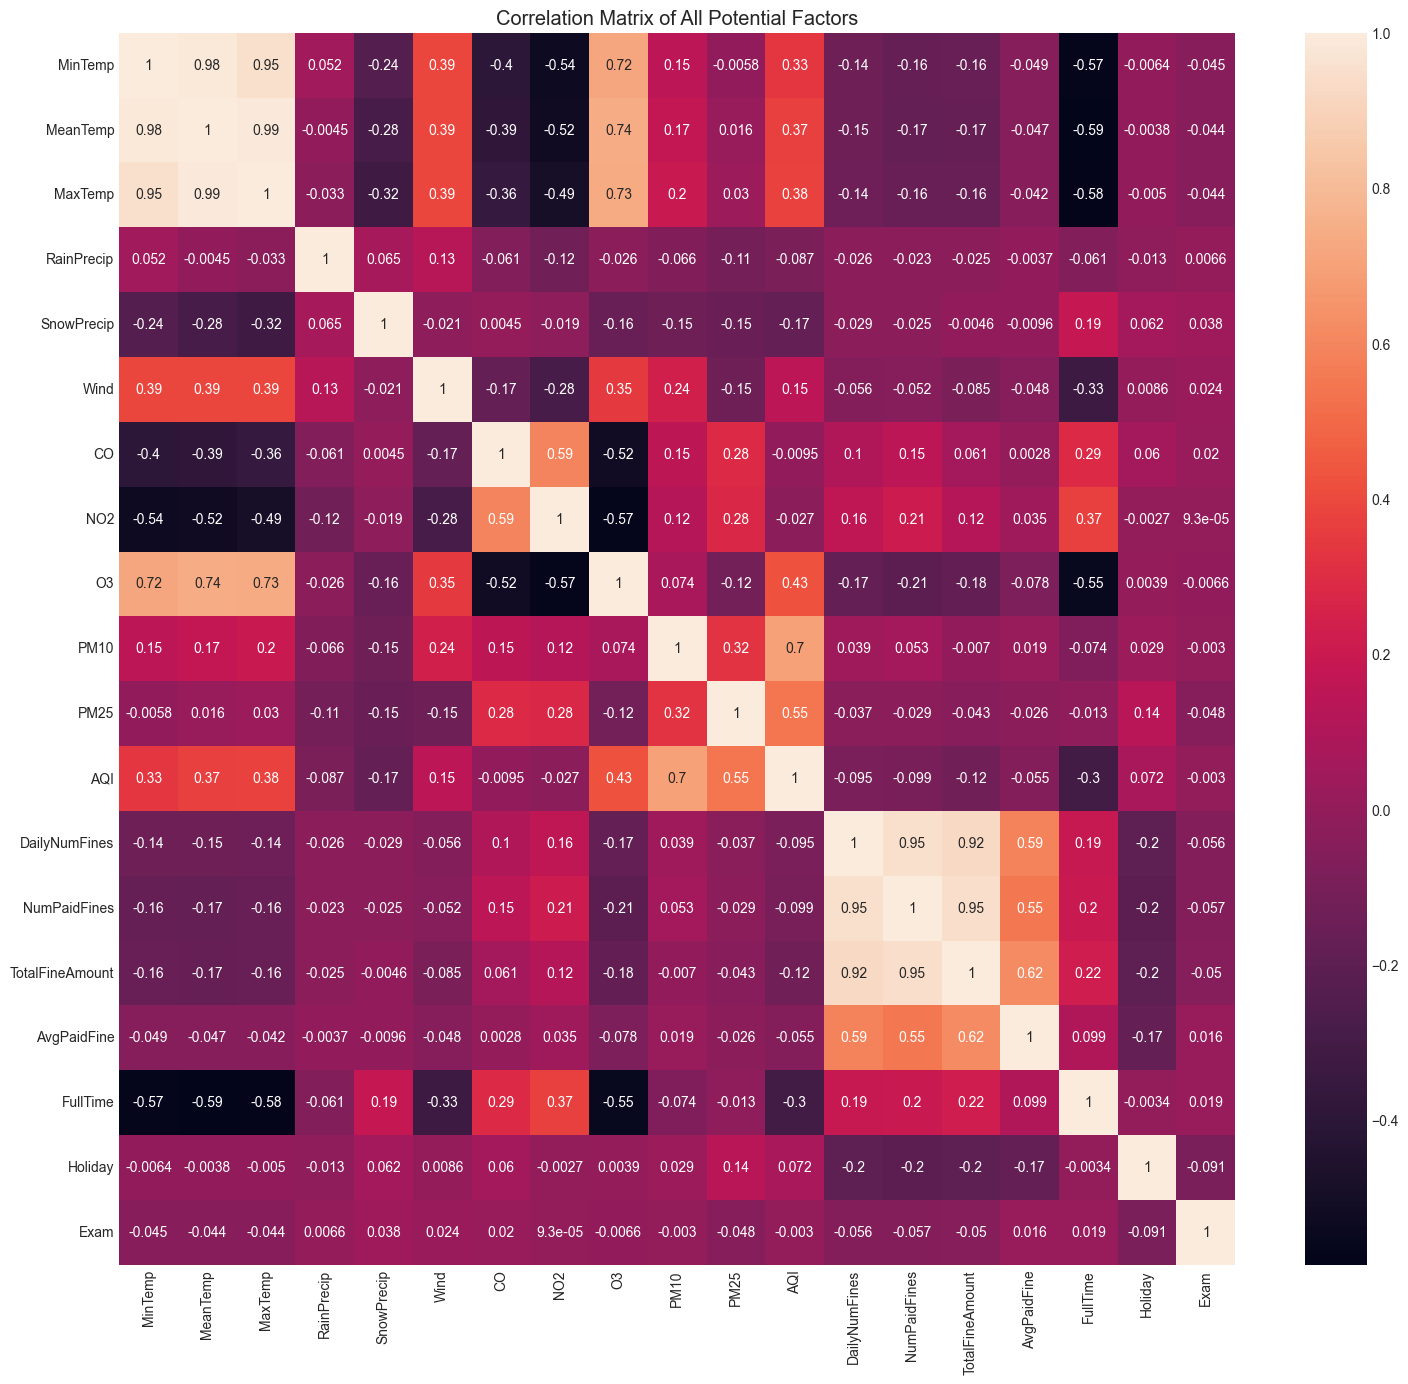

In [690]:
plt.figure(figsize=(18, 16))

sns.heatmap(Provo[["MinTemp", "MeanTemp", "MaxTemp", "RainPrecip", "SnowPrecip", "Wind",
                "CO", "NO2", "O3", "PM10", "PM25", "AQI",
                "DailyNumFines", "NumPaidFines", "TotalFineAmount", "AvgPaidFine",
                 "FullTime", "Holiday", "Exam"]].corr(), annot=True)

plt.title("Correlation Matrix of All Potential Factors")

plt.show()

In [691]:
Provo.to_csv("Provo.csv", index=False)

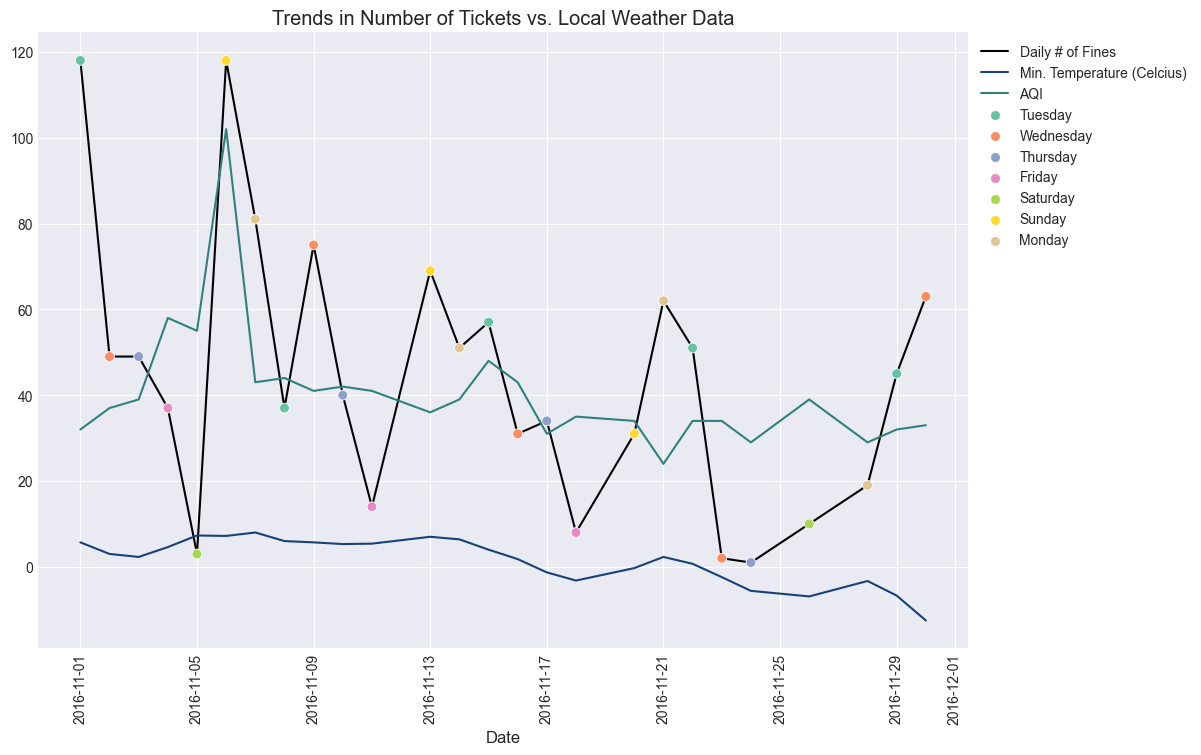

In [768]:
c = Provo.sample(n=1)
group = Provo[(Provo["Month"] == c["Month"].values[0]) & (Provo["Year"] == c["Year"].values[0])]

sns.set_palette(palette='gist_earth')

plt.figure(figsize=(12, 8))

plt.plot(group["DATE"], group["DailyNumFines"], color="black", label="Daily # of Fines")
plt.plot(group["DATE"], group["MinTemp"], label="Min. Temperature (Celcius)")
plt.plot(group["DATE"], group["AQI"], label="AQI")

sns.set_palette(palette='Set2')
sns.scatterplot(x="DATE", y="DailyNumFines", hue="Day", data=group, s=50, zorder=5)
# sns.scatterplot(x="IssuedDate", y="MinTemp", hue="Day", data=group, s=50, zorder=5, legend=False)
# sns.scatterplot(x="IssuedDate", y="AQI", hue="Day", data=group, s=50, zorder=5, legend=False)

plt.ylabel("")
plt.xlabel("Date")
plt.title("Trends in Number of Tickets vs. Local Weather Data")

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.xticks(rotation=90)

plt.show()

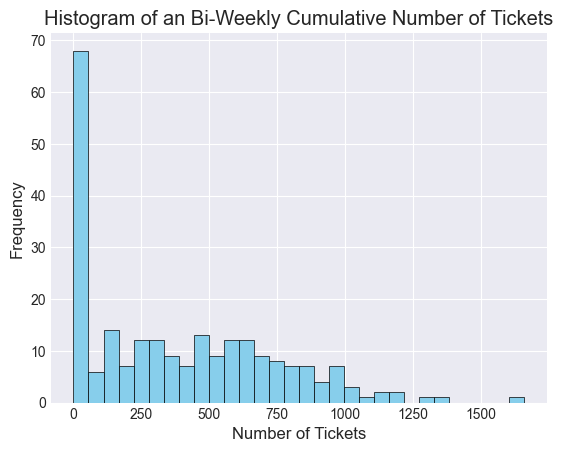

In [729]:
Provo["DayNum"] = Provo["DATE"].dt.day

bi_weekly_tickets = []
monthly_tickets = []
total = 0
monthly_total = 0
month = ""
for i, row in Provo.iterrows():
    if row["Day"] == "Saturday" and i % 2 == 0:
        bi_weekly_tickets.append(total)
        total = 0
    if row["Month"] != month:
        monthly_tickets.append(total)
        monthly_total = 0
        month = row["Month"]
    total += row["DailyNumFines"]
    monthly_total += row["DailyNumFines"]
    
plt.hist(bi_weekly_tickets, bins=30, color='skyblue', edgecolor='black')

plt.xlabel('Number of Tickets')
plt.ylabel('Frequency')
plt.title('Histogram of an Bi-Weekly Cumulative Number of Tickets')

plt.show()

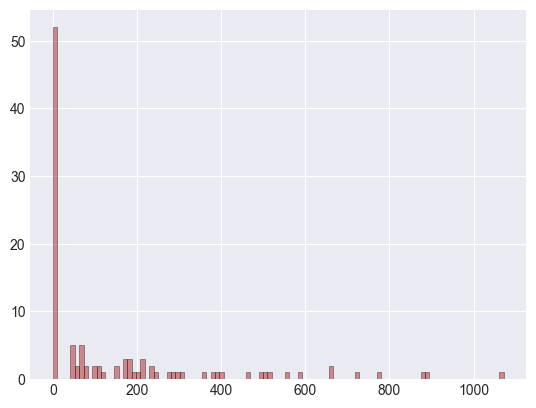

108

In [732]:
plt.hist(monthly_tickets, bins=12*9-5, color='firebrick', edgecolor='black', alpha=0.5)

plt.show()

len(monthly_tickets)

In [734]:
Provo

DATE  Month        Day  NA_Correction  MaxTemp  MinTemp  MeanTemp  \
0    2014-01-06      1     Monday          False     -3.3    -17.6     -10.5   
1    2014-01-07      1    Tuesday          False      1.1    -11.6      -4.7   
2    2014-01-08      1  Wednesday          False      0.9     -2.6      -0.5   
3    2014-01-09      1   Thursday          False      0.1    -10.3      -4.4   
4    2014-01-10      1     Friday          False      3.1     -4.1      -0.5   
...         ...    ...        ...            ...      ...      ...       ...   
3277 2022-12-27     12    Tuesday          False      7.2      3.4       4.9   
3278 2022-12-28     12  Wednesday          False      4.6     -4.0       0.6   
3279 2022-12-29     12   Thursday          False      1.5     -5.9      -2.5   
3280 2022-12-30     12     Friday          False      3.0     -3.7       0.6   
3281 2022-12-31     12   Saturday           True      5.8      2.9       3.9   

      RainPrecip  SnowPrecip  Wind   CO   NO2       O3  PM10  PM25 CO_LEVEL  \
0            0.0        0.00   6.8  1.8  47.0  0.02200  47.0  13.7     Good   
1            0.0        0.21   5.9  1.9  47.0  0.00700  66.0  21.0     Good   
2            0.0        2.66   7.9  0.8  48.0  0.00300  53.0  33.9     Good   
3            0.0        3.92   8.9  0.7  42.0  0.02100  46.0  18.0     Good   
4            0.0        0.91   7.0  1.0  46.0  0.02100  38.0   7.9     Good   
...          ...         ...   ...  ...   ...      ...   ...   ...      ...   
3277         6.6        4.27  13.2  0.6  29.8  0.03300   3.0   2.1     Good   
3278         0.0        3.50   9.3  0.3  26.1  0.02900   3.0   1.1     Good   
3279         0.0        0.49   5.8  0.3  26.9  0.03200   6.0   1.9     Good   
3280         0.0        7.56   6.1  0.4  14.2  0.03800   2.0   1.3     Good   
3281        10.0       10.99   5.9  0.4  17.0  0.02458   3.0   2.1     Good   

     NO2_LEVEL O3_LEVEL PM10_LEVEL PM25_LEVEL  AQI AQI_LEVEL    Year  \
0         Good     Good       Good   Moderate   54  Moderate  2014.0   
1         Good     Good   Moderate   Moderate   70  Moderate  2014.0   
2         Good     Good       Good   Moderate   97  Moderate  2014.0   
3         Good     Good       Good   Moderate   63  Moderate  2014.0   
4         Good     Good       Good       Good   43      Good  2014.0   
...        ...      ...        ...        ...  ...       ...     ...   
3277      Good     Good       Good       Good   31      Good     0.0   
3278      Good     Good       Good       Good   27      Good  2022.0   
3279      Good     Good       Good       Good   30      Good  2022.0   
3280      Good     Good       Good       Good   35      Good     0.0   
3281      Good     Good       Good       Good   22      Good     0.0   

      DailyNumFines  NumPaidFines  TotalFineAmount  AvgPaidFine  Fri  Mon  \
0              23.0          17.0            386.0    22.705882    0    1   
1              52.0          46.0           1238.0    26.913043    0    0   
2              13.0           8.0            216.0    27.000000    0    0   
3               3.0           3.0            350.0   116.666667    0    0   
4              16.0          11.0            221.0    20.090909    1    0   
...             ...           ...              ...          ...  ...  ...   
3277            0.0           0.0              0.0     0.000000    0    0   
3278            1.0           1.0             35.0    35.000000    0    0   
3279           10.0           7.0            220.0    31.428571    0    0   
3280            0.0           0.0              0.0     0.000000    1    0   
3281            0.0           0.0              0.0     0.000000    0    0   

      Sat  Sun  Thurs  Tues  Wed    Term  Enrollment  FullTime  Holiday  Exam  \
0       0    0      0     0    0  Winter       29642     25191        0     0   
1       0    0      0     1    0  Winter       29642     25191        0     0   
2       0    0      0     0    1  Winter       29642     25191      

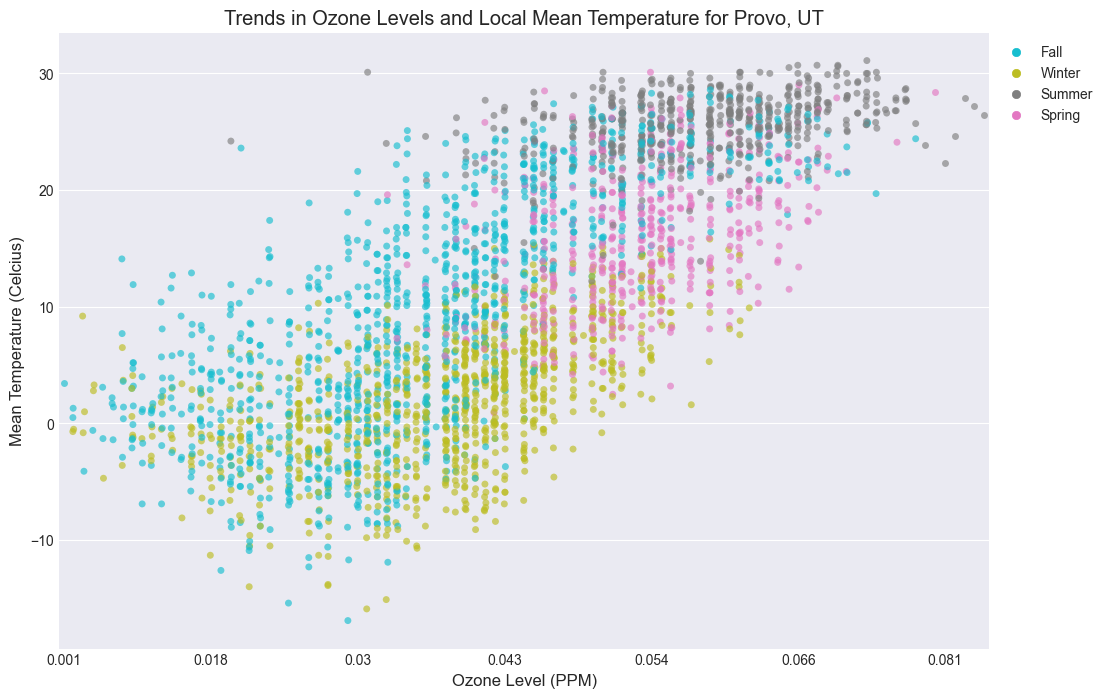

In [764]:
plt.figure(figsize=(12, 8))

sns.set_palette(palette=sns.color_palette('tab10')[::-1])

scatter = sns.stripplot(x="O3", y="MeanTemp", data=Provo, hue="Term", jitter=True, alpha=0.65)

plt.ylabel("Mean Temperature (Celcius)")
plt.xlabel("Ozone Level (PPM)")
plt.title("Trends in Ozone Levels and Local Mean Temperature for Provo, UT")

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

scatter.set_xticks(scatter.get_xticks()[::15])

plt.show()

In [3]:
Provo = pd.read_csv("Provo.csv")
Provo

DATE  Month        Day  NA_Correction  MaxTemp  MinTemp  MeanTemp  \
0     2014-01-06      1     Monday          False     -3.3    -17.6     -10.5   
1     2014-01-07      1    Tuesday          False      1.1    -11.6      -4.7   
2     2014-01-08      1  Wednesday          False      0.9     -2.6      -0.5   
3     2014-01-09      1   Thursday          False      0.1    -10.3      -4.4   
4     2014-01-10      1     Friday          False      3.1     -4.1      -0.5   
...          ...    ...        ...            ...      ...      ...       ...   
3277  2022-12-27     12    Tuesday          False      7.2      3.4       4.9   
3278  2022-12-28     12  Wednesday          False      4.6     -4.0       0.6   
3279  2022-12-29     12   Thursday          False      1.5     -5.9      -2.5   
3280  2022-12-30     12     Friday          False      3.0     -3.7       0.6   
3281  2022-12-31     12   Saturday           True      5.8      2.9       3.9   

      RainPrecip  SnowPrecip  Wind   CO   NO2       O3  PM10  PM25 CO_LEVEL  \
0            0.0        0.00   6.8  1.8  47.0  0.02200  47.0  13.7     Good   
1            0.0        0.21   5.9  1.9  47.0  0.00700  66.0  21.0     Good   
2            0.0        2.66   7.9  0.8  48.0  0.00300  53.0  33.9     Good   
3            0.0        3.92   8.9  0.7  42.0  0.02100  46.0  18.0     Good   
4            0.0        0.91   7.0  1.0  46.0  0.02100  38.0   7.9     Good   
...          ...         ...   ...  ...   ...      ...   ...   ...      ...   
3277         6.6        4.27  13.2  0.6  29.8  0.03300   3.0   2.1     Good   
3278         0.0        3.50   9.3  0.3  26.1  0.02900   3.0   1.1     Good   
3279         0.0        0.49   5.8  0.3  26.9  0.03200   6.0   1.9     Good   
3280         0.0        7.56   6.1  0.4  14.2  0.03800   2.0   1.3     Good   
3281        10.0       10.99   5.9  0.4  17.0  0.02458   3.0   2.1     Good   

     NO2_LEVEL O3_LEVEL PM10_LEVEL PM25_LEVEL  AQI AQI_LEVEL    Year  \
0         Good     Good       Good   Moderate   54  Moderate  2014.0   
1         Good     Good   Moderate   Moderate   70  Moderate  2014.0   
2         Good     Good       Good   Moderate   97  Moderate  2014.0   
3         Good     Good       Good   Moderate   63  Moderate  2014.0   
4         Good     Good       Good       Good   43      Good  2014.0   
...        ...      ...        ...        ...  ...       ...     ...   
3277      Good     Good       Good       Good   31      Good     0.0   
3278      Good     Good       Good       Good   27      Good  2022.0   
3279      Good     Good       Good       Good   30      Good  2022.0   
3280      Good     Good       Good       Good   35      Good     0.0   
3281      Good     Good       Good       Good   22      Good     0.0   

      DailyNumFines  NumPaidFines  TotalFineAmount  AvgPaidFine  Fri  Mon  \
0              23.0          17.0            386.0    22.705882    0    1   
1              52.0          46.0           1238.0    26.913043    0    0   
2              13.0           8.0            216.0    27.000000    0    0   
3               3.0           3.0            350.0   116.666667    0    0   
4              16.0          11.0            221.0    20.090909    1    0   
...             ...           ...              ...          ...  ...  ...   
3277            0.0           0.0              0.0     0.000000    0    0   
3278            1.0           1.0             35.0    35.000000    0    0   
3279           10.0           7.0            220.0    31.428571    0    0   
3280            0.0           0.0              0.0     0.000000    1    0   
3281            0.0           0.0              0.0     0.000000    0    0   

      Sat  Sun  Thurs  Tues  Wed    Term  Enrollment  FullTime  Holiday  Exam  
0       0    0      0     0    0  Winter       29642     25191        0     0  
1       0    0      0     1    0  Winter       29642     25191        0     0  
2       0    0      0     0    1  Winter       29642     251

In [25]:
lags = 1

Provo_timeseries = Provo.iloc[lags:].copy()

lag_vars = ["DailyNumFines"]
for lag in range(1, lags+1):
    for var in lag_vars:
        Provo_timeseries[var+"Lag"+"_"+str(lag)] = Provo.iloc[(lag-1):(Provo.shape[0]-(lags-lag))][var]

In [26]:
Provo_timeseries[["DailyNumFines", "DailyNumFinesLag_1"]]

DailyNumFines  DailyNumFinesLag_1
1              52.0                52.0
2              13.0                13.0
3               3.0                 3.0
4              16.0                16.0
5               2.0                 2.0
...             ...                 ...
3277            0.0                 0.0
3278            1.0                 1.0
3279           10.0                10.0
3280            0.0                 0.0
3281            0.0                 0.0

[3281 rows x 2 columns]

In [11]:
Provo.iloc[7:]

DATE  Month        Day  NA_Correction  MaxTemp  MinTemp  MeanTemp  \
7     2014-01-13      1     Monday          False      2.7     -3.0      -1.1   
8     2014-01-14      1    Tuesday          False      2.9     -6.3      -2.2   
9     2014-01-15      1  Wednesday          False      2.5     -9.1      -3.6   
10    2014-01-16      1   Thursday          False      2.8     -9.7      -3.6   
11    2014-01-17      1     Friday          False      3.3    -10.1      -3.3   
...          ...    ...        ...            ...      ...      ...       ...   
3277  2022-12-27     12    Tuesday          False      7.2      3.4       4.9   
3278  2022-12-28     12  Wednesday          False      4.6     -4.0       0.6   
3279  2022-12-29     12   Thursday          False      1.5     -5.9      -2.5   
3280  2022-12-30     12     Friday          False      3.0     -3.7       0.6   
3281  2022-12-31     12   Saturday           True      5.8      2.9       3.9   

      RainPrecip  SnowPrecip  Wind   CO   NO2       O3  PM10  PM25 CO_LEVEL  \
7            0.0        0.42   8.3  0.5  49.0  0.02500  41.0   5.4     Good   
8            0.0        0.00   7.0  1.2  46.0  0.02400  62.0  13.2     Good   
9            0.0        0.00   6.6  1.0  54.0  0.02000  75.0  17.7     Good   
10           0.0        0.00   5.4  1.0  48.0  0.01800  62.0  20.5     Good   
11           0.0        0.00   5.2  0.9  58.0  0.01600  66.0  24.3     Good   
...          ...         ...   ...  ...   ...      ...   ...   ...      ...   
3277         6.6        4.27  13.2  0.6  29.8  0.03300   3.0   2.1     Good   
3278         0.0        3.50   9.3  0.3  26.1  0.02900   3.0   1.1     Good   
3279         0.0        0.49   5.8  0.3  26.9  0.03200   6.0   1.9     Good   
3280         0.0        7.56   6.1  0.4  14.2  0.03800   2.0   1.3     Good   
3281        10.0       10.99   5.9  0.4  17.0  0.02458   3.0   2.1     Good   

     NO2_LEVEL O3_LEVEL PM10_LEVEL PM25_LEVEL  AQI AQI_LEVEL    Year  \
7         Good     Good       Good       Good   46      Good  2014.0   
8         Good     Good   Moderate   Moderate   54  Moderate  2014.0   
9     Moderate     Good   Moderate   Moderate   63  Moderate  2014.0   
10        Good     Good   Moderate   Moderate   69  Moderate  2014.0   
11    Moderate     Good   Moderate   Moderate   77  Moderate  2014.0   
...        ...      ...        ...        ...  ...       ...     ...   
3277      Good     Good       Good       Good   31      Good     0.0   
3278      Good     Good       Good       Good   27      Good  2022.0   
3279      Good     Good       Good       Good   30      Good  2022.0   
3280      Good     Good       Good       Good   35      Good     0.0   
3281      Good     Good       Good       Good   22      Good     0.0   

      DailyNumFines  NumPaidFines  TotalFineAmount  AvgPaidFine  Fri  Mon  \
7              49.0          38.0            826.0    21.736842    0    1   
8              35.0          31.0            580.0    18.709677    0    0   
9              53.0          42.0            837.0    19.928571    0    0   
10             30.0          22.0            465.0    21.136364    0    0   
11             67.0          44.0           1007.0    22.886364    1    0   
...             ...           ...              ...          ...  ...  ...   
3277            0.0           0.0              0.0     0.000000    0    0   
3278            1.0           1.0             35.0    35.000000    0    0   
3279           10.0           7.0            220.0    31.428571    0    0   
3280            0.0           0.0              0.0     0.000000    1    0   
3281            0.0           0.0              0.0     0.000000    0    0   

      Sat  Sun  Thurs  Tues  Wed    Term  Enrollment  FullTime  Holiday  Exam  
7       0    0      0     0    0  Winter       29642     25191        0     0  
8       0    0      0     1    0  Winter       29642     25191        0     0  
9       0    0      0     0    1  Winter       29642     251